# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

##  Описание проекта и исходные данные
**Цель :  на основе предоставленных данных провести исследовательский анализ данных и получить ответы на перечень поставленных задач:**

*1. Изучить следующие параметры объектов:*
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом ```markdown```.

*2. Изучите, как быстро продавались квартиры (столбец ```days_exposition```)*. Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
- Какие факторы больше всего влияют на общую (полную) стоимость объекта?

*3. Изучите, зависит ли цена от:*
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

*4. Постройте графики, которые покажут зависимость цены от указанных выше параметров.*
Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

*5. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце ```locality_name```*.

*6. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца ```locality_name``` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.*

*7. На основе полученных данных сделать основной вывод проведенного исследования*

## Описание данных

 - ```airports_nearest``` — расстояние до ближайшего аэропорта в метрах (м)
 - ```balcony```— число балконов
 - ```ceiling_height``` — высота потолков (м)
 - ```cityCenters_nearest``` — расстояние до центра города (м)
 - ```days_exposition``` — сколько дней было размещено объявление (от публикации до снятия)
 - ```first_day_exposition``` — дата публикации
 - ```floor``` — этаж
 - ```floors_total``` — всего этажей в доме
 - ```is_apartment``` — апартаменты (булев тип)
 - ```kitchen_area``` — площадь кухни в квадратных метрах (м²)
 - ```last_price``` — цена на момент снятия с публикации
 - ```living_area``` — жилая площадь в квадратных метрах (м²)
 - ```locality_name``` — название населённого пункта
 - ```open_plan``` — свободная планировка (булев тип)
 - ```parks_around``` — число парков в радиусе 3 км
 - ```parks_neares``` — расстояние до ближайшего парка (м)
 - ```ponds_around3000``` — число водоёмов в радиусе 3 км
 - ```ponds_nearest``` — расстояние до ближайшего водоёма (м)
 - ```rooms``` — число комнат
 - ```studio``` — квартира-студия (булев тип)
 - ```total_area``` — общая площадь квартиры в квадратных метрах (м²)
 - ```total_images``` — число фотографий квартиры в объявлении

In [ ]:
!pip install jupyter-black

In [2]:
# помощник писать код красиво
import jupyter_black

jupyter_black.load()

# необходимые библиотеки
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from numpy.typing import NDArray

from matplotlib.colors import (
    LinearSegmentedColormap,
)  # поможет расскарсить датафрейм

warnings.filterwarnings("ignore")  # бережем глаза от ненужных предупреждений
try:
    data = pd.read_csv("datasets/real_estate_data.csv", sep="\t")
except:
    data = pd.read_csv(
        "https://code.s3.yandex.net/datasets/real_estate_data.csv", sep="\t"
    )

display(data.head(6))
data.info()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   
5            10   2890000.0        30.4  2018-09-10T00:00:00      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   
5             NaN          12.0         14.4      5          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0          25.0      NaN            Санкт-Петербург           18863.0   
1          11.0      2.0             посёлок Шушары           12817.0   
2           8.3      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4          41.0      NaN            Санкт-Петербург           31856.0   
5           9.1      NaN  городской посёлок Янино-1               NaN   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  

[6 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

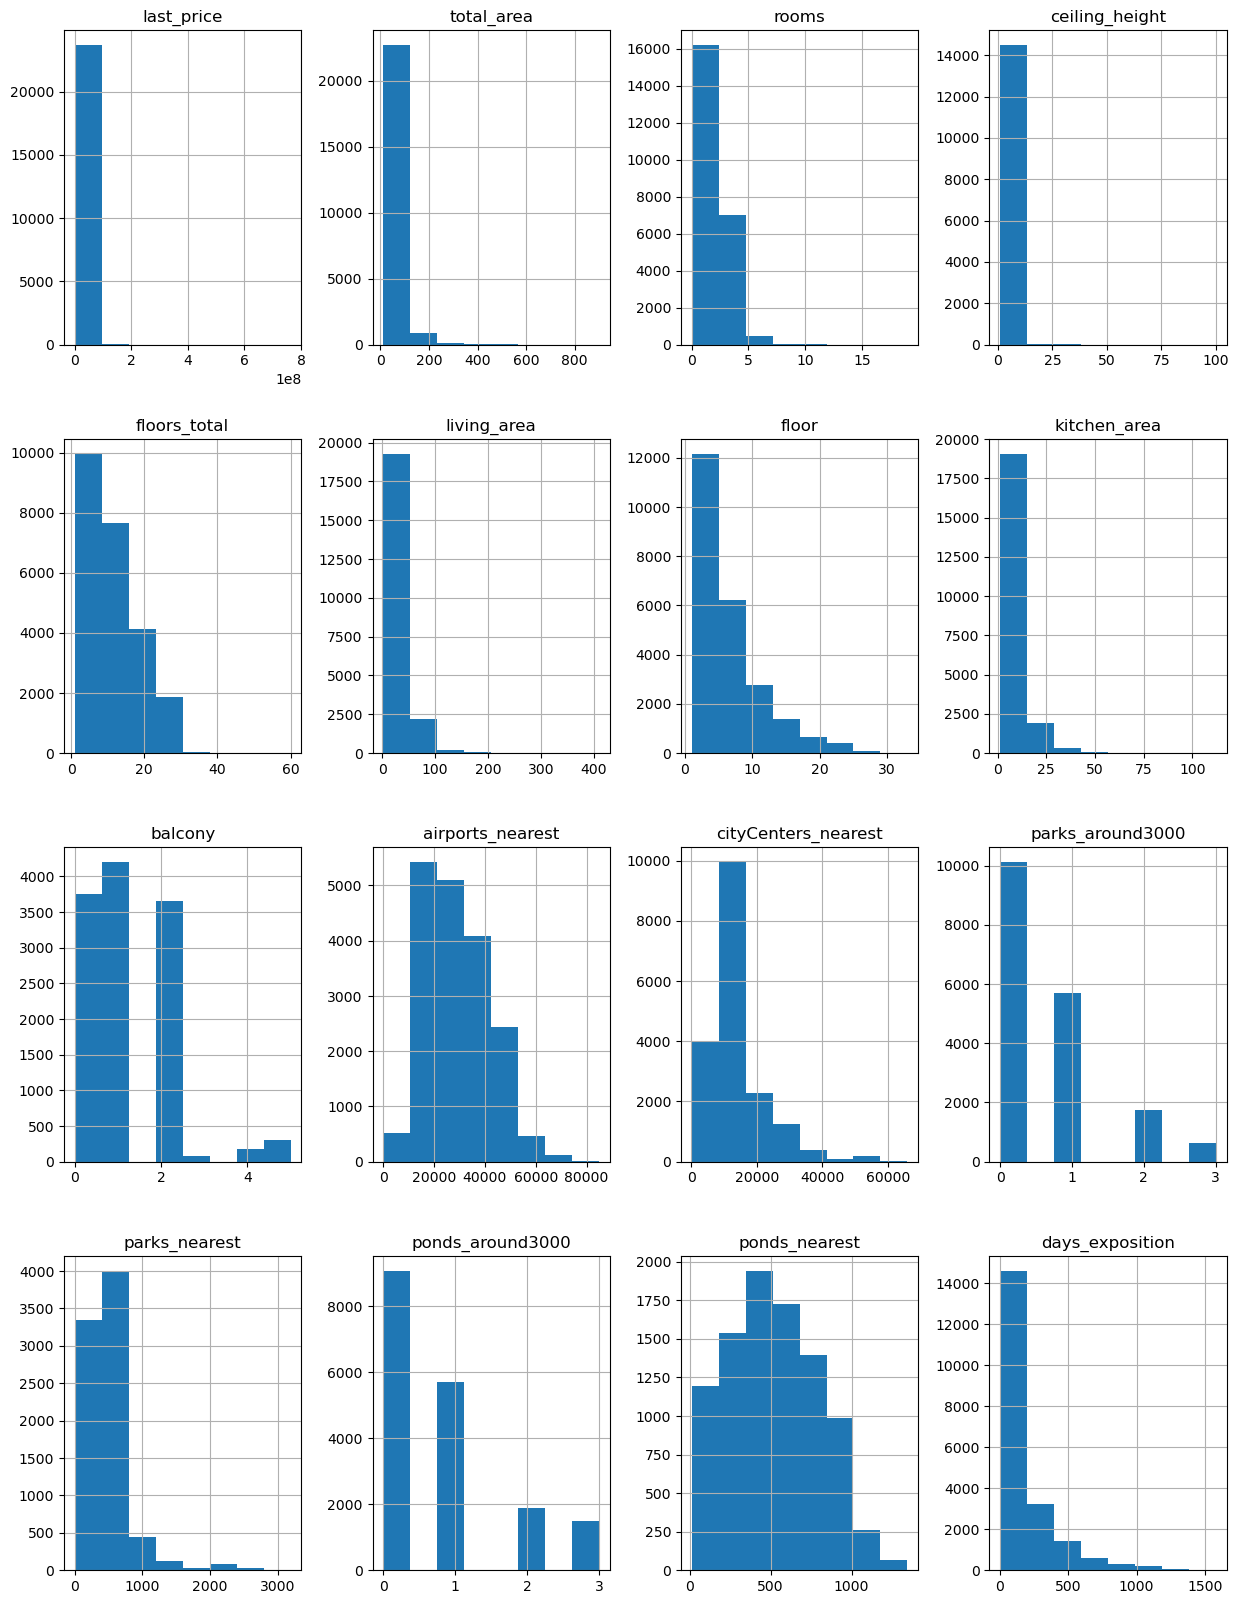

In [3]:
# обработаем копию датасета чтобы работать с ней, а не с оригинальной таблицей
df = data.copy()
# удалим явные дубликаты  строк
df = df.drop_duplicates()
# выведем только столбцы с числовыми значениями для построения гистограммы
df_selected = df.iloc[:, [1, 2, 4, 5, 6, 7, 8, 12, 13, 15, 16, 17, 18, 19, 20, 21]]
df_selected.hist(bins=8, figsize=(15, 20))
plt.show()

In [4]:
# привычный формат отображения чисел
pd.options.display.float_format = "{:,.2f}".format
df.describe()

total_images     last_price  total_area     rooms  ceiling_height  \
count     23,699.00      23,699.00   23,699.00 23,699.00       14,504.00   
mean           9.86   6,541,548.77       60.35      2.07            2.77   
std            5.68  10,887,013.27       35.65      1.08            1.26   
min            0.00      12,190.00       12.00      0.00            1.00   
25%            6.00   3,400,000.00       40.00      1.00            2.52   
50%            9.00   4,650,000.00       52.00      2.00            2.65   
75%           14.00   6,800,000.00       69.90      3.00            2.80   
max           50.00 763,000,000.00      900.00     19.00          100.00   

       floors_total  living_area     floor  kitchen_area   balcony  \
count     23,613.00    21,796.00 23,699.00     21,421.00 12,180.00   
mean          10.67        34.46      5.89         10.57      1.15   
std            6.60        22.03      4.89          5.91      1.07   
min            1.00         2.00      1.00          1.30      0.00   
25%            5.00        18.60      2.00          7.00      0.00   
50%            9.00        30.00      4.00          9.10      1.00   
75%           16.00        42.30      8.00         12.00      2.00   
max           60.00       409.70     33.00        112.00      5.00   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count         18,157.00            18,180.00         18,181.00       8,079.00   
mean          28,793.67            14,191.28              0.61         490.80   
std           12,630.88             8,608.39              0.80         342.32   
min                0.00               181.00              0.00           1.00   
25%           18,585.00             9,238.00              0.00         288.00   
50%           26,726.00            13,098.50              0.00         455.00   
75%           37,273.00            16,293.00              1.00         612.00   
max           84,869.00            65,968.00              3.00       3,190.00   

       ponds_around3000  ponds_nearest  days_exposition  
count         18,181.00       9,110.00        20,518.00  
mean               0.77         517.98           180.89  
std                0.94         277.72           219.73  
min                0.00          13.00             1.00  
25%                0.00         294.00            45.00  
50%                1.00         502.00            95.00  
75%                1.00         729.00           232.00  
max                3.00       1,344.00         1,580.00

**Вывод:** Изучив первоначальные данные делаем вывод что среди 23 699 записей о продаже есть столбцы с с разным количеством пропусков в данных. Из первоначальных графиков и описания данных можно увидеть выбросы в некоторых столбцах, например ```ceiling_height```и  ```kitchen_area```   и некорректный тип данных, например ```first_day_exposition```. Данным требуется систематизированная предобработка

### Предобработка данных

#### Первичная обработка значений в столбцах
Cначала выполним первичную обработку данных, попутно анализируя пропуски в каждом из столбцов. На основании предобработки мы изучим пропуски, сделаем предположения об их характере, изучим типы данных в столбце, и получим представление о дальнейшей обработке данных, чтобы привести данные к пригодному для анализа и проверки гипотез виду.

Анализ выполним с помощью вспомогательной функции, которая создает в тетради ячейки с описанием столбца

In [5]:
"""
Функция внутри которой создаются ячейки в среде тетради и заполняются согласно функции generate_column_preprocess_description
            """


def create_cell(shell, text):
    payload = dict(
        source="set_next_input",
        text=text,
        replace=False,
    )
    shell.payload_manager.write_payload(payload, single=False)


# для каждого столбца создает набор ячеек в которых будем делать предобработку
def generate_column_preprocess_description(df):
    shell = get_ipython()
    for i, column in reversed(list(enumerate(df.columns))):
        create_cell(
            shell,
            dedent(
                """
            * Изменение
            """
            ),
        )
        create_cell(
            shell,
            dedent(
                """
            * Вывод
            \t- Обнаруженные аномалии: ...
            \t- Причины, по которым они могли возникнуть: ...
            \t- Как исправлять: ...
            \t- Финальный тип и почему: ...
            """
            ),
        )
        create_cell(
            shell,
            dedent(
                f"""
            investigate_column(df["{column}"]) 
            """
            ),
        )
        create_cell(
            shell,
            dedent(
                """
            * Изучим значения
            """
            ),
        )
        create_cell(
            shell,
            dedent(
                f"""
            #### {i+1}. Обработка "{column}"
            """
            ),
        )

In [6]:
"""
функция принимает значение столбца df и выводит его описание для анализа, считает пропуски, уникальные значения ,
тип данных и строит диаграмму размаха для числовых типов данных
"""


def investigate_column(column):
    print("Кол-во Null и Na значений:", column.isna().sum())
    print("Кол-во уникальных значений:", column.nunique())
    print("Data type:", column.dtype)

    # Описание статистики
    print(column.describe())

    # Частота уникальных значений
    print("Частота уникальных значений столбца:\n", column.value_counts())

    # Минимальное и максимальное значение (для числовых данных)
    if pd.api.types.is_numeric_dtype(column) and not pd.api.types.is_bool_dtype(column):
        print("Minimum :", column.min())
        print("Maximum :", column.max())
        print("Quantiles:\n", column.quantile([0.25, 0.5, 0.75]))

        # Построение boxplot
        plt.figure(figsize=(10, 6))
        plt.boxplot(
            column.dropna(), vert=False
        )  # Удаляем NaN для отображения и разворачиваем график
        plt.title(f"Диаграмма размаха для столбца")
        plt.xlabel("Значения")
        plt.show()
    else:
        pass

In [7]:
# вызовем функцию 1 раз чтобы создать ячейки markdown для столбцов
# generate_column_preprocess_description(df)

####  Обработка "total_images"


* Изучим значения


Кол-во Null и Na значений: 0
Кол-во уникальных значений: 38
Data type: int64
count   23,699.00
mean         9.86
std          5.68
min          0.00
25%          6.00
50%          9.00
75%         14.00
max         50.00
Name: total_images, dtype: float64
Частота уникальных значений столбца:
 total_images
10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: count, dtype: int64
Minimum : 0
Maximum : 50
Quantiles:
 0.25    6.00
0.50    9.00
0.75   14.00
Name: total_images, dtype: float64


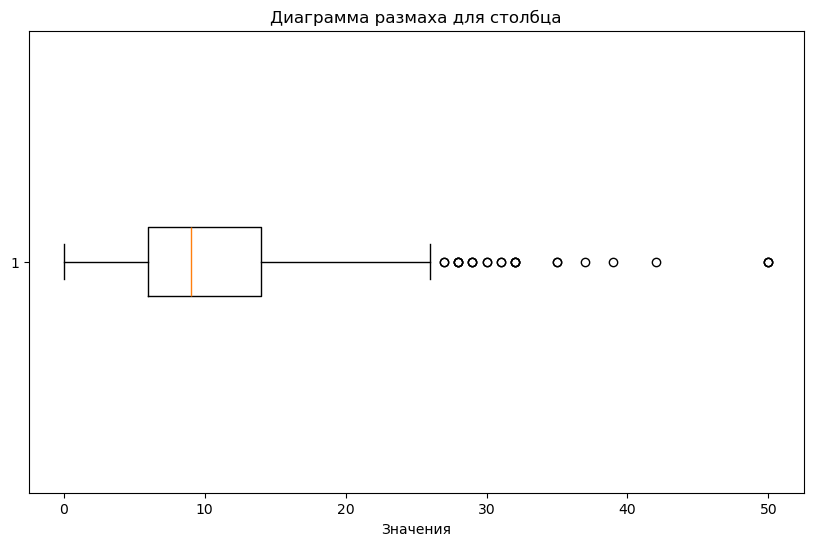

In [8]:
investigate_column(df["total_images"])


* Вывод
	- Обнаруженные аномалии: не обнаружено аномалий для исследования
	- Причины, по которым они могли возникнуть: 
	- Как исправлять: скорее всего данные столбца не будут использованы, исправление не требуется
	- Финальный тип и почему: оставим тип без изменений


#### Обработка "last_price"


* Изучим значения


Кол-во Null и Na значений: 0
Кол-во уникальных значений: 2978
Data type: float64
count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64
Частота уникальных значений столбца:
 last_price
4,500,000.00     342
3,500,000.00     291
4,300,000.00     260
4,000,000.00     260
4,200,000.00     259
                ... 
12,890,000.00      1
29,375,000.00      1
7,545,600.00       1
5,205,000.00       1
11,475,000.00      1
Name: count, Length: 2978, dtype: int64
Minimum : 12190.0
Maximum : 763000000.0
Quantiles:
 0.25   3,400,000.00
0.50   4,650,000.00
0.75   6,800,000.00
Name: last_price, dtype: float64


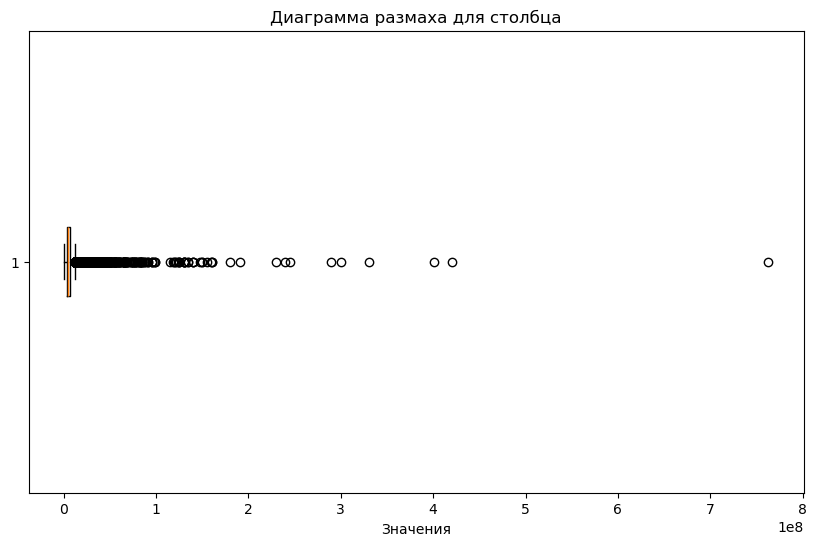

In [9]:
investigate_column(df["last_price"])


* Вывод
	- Обнаруженные аномалии: есть выбросы в виде *min* и *max* значений. Большая стоимость может быть обусловлена объявлением о продаже элитного жилья с большой площадью, низкая стоимость - скорее всего ошибочные данные или комната / доля в квартире
	- Причины, по которым они могли возникнуть: одной из причин может быть ошибка при вводе данных. Но данные могут быть и корректны, бываютэкстремально дорогие и реже дешевые объекты недвижимости
	- Как исправлять: построим гистрограммы для разных диапазонов цен. Изучим распределение и сделаем вывод, какой диапазон цен подойдет для релевантного исследования
    - Финальный тип и почему: приведем к целочисленному  ```int```.


Количество публикаций с объектом дороже 50млн: 131


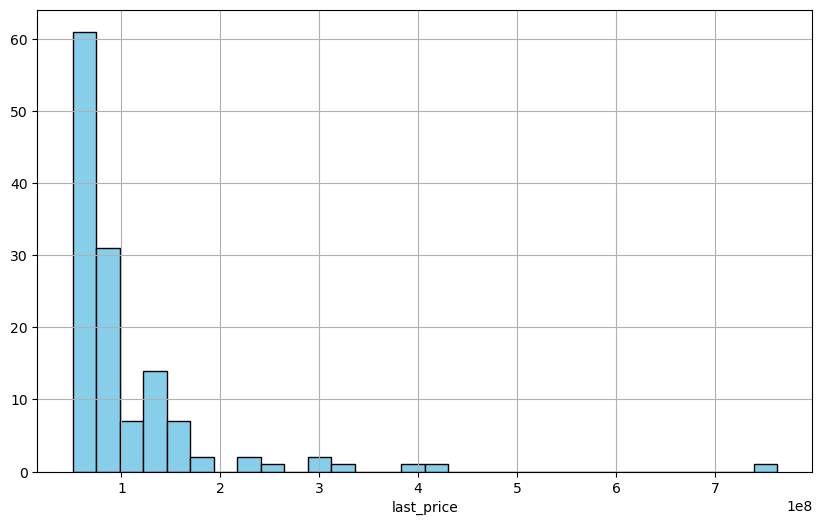

In [10]:
df[df["last_price"] > 50000000]["last_price"].hist(
    bins=30, figsize=(10, 6), color="skyblue", edgecolor="black"
)
print(
    "Количество публикаций с объектом дороже 50млн:",
    len(df[df["last_price"] > 50000000]),
)
plt.xlabel("last_price")
plt.show()

In [11]:
# улучшение качества изображений  на графиках
%config InlineBackend.figure_format = 'retina'

Количество публикаций с объектом дешевле 800000: 115


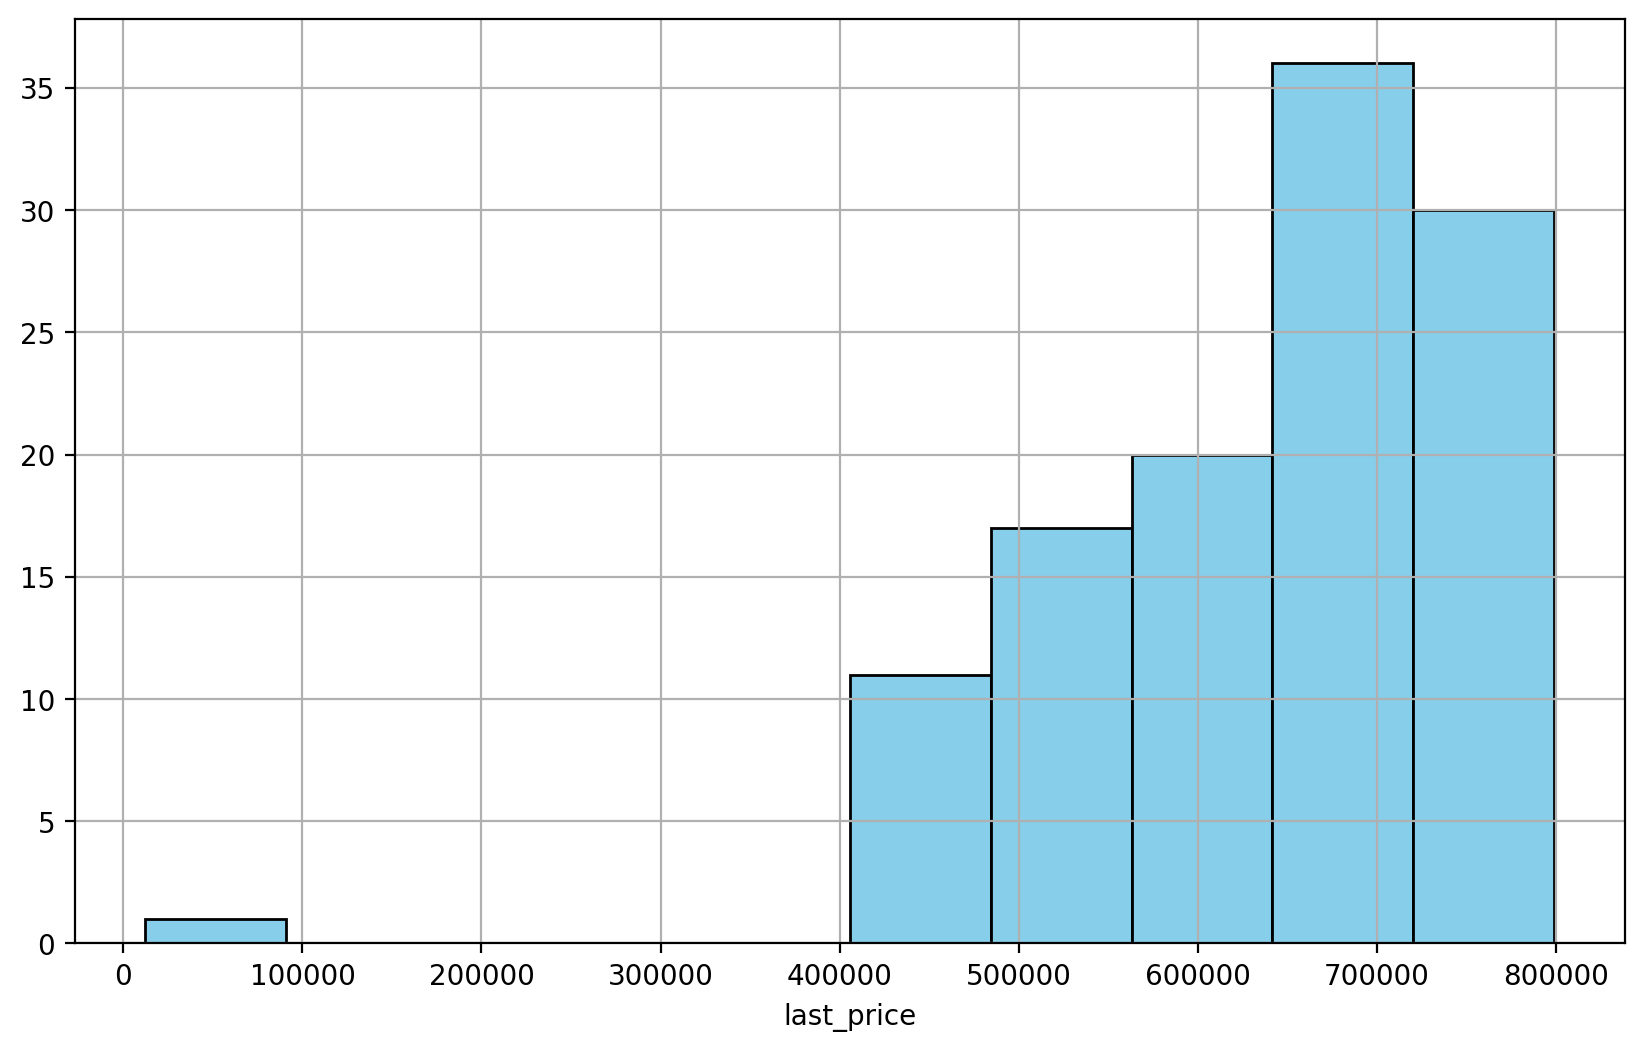

In [12]:
df[df["last_price"] < 800000]["last_price"].hist(
    bins=10, figsize=(10, 6), color="skyblue", edgecolor="black"
)
print(
    "Количество публикаций с объектом дешевле 800000:",
    len(df[df["last_price"] < 800000]),
)
plt.xlabel("last_price")
plt.show()

* Изменение
Исходя из гистограмм и диаграммы размаха принял решение оставить в таблице данные о продаже объектов с ценой выше *800000* и ниже *50000000*. Количество публикаций не попадающих в этот диапазон составляет в сумме 1% от всей таблицы,  исключение этих данных не окажет влияния на ислледование, но экстремальные значения в этих строках ухудшат исследование основной выборки если их оставить.

In [13]:
df = df[(df["last_price"] > 800000) & (df["last_price"] < 50000000)]
df["last_price"] = df["last_price"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23437 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23437 non-null  int64  
 1   last_price            23437 non-null  int32  
 2   total_area            23437 non-null  float64
 3   first_day_exposition  23437 non-null  object 
 4   rooms                 23437 non-null  int64  
 5   ceiling_height        14363 non-null  float64
 6   floors_total          23351 non-null  float64
 7   living_area           21573 non-null  float64
 8   floor                 23437 non-null  int64  
 9   is_apartment          2747 non-null   object 
 10  studio                23437 non-null  bool   
 11  open_plan             23437 non-null  bool   
 12  kitchen_area          21203 non-null  float64
 13  balcony               12068 non-null  float64
 14  locality_name         23388 non-null  object 
 15  airports_nearest      18


#### Обработка "total_area"


* Изучим значения


Кол-во Null и Na значений: 0
Кол-во уникальных значений: 2116
Data type: float64
count   23,437.00
mean        59.30
std         30.95
min         12.00
25%         40.00
50%         52.00
75%         69.20
max        494.10
Name: total_area, dtype: float64
Частота уникальных значений столбца:
 total_area
45.00    411
42.00    377
60.00    347
44.00    342
31.00    340
        ... 
40.96      1
90.02      1
32.72      1
53.52      1
76.75      1
Name: count, Length: 2116, dtype: int64
Minimum : 12.0
Maximum : 494.1
Quantiles:
 0.25   40.00
0.50   52.00
0.75   69.20
Name: total_area, dtype: float64


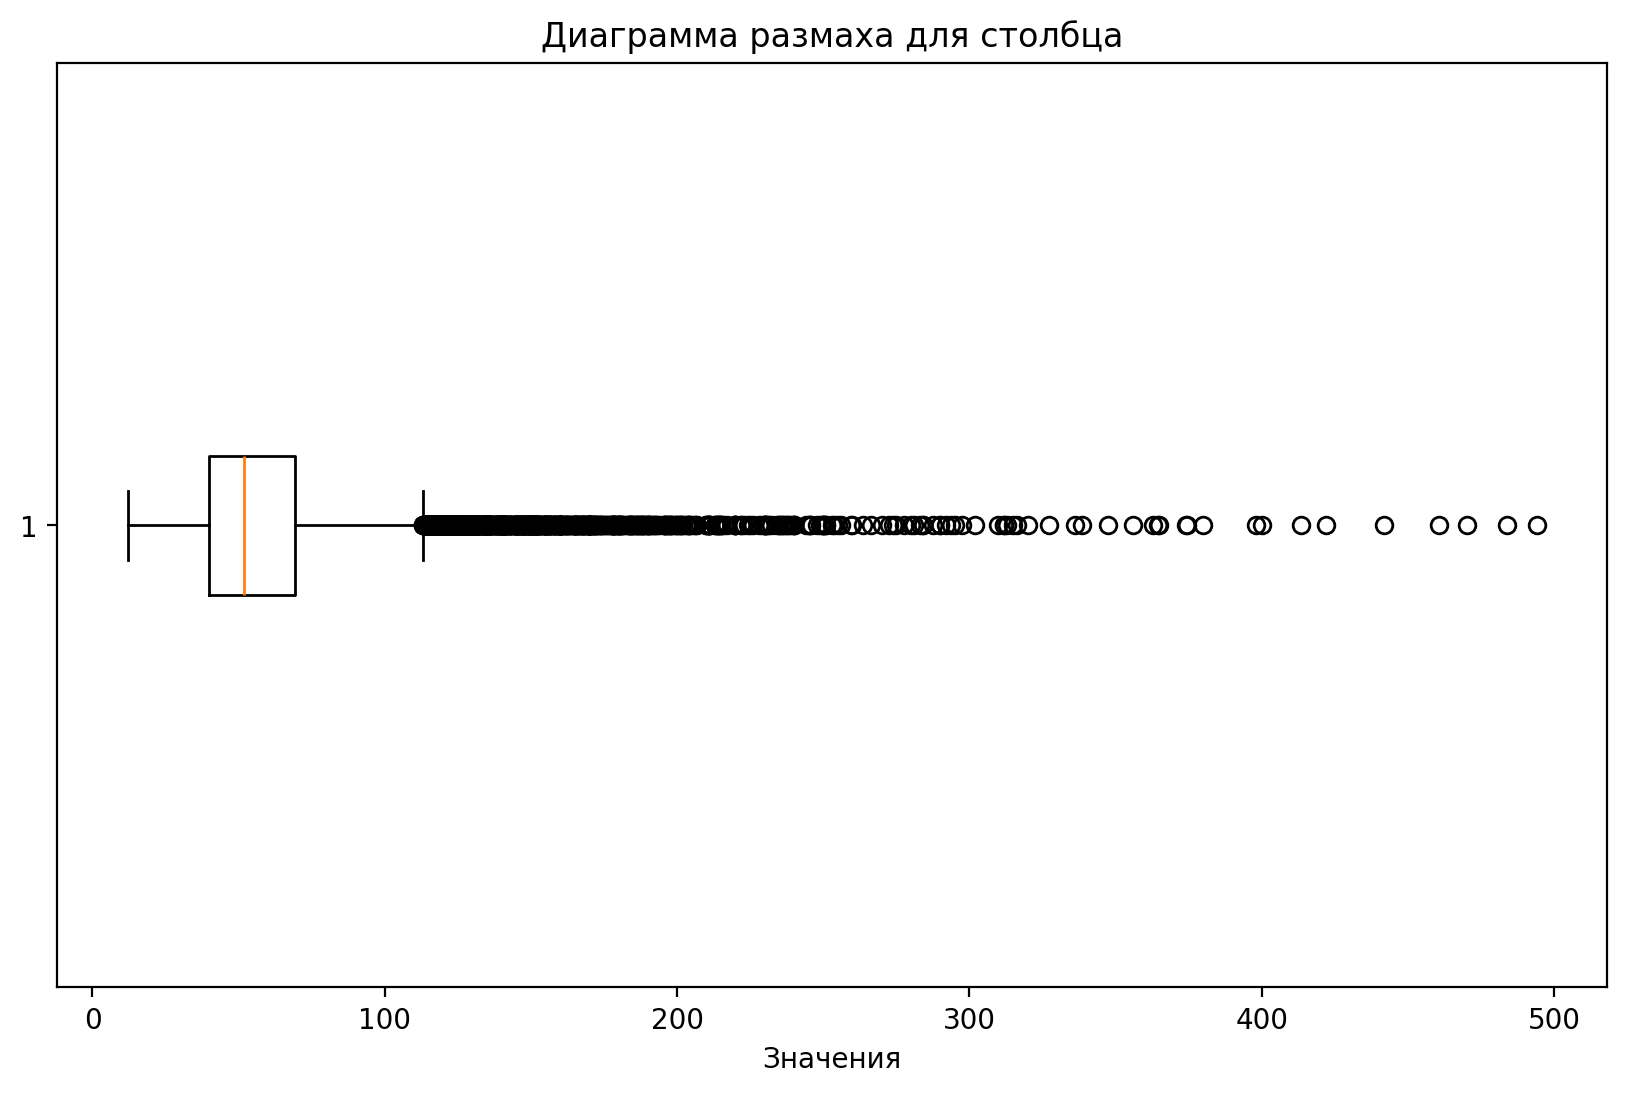

In [14]:
investigate_column(df["total_area"])


* Вывод
	- Обнаруженные аномалии: при первом рассмотрении данные корректны. Присутсвуют выбросы.
    - Причины, по которым они могли возникнуть: одной из причин может быть ошибка при вводе данных. Но данные могут быть и корректны
	- Как исправлять: проверим выбросы и примем решение об удалении
	- Финальный тип и почему: оставим тип ```float```  для площади объекта недвижимости.


Построим гистограммы для значений столбца где площадь больше 200 и меньше 20 кв м:

Количество публикаций с объектом площадью меньше 20 кв м: 26


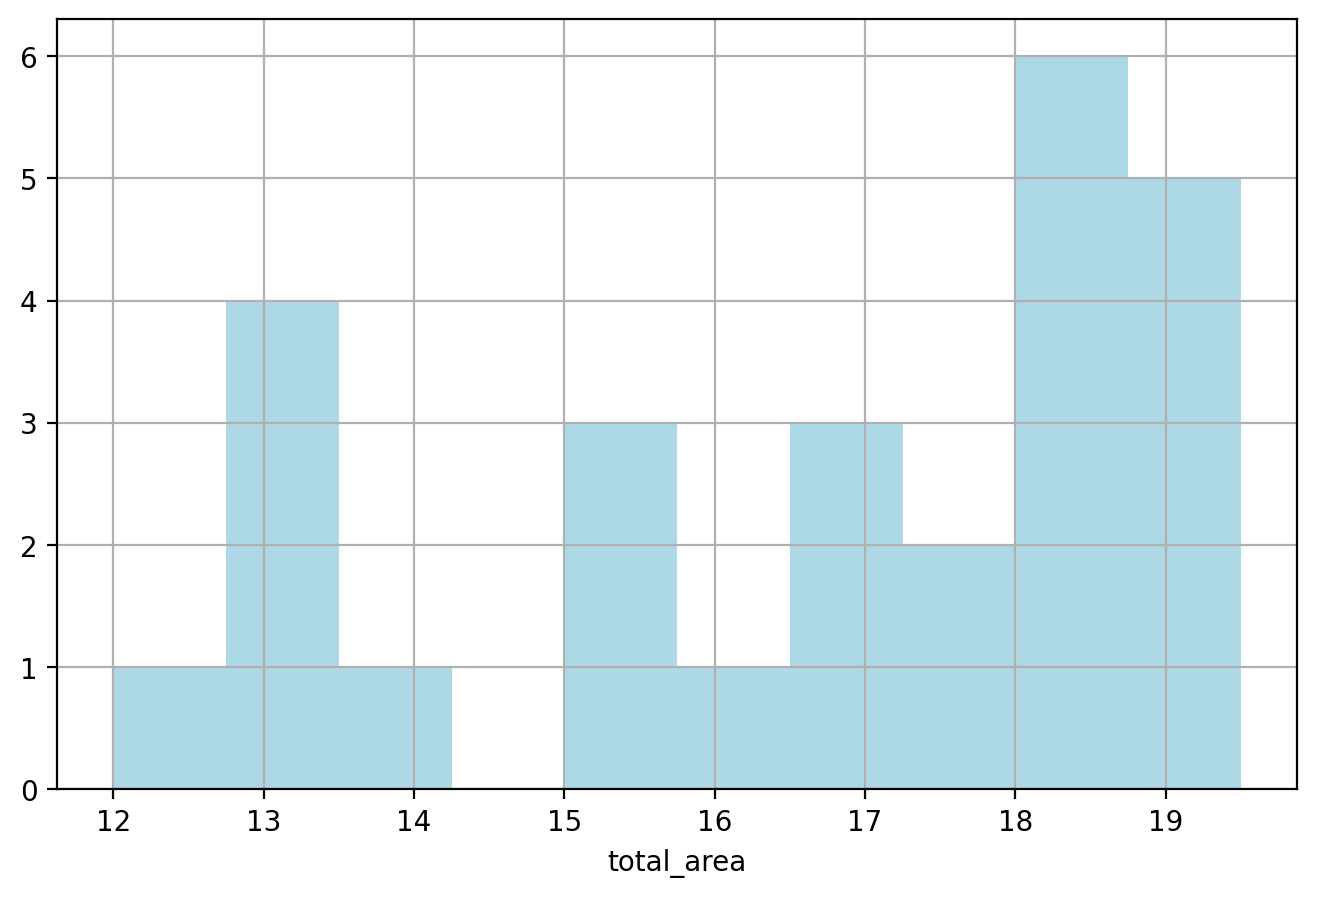

In [15]:
df[df["total_area"] < 20]["total_area"].hist(bins=10, figsize=(8, 5), color="lightblue")
print(
    "Количество публикаций с объектом площадью меньше 20 кв м:",
    len(df[df["total_area"] < 20]),
)
plt.xlabel("total_area")
plt.show()

Количество публикаций с объектом площадью больше 200 кв м: 145


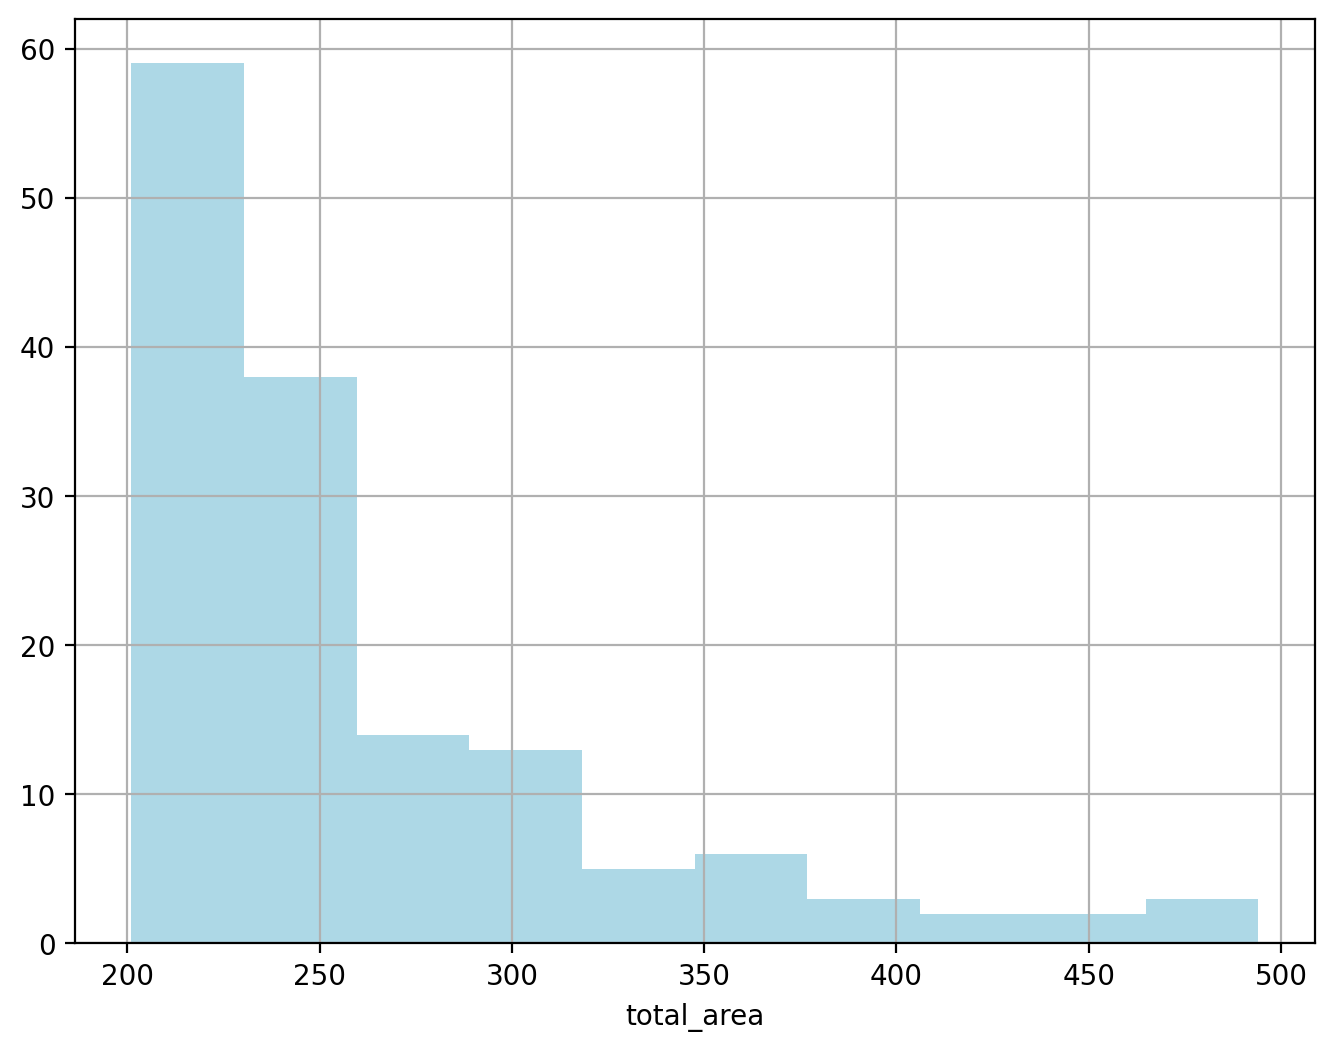

In [16]:
df[df["total_area"] > 200]["total_area"].hist(
    bins=10, figsize=(8, 6), color="lightblue"
)
print(
    "Количество публикаций с объектом площадью больше 200 кв м:",
    len(df[df["total_area"] > 200]),
)
plt.xlabel("total_area")
plt.show()

Удалим строки со значениями площади больше 200кв м. и меньше 20 кв м Они не окажут влияния на исследование, так как количество таких объявлений очень мало

In [17]:
df = df[(df["total_area"] > 20) & (df["total_area"] < 200)]
df.sort_values(by="total_area").tail(2)

total_images  last_price  total_area first_day_exposition  rooms  \
6509              9    30000000      198.90  2017-11-08T00:00:00      5   
15079             4    18924000      199.20  2017-08-15T00:00:00      4   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
6509             3.10         20.00       109.00     16          NaN  ...   
15079             NaN         20.00          NaN      1          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
6509          23.00     5.00  Санкт-Петербург         10,015.00   
15079           NaN     0.00  Санкт-Петербург         17,720.00   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
6509            10,263.00              2.00         587.00              0.00   
15079           16,722.00              3.00         471.00              2.00   

       ponds_nearest  days_exposition  
6509             NaN           524.00  
15079         440.00            51.00  

[2 rows x 22 columns]

**Вывод:**
исследуя столбцы ```total_area``` и ```last_price``` мы исключили данные исходя из того что делаем исследование для основной массы квартир. Если целью исследования будет рынок элитной недвижимости, тогда нужно будет оставлять эти данные, а лучше исследовать их отдельно, так как у этого рынка специфические показатели.


#### Обработка "first_day_exposition"


* Изучим значения


In [18]:
investigate_column(df["first_day_exposition"])

Кол-во Null и Na значений: 0
Кол-во уникальных значений: 1489
Data type: object
count                   23255
unique                   1489
top       2018-02-01T00:00:00
freq                      362
Name: first_day_exposition, dtype: object
Частота уникальных значений столбца:
 first_day_exposition
2018-02-01T00:00:00    362
2017-11-10T00:00:00    237
2017-10-13T00:00:00    121
2017-09-27T00:00:00    106
2018-03-26T00:00:00     97
                      ... 
2016-08-01T00:00:00      1
2015-06-08T00:00:00      1
2016-08-28T00:00:00      1
2015-02-14T00:00:00      1
2015-07-19T00:00:00      1
Name: count, Length: 1489, dtype: int64



* Вывод
	- Обнаруженные аномалии: при первом рассмотрении нет
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: ...
	- Финальный тип и почему: для работы с данными столбца переведем данные в формат даты и времени.


In [19]:
df["first_day_exposition"] = pd.to_datetime(
    df["first_day_exposition"], format="%Y-%m-%dT%H:%M:%S"
)

#### Обработка "rooms"


* Изучим значения


Кол-во Null и Na значений: 0
Кол-во уникальных значений: 10
Data type: int64
count   23,255.00
mean         2.04
std          0.99
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64
Частота уникальных значений столбца:
 rooms
1     7959
2     7880
3     5765
4     1120
5      260
0      186
6       61
7       20
11       2
8        2
Name: count, dtype: int64
Minimum : 0
Maximum : 11
Quantiles:
 0.25   1.00
0.50   2.00
0.75   3.00
Name: rooms, dtype: float64


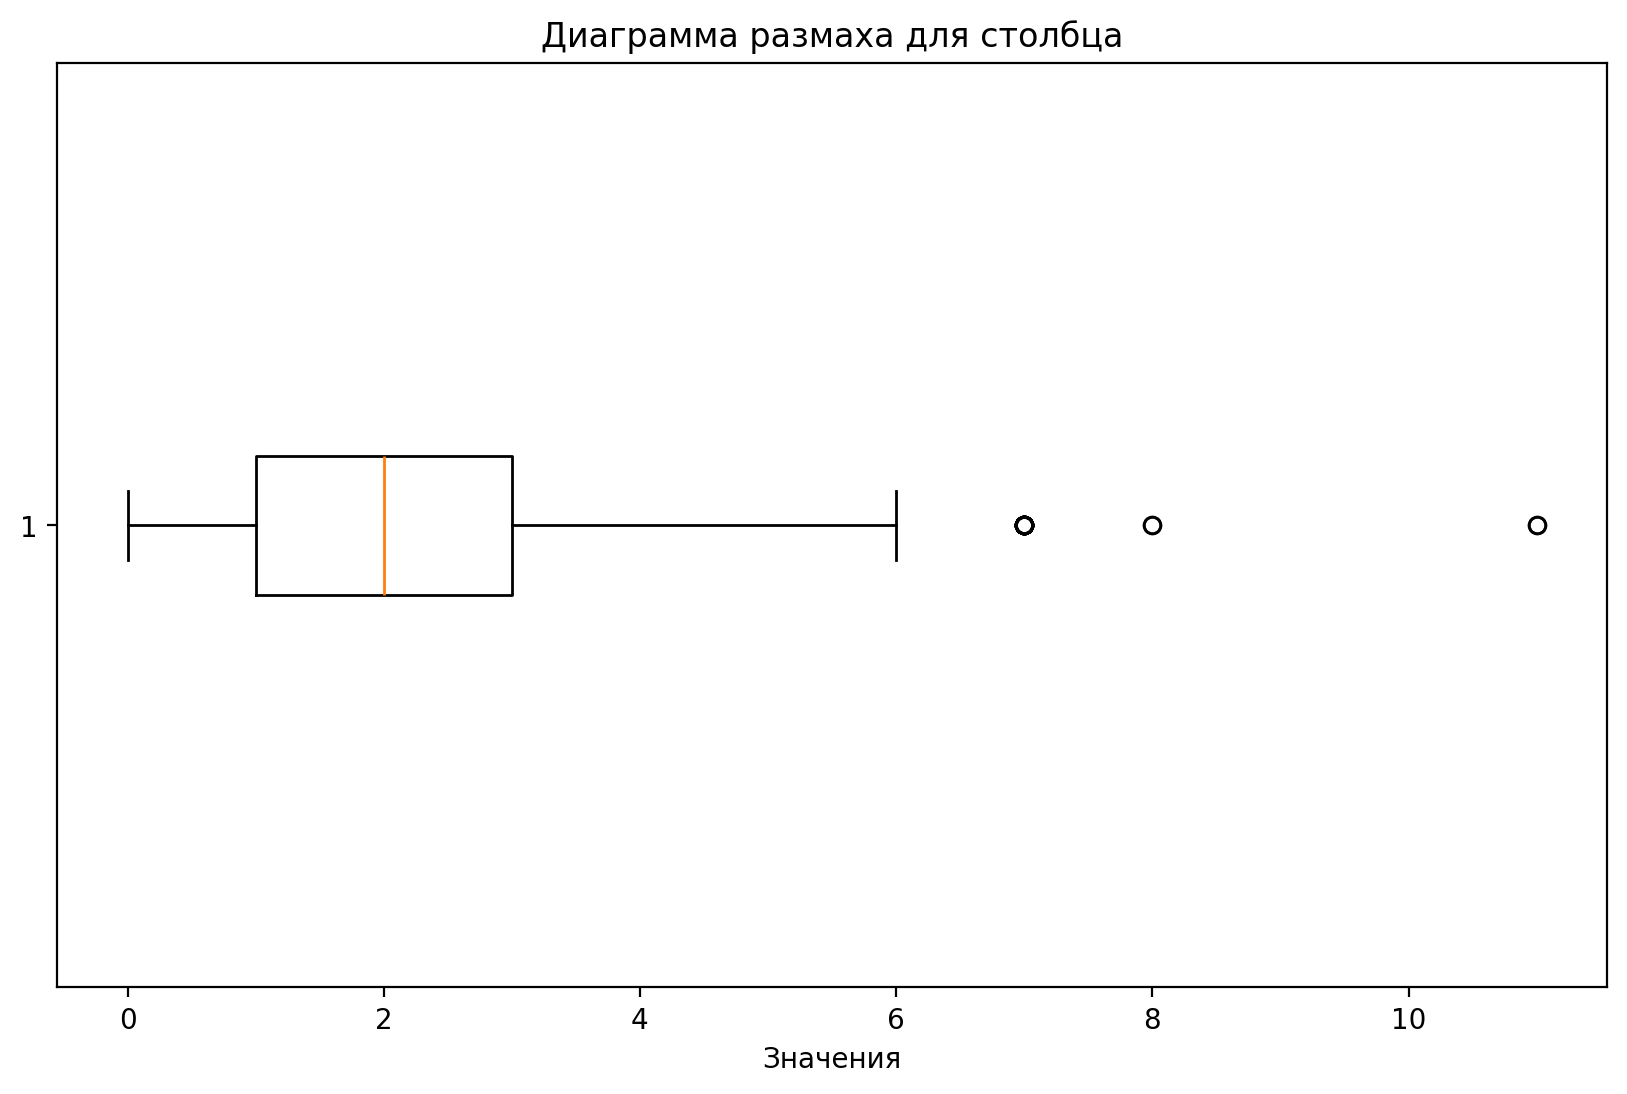

In [20]:
investigate_column(df["rooms"])


* Вывод
	- Обнаруженные аномалии: существуют выбросы 8 и 11 комнат
	- Причины, по которым они могли возникнуть: человеческий фактор, возможно редкое жилье
	- Как исправлять: выбросы уберем, на исследование не повлиет
	- Финальный тип и почему: целочисленный ```int``` подходит идеально


In [21]:
# оставим записи с квартирами до 7 комнат включительно
df = df[df["rooms"] < 8]

#### Обработка "ceiling_height"


* Изучим значения


Кол-во Null и Na значений: 9002
Кол-во уникальных значений: 170
Data type: float64
count   14,249.00
mean         2.76
std          1.27
min          1.00
25%          2.51
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64
Частота уникальных значений столбца:
 ceiling_height
2.50    3482
2.60    1637
2.70    1567
3.00    1079
2.80     988
        ... 
2.34       1
2.20       1
4.37       1
3.93       1
3.59       1
Name: count, Length: 170, dtype: int64
Minimum : 1.0
Maximum : 100.0
Quantiles:
 0.25   2.51
0.50   2.65
0.75   2.80
Name: ceiling_height, dtype: float64


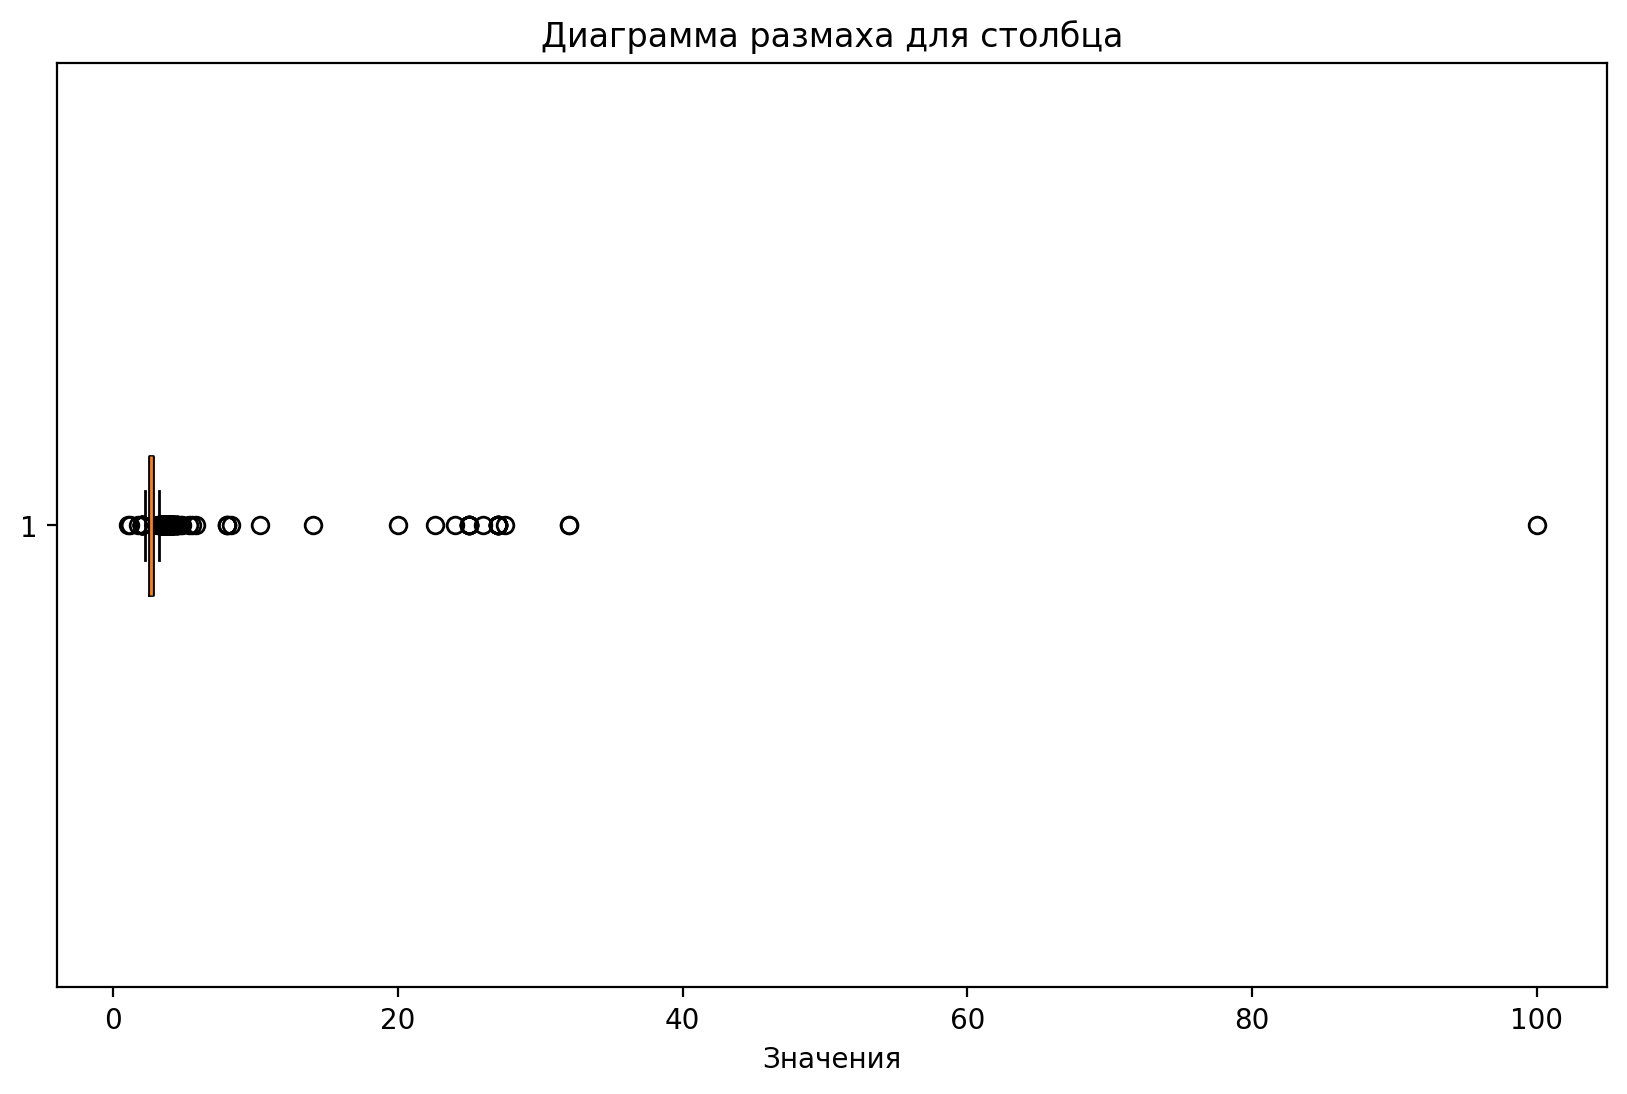

In [22]:
investigate_column(df["ceiling_height"])


* Вывод
	- Обнаруженные аномалии: есть выбросы в большую сторону и значения ниже 2
	- Причины, по которым они могли возникнуть: ошибки при вводе
    - Как исправлять: предположим ,что в значениях выше 20м нужно перенести запятую на 1 знак левее, большие значения исключим из исследования
	- Финальный тип и почему: оставим тип ```float```


In [23]:
# в строках , где значения больше 20 разделим значения на 10
df.loc[df["ceiling_height"] >= 20, "ceiling_height"] = df["ceiling_height"] / 10

# оставим строки со значением меньше 5 и заменим пропуски на медианное значение
df["ceiling_height"] = df["ceiling_height"].fillna(df["ceiling_height"].median())
df = df[df["ceiling_height"] <= 5].reset_index(drop=True)
df["ceiling_height"].describe()

count   23,241.00
mean         2.69
std          0.21
min          1.00
25%          2.60
50%          2.65
75%          2.70
max          4.80
Name: ceiling_height, dtype: float64

#### Обработка "floors_total"


* Изучим значения


Кол-во Null и Na значений: 85
Кол-во уникальных значений: 36
Data type: float64
count   23,156.00
mean        10.76
std          6.61
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64
Частота уникальных значений столбца:
 floors_total
5.00     5625
9.00     3741
16.00    1366
12.00    1353
10.00    1168
4.00     1159
25.00    1073
6.00      860
17.00     828
3.00      630
7.00      563
14.00     551
18.00     504
24.00     469
15.00     365
8.00      364
23.00     351
2.00      347
19.00     335
22.00     285
20.00     268
13.00     227
11.00     202
27.00     164
21.00     158
26.00     124
35.00      24
1.00       22
28.00      21
36.00       3
60.00       1
34.00       1
29.00       1
33.00       1
52.00       1
37.00       1
Name: count, dtype: int64
Minimum : 1.0
Maximum : 60.0
Quantiles:
 0.25    5.00
0.50    9.00
0.75   16.00
Name: floors_total, dtype: float64


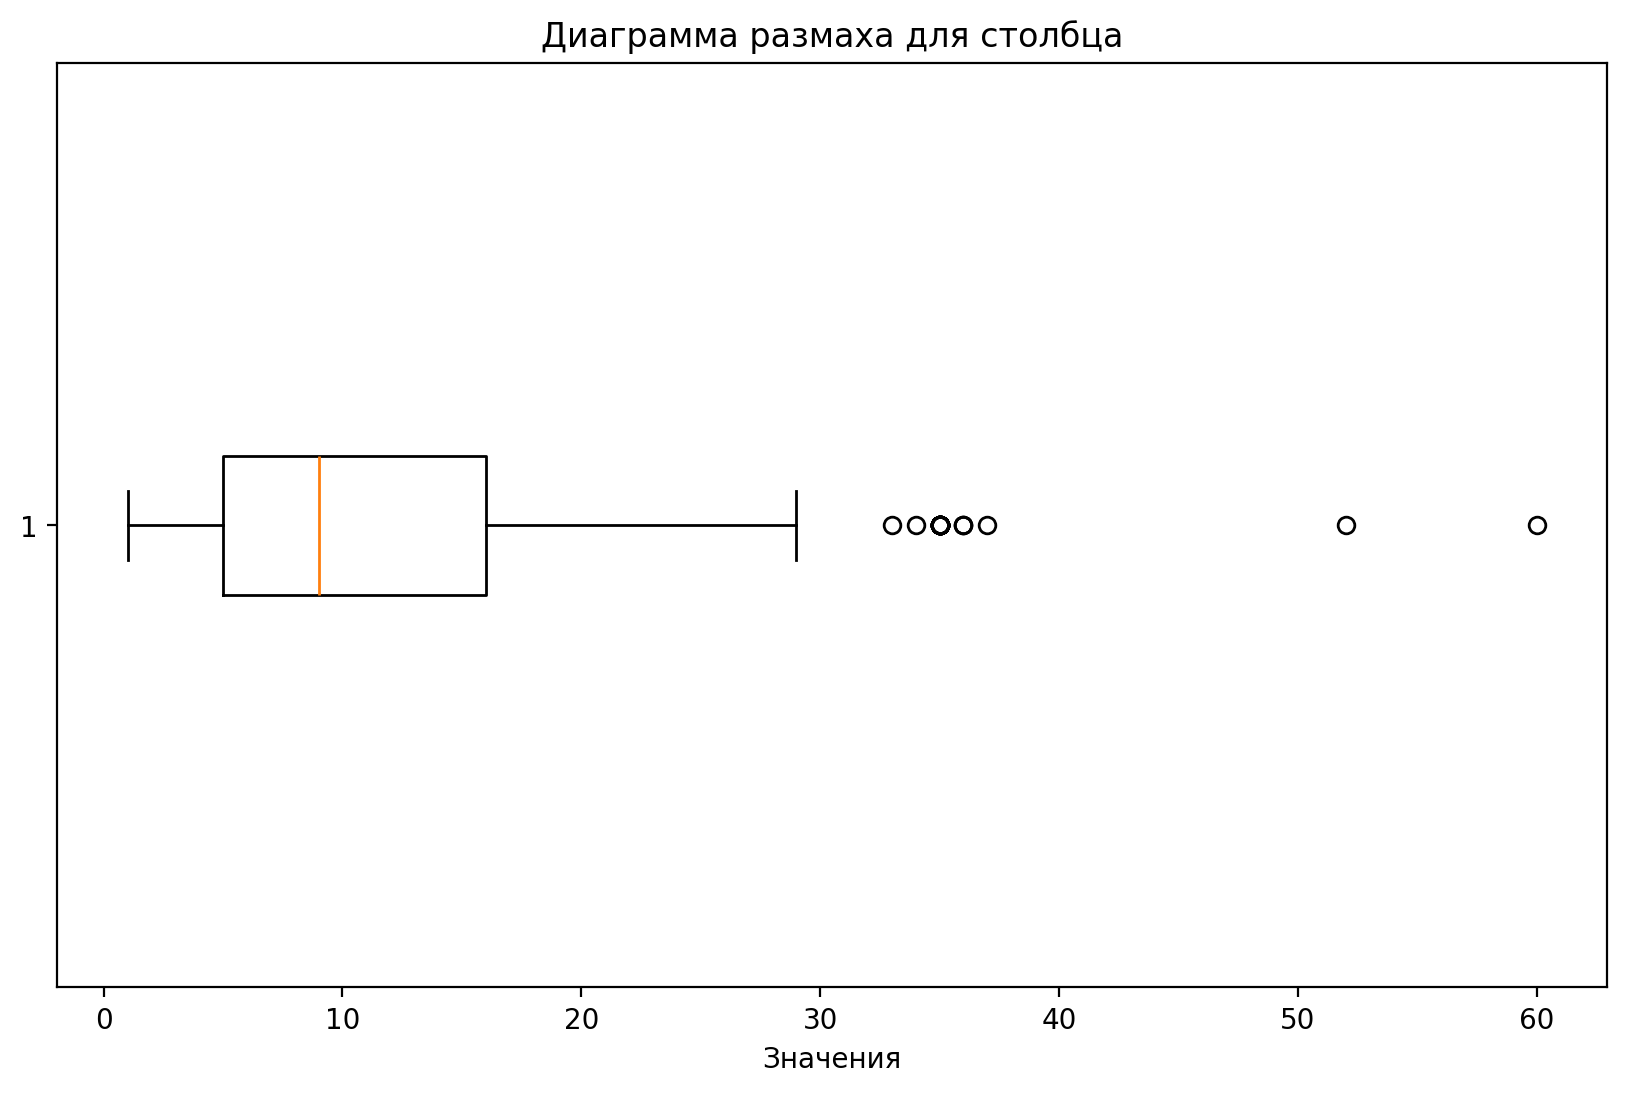

In [24]:
investigate_column(df["floors_total"])


* Вывод
	- Обнаруженные аномалии: на графике видны выбросы, имеются пропуски
	- Причины, по которым они могли возникнуть: ошибки заполнения данных
	- Как исправлять: пропущенные значения мы можем удалить, их мало, выбросы с высокой этажностью-тоже. Это нехарактерные данные, можно с ними расстаться.
    - Финальный тип и почему: изменим на целочисленный ```int```




In [25]:
# оставим строки с этажностью меньше 50 и удалим строки где значения пропущены
df = df.loc[df["floors_total"] < 50]
df = df.dropna(subset=["floors_total"])
df["floors_total"] = df["floors_total"].astype("int")

#### Обработка "living_area"


* Изучим значения


Кол-во Null и Na значений: 1801
Кол-во уникальных значений: 1630
Data type: float64
count   21,353.00
mean        33.19
std         17.15
min          2.00
25%         18.60
50%         30.00
75%         42.00
max        164.70
Name: living_area, dtype: float64
Частота уникальных значений столбца:
 living_area
18.00     872
17.00     660
30.00     590
20.00     479
16.00     471
         ... 
124.90      1
36.07       1
50.81       1
36.81       1
42.55       1
Name: count, Length: 1630, dtype: int64
Minimum : 2.0
Maximum : 164.7
Quantiles:
 0.25   18.60
0.50   30.00
0.75   42.00
Name: living_area, dtype: float64


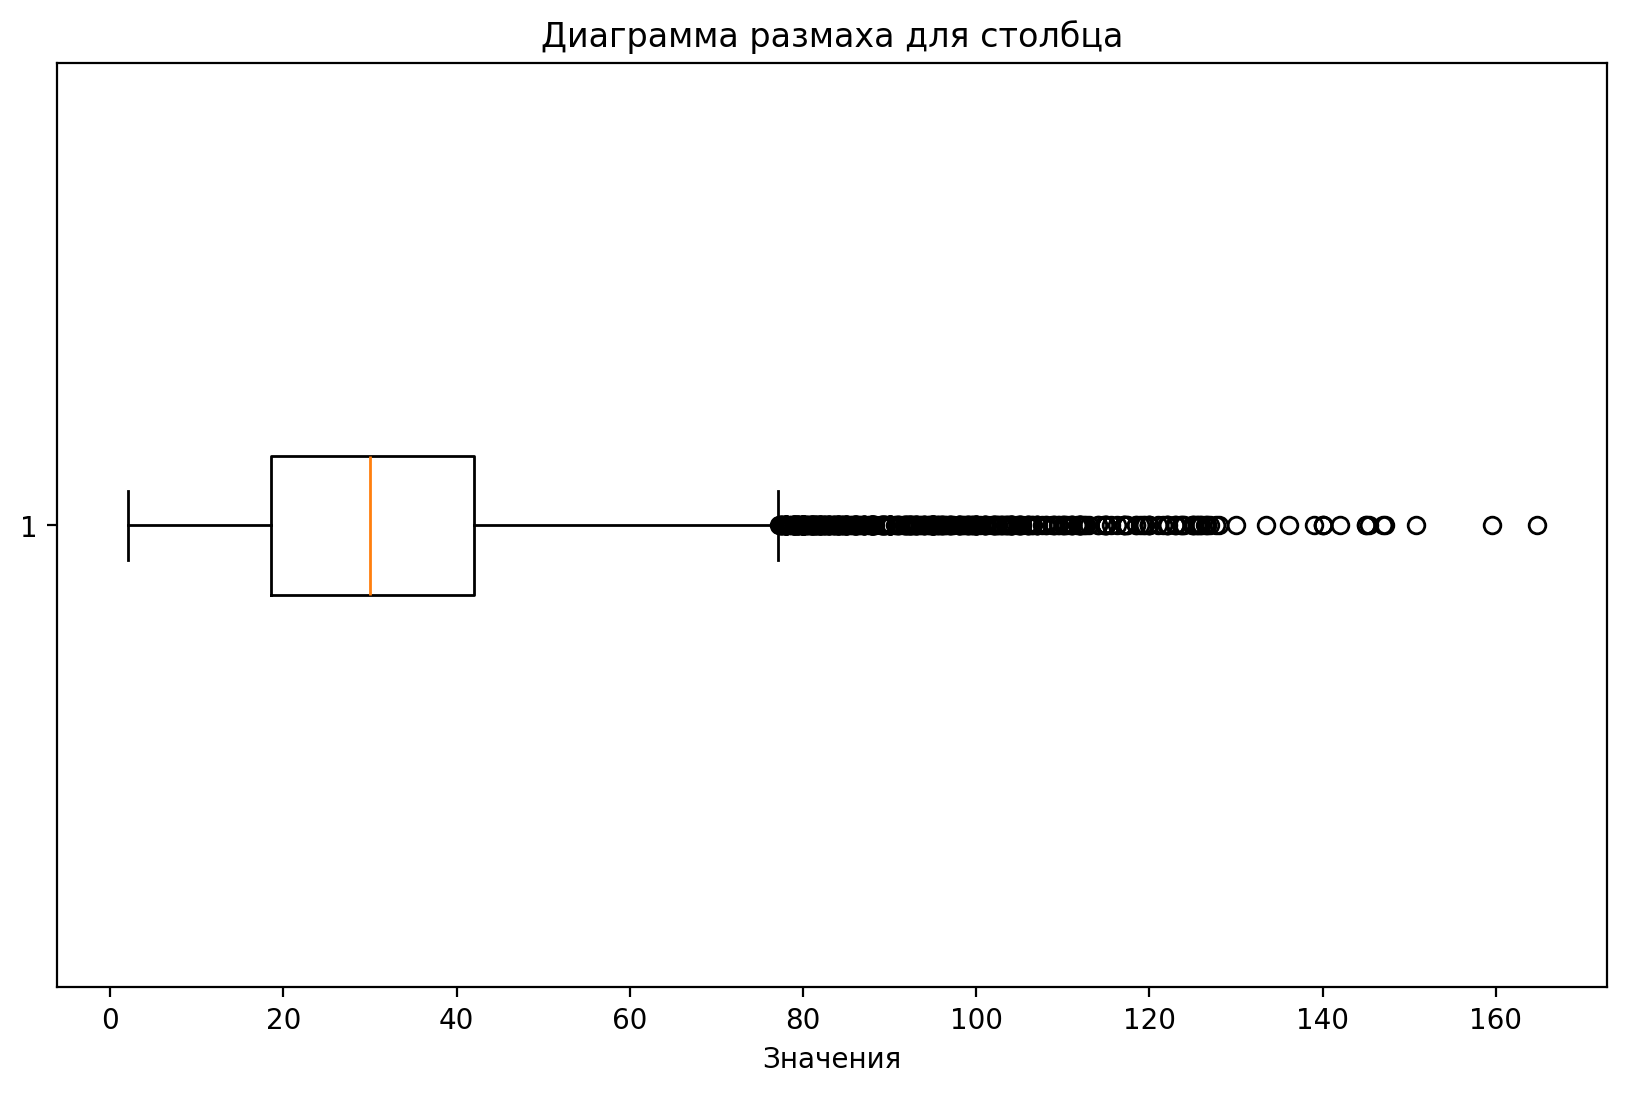

In [26]:
investigate_column(df["living_area"])


* Вывод
	- Обнаруженные аномалии: встречаются значения близкие к ошибочным, очень маленькие для жилой площади
	- Причины, по которым они могли возникнуть: некорректное заполнение
	- Как исправлять:  оценим их количество и примем решением об удалении
	- Финальный тип и почему: оставим ```float```


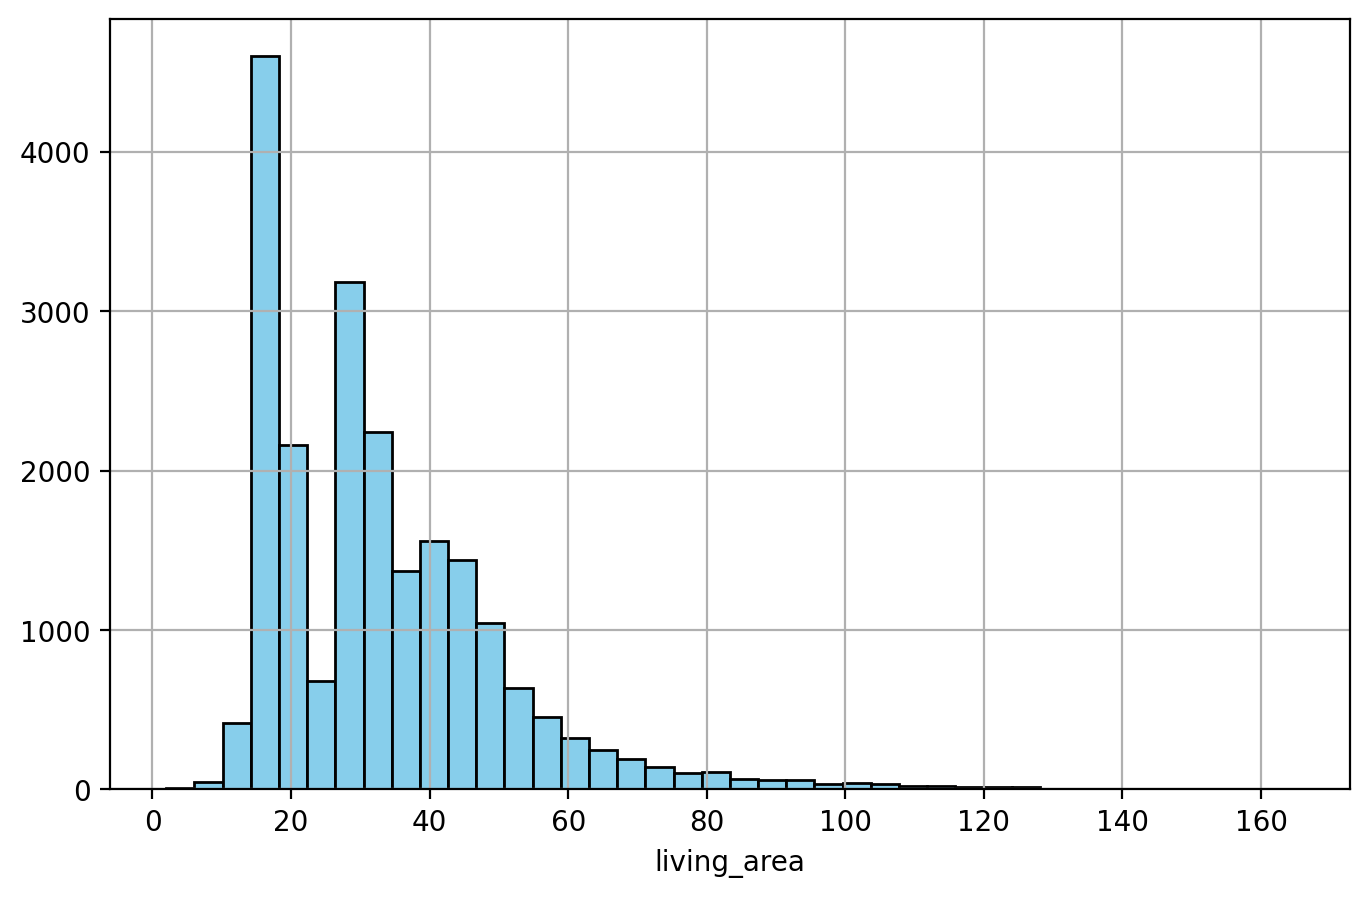

In [27]:
# изучим распределение жилых площадей
df["living_area"].hist(bins=40, figsize=(8, 5), color="skyblue", edgecolor="black")
plt.xlabel("living_area")
plt.show()

Удалим строки где значение меньше 10 - эти данные не корректны и для исследования лучше от них избавиться. Оставшиеся пропуски заполним средним значением площадей

In [28]:
df = (df[(df["living_area"] > 10) | (df["living_area"].isna())]).reset_index(drop=True)
display("Оставшееся количество пропусков:", df["living_area"].isna().sum())

'Оставшееся количество пропусков:'

1801

In [29]:
# Строим сводную таблицу, группируем по двум столбцам, считаем среднее значение для жилой площади
df_living_grouped = df.pivot_table(
    values="living_area", index=["rooms"], aggfunc="mean"
).reset_index()


# Переименовываем столбец
df_living_grouped.rename(columns={"living_area": "living_area_mean"}, inplace=True)
print(df_living_grouped.head(10))
# Объединяем таблицы для заполнения пропусков в living_area
df = df.merge(df_living_grouped, on=["rooms"], how="left")
# Заполняем пропуски в living_area средними значениями из сводной таблицы
df["living_area"] = df["living_area"].fillna(df["living_area_mean"].mean())

# Убираем временный столбец living_area_mean
df.drop(columns=["living_area_mean"], inplace=True)

   rooms  living_area_mean
0      0             19.01
1      1             17.96
2      2             31.76
3      3             47.15
4      4             64.15
5      5             87.83
6      6            105.97
7      7            108.79


In [30]:
df["living_area"].isna().sum()

0

#### Обработка "floor"


* Изучим значения


Кол-во Null и Na значений: 0
Кол-во уникальных значений: 33
Data type: int64
count   23,104.00
mean         5.91
std          4.89
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64
Частота уникальных значений столбца:
 floor
2     3277
3     2996
1     2832
4     2712
5     2549
6     1272
7     1188
8     1061
9     1040
10     680
11     515
12     513
13     374
14     334
15     332
16     310
17     222
18     171
19     144
21     120
22     111
20     107
23      99
24      61
25      44
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: count, dtype: int64
Minimum : 1
Maximum : 33
Quantiles:
 0.25   2.00
0.50   4.00
0.75   8.00
Name: floor, dtype: float64


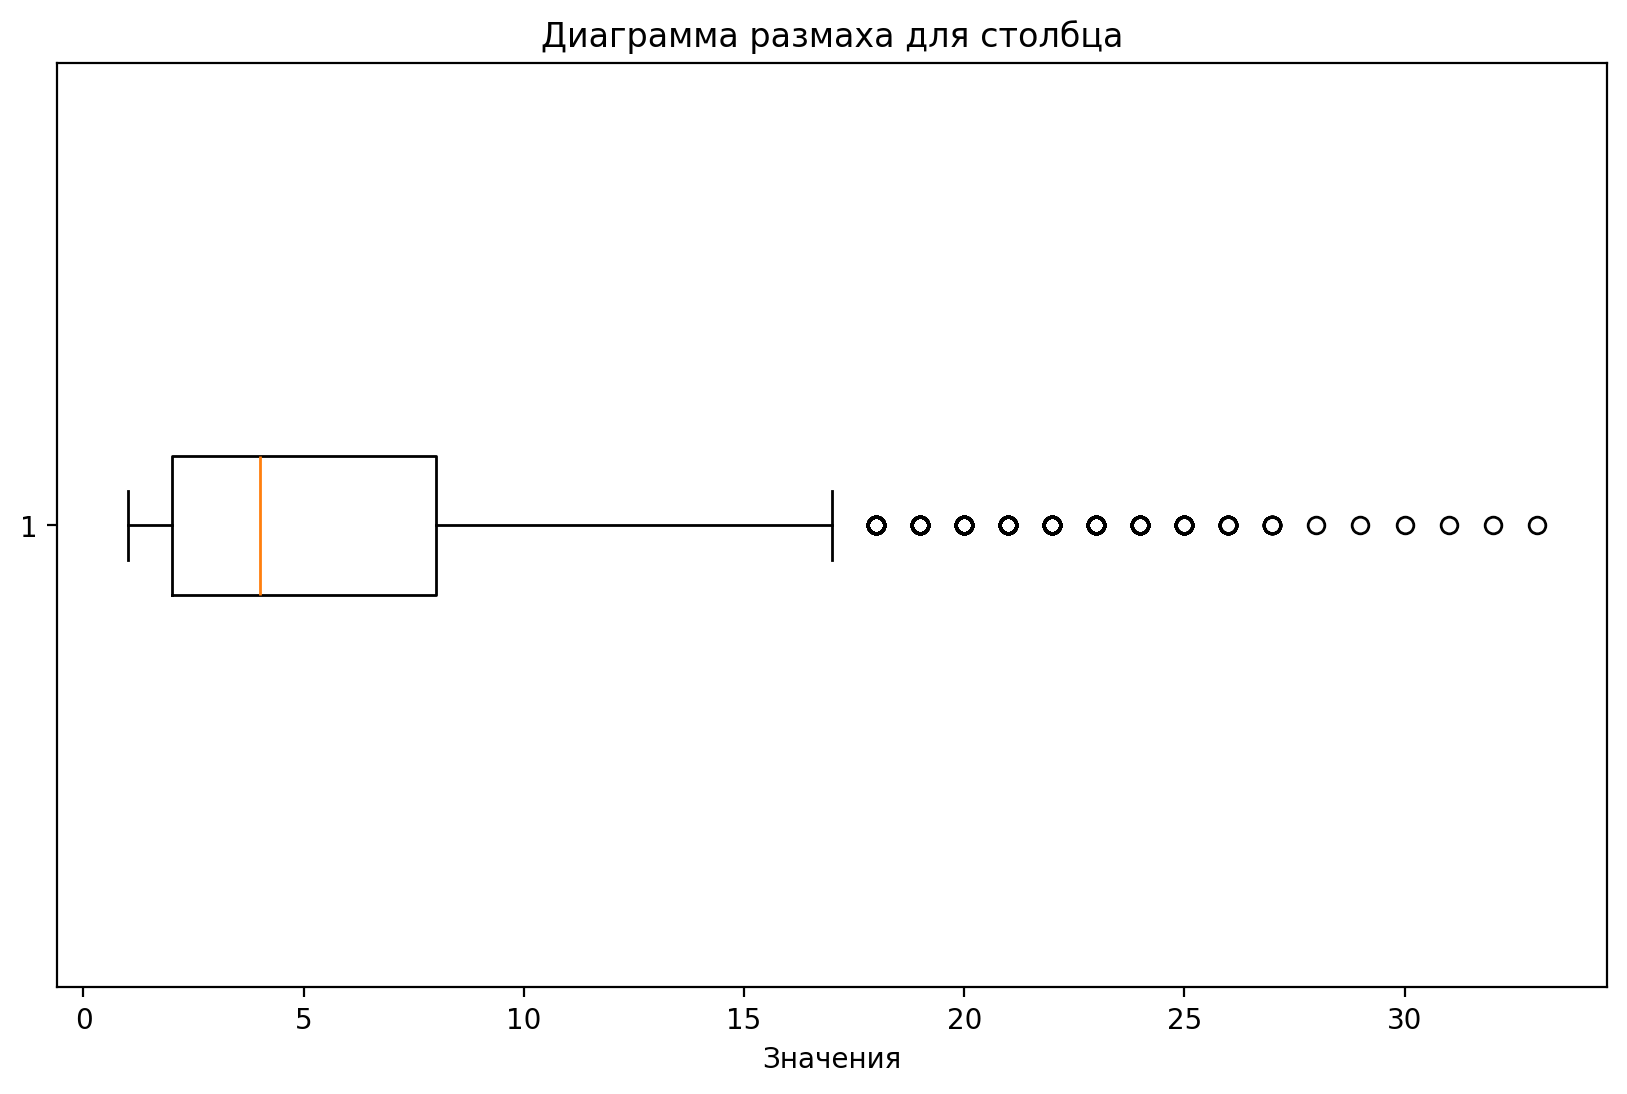

In [31]:
investigate_column(df["floor"])


* Вывод
	- Обнаруженные аномалии:  единичные случаи выбиваются за  межквартильный размах, но в случае с этим столбцом это нормально
	
	- Как исправлять: исправлять не нужно
	- Финальный тип и почему: целочисленный ```int```


In [32]:
df["floor"] = df["floor"].astype("int")

#### Обработка "is_apartment"


* Изучим значения


In [33]:
investigate_column(df["is_apartment"])

Кол-во Null и Na значений: 20382
Кол-во уникальных значений: 2
Data type: object
count      2722
unique        2
top       False
freq       2676
Name: is_apartment, dtype: object
Частота уникальных значений столбца:
 is_apartment
False    2676
True       46
Name: count, dtype: int64



* Вывод
	- Обнаруженные аномалии: большая часть данных в столбце - пропуски. Нельзя опираться в исследовании на такой столбец.
	- Причины, по которым они могли возникнуть: редко встречается по сравнению с обычным типом квартир. Похоже что его не указывали в объявлении о продаже.
	- Как исправлять: заменим на ```False``` пропуски
	- Финальный тип и почему: оставим без изменений


In [34]:
df["is_apartment"] = df["is_apartment"].fillna(value=False)

#### Обработка "studio"


* Изучим значения


In [35]:
investigate_column(df["studio"])

Кол-во Null и Na значений: 0
Кол-во уникальных значений: 2
Data type: bool
count     23104
unique        2
top       False
freq      22969
Name: studio, dtype: object
Частота уникальных значений столбца:
 studio
False    22969
True       135
Name: count, dtype: int64



* Вывод
	- Обнаруженные аномалии: отсуствуют
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: ...
	- Финальный тип и почему: без изменений ```bool```



####  Обработка "open_plan"



* Изучим значения


In [36]:
investigate_column(df["open_plan"])

Кол-во Null и Na значений: 0
Кол-во уникальных значений: 2
Data type: bool
count     23104
unique        2
top       False
freq      23040
Name: open_plan, dtype: object
Частота уникальных значений столбца:
 open_plan
False    23040
True        64
Name: count, dtype: int64



* Вывод
	- Обнаруженные аномалии: отсутствуют. Данные не показательны, так как наличие свободной планировки касаетcя относительно небольшого числа квартир, и не все хорошо представляют что это за характеристика
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: ...
	- Финальный тип и почему: без изменений ```bool```


####  Обработка "kitchen_area"


* Изучим значения


Кол-во Null и Na значений: 2129
Кол-во уникальных значений: 922
Data type: float64
count   20,975.00
mean        10.34
std          5.18
min          1.30
25%          7.00
50%          9.00
75%         11.90
max         75.00
Name: kitchen_area, dtype: float64
Частота уникальных значений столбца:
 kitchen_area
6.00     1265
10.00    1256
8.00     1097
9.00     1092
7.00     1049
         ... 
12.56       1
11.84       1
13.17       1
6.83        1
13.83       1
Name: count, Length: 922, dtype: int64
Minimum : 1.3
Maximum : 75.0
Quantiles:
 0.25    7.00
0.50    9.00
0.75   11.90
Name: kitchen_area, dtype: float64


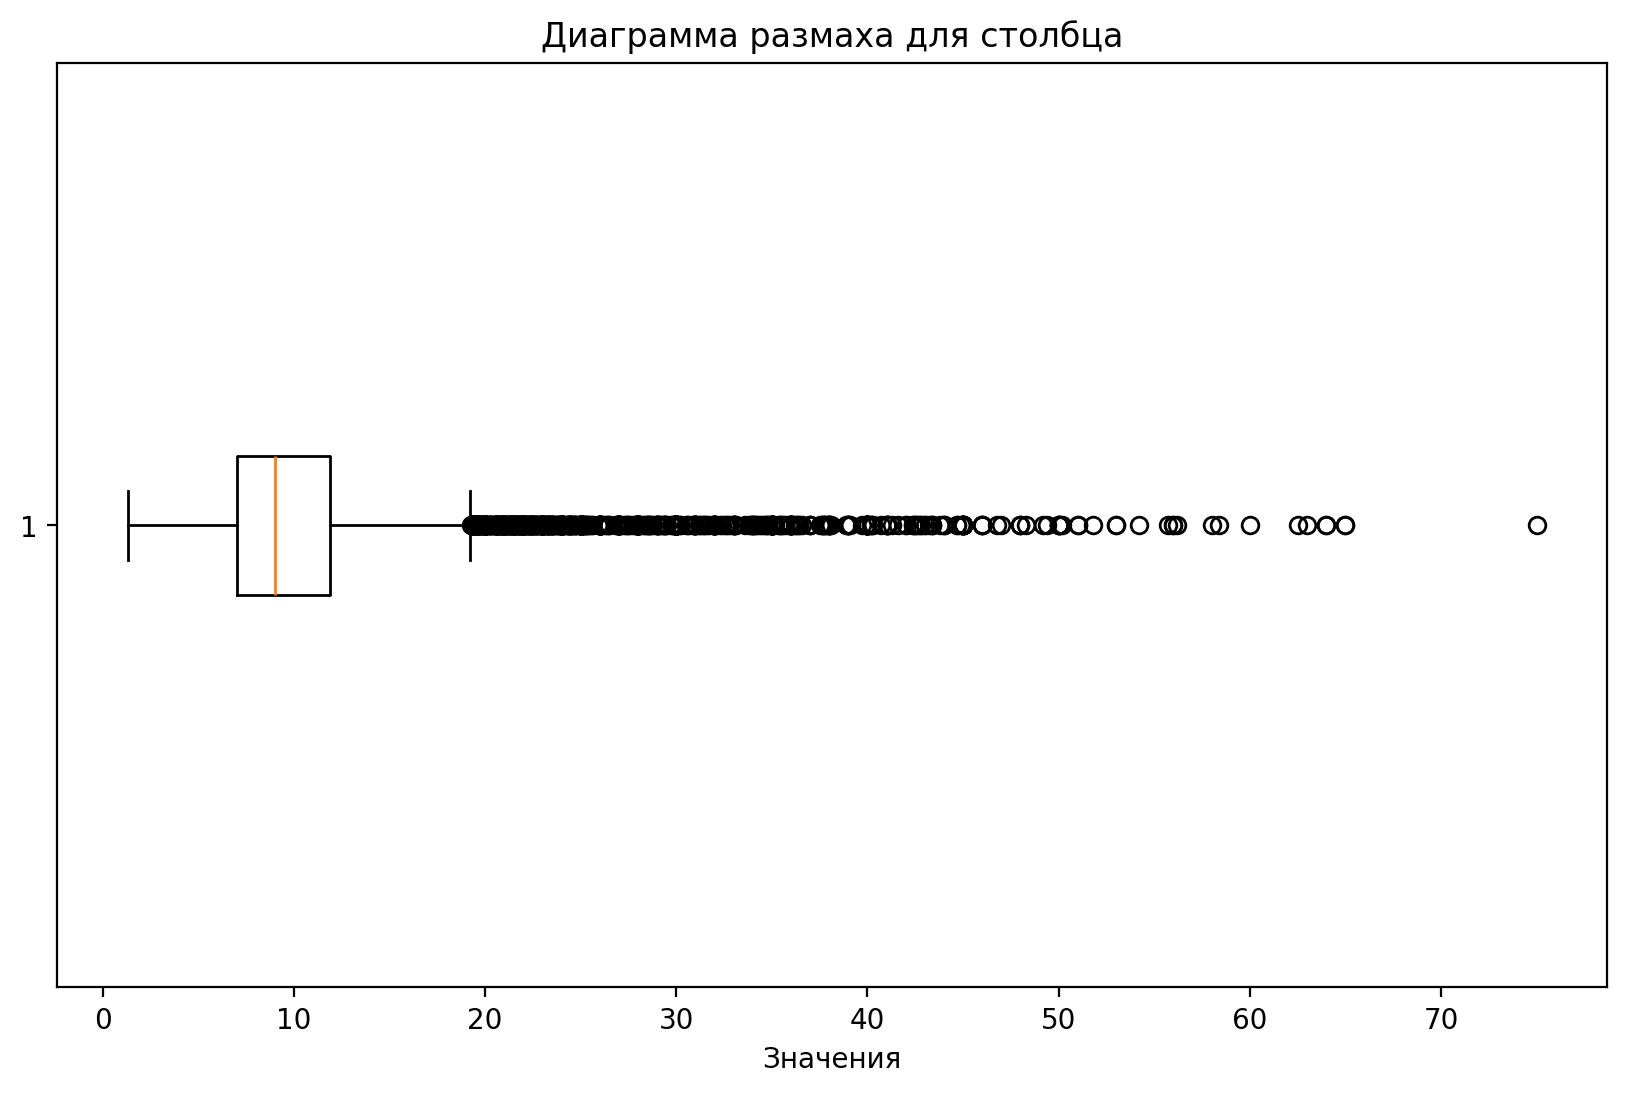

In [37]:
investigate_column(df["kitchen_area"])


* Вывод
	- Обнаруженные аномалии: встречаются выбросы, которые не сильно влияют на среднее , так как оно почти совпадает с медианой
	- Причины, по которым они могли возникнуть: среди типов современных квартир есть квартриры -студии или просто квартиры свободной планировки. В этих случаях более информативна общая площадь. Также есть объекты с очень большими кухнями, такое бывает
	- Как исправлять: изучим столбец подробнее и найдем связь с другими метриками
	- Финальный тип и почему: можно оставить ```float```


Для обработки большого количества пропусков изучим коэф. корреляции Пирсона для нескольких параметров  и примем решение о заполнении пропусков

In [38]:
df[["kitchen_area", "living_area", "total_area", "rooms"]].corr()

kitchen_area  living_area  total_area  rooms
kitchen_area          1.00         0.31        0.56   0.19
living_area           0.31         1.00        0.88   0.84
total_area            0.56         0.88        1.00   0.79
rooms                 0.19         0.84        0.79   1.00

Видим, что наибольшая взаимосвязь площади кухни со столбцом ```living_area```. Воспользуемся этим столбцом для заполнения пропусков  в площадях кухни.
Разобьем на диапазоны значений площадей столбец ```living_area``` , посчитаем среднее для каждого диапазона и заполним этими значениями пропуски следующим образом: для каждого пропуска в столбце ```kitchen_area``` возьмем среднее значение , соответсвующее диапазону из ```living_area``` в этой строке


In [39]:
# добавляем столбец с категориями( диапазонами)
df["area_category"] = pd.cut(
    df["living_area"],
    bins=(10, 30, 50, 70, 90, 110, 130, 150, 170),
    labels=[
        "10-30",
        "30-50",
        "50-70",
        "70-90",
        "90-110",
        "110-130",
        "130-150",
        "150-170",
    ],
)
# Находим средние значения для категорий living_area применяя метод к каждой группе
kitchen_cat_means = df.groupby("area_category")["kitchen_area"].transform("mean")
print(len(df))
len(kitchen_cat_means)

23104


23104

In [40]:
# получили датафрейм той же длины что и исходный, значит можем заполнить пропуски средним по категории:
df["kitchen_area"] = df["kitchen_area"].fillna(kitchen_cat_means)

Для более корректных расчетов избавимся от экстремально низких значений площадей меьнше 5 кв.м. Из открытых источников это минимальное допустимое значение площади кухни

In [41]:
df = df[df["kitchen_area"] > 5]


#### Обработка "balcony"



* Изучим значения


Кол-во Null и Na значений: 10976
Кол-во уникальных значений: 6
Data type: float64
count   11,673.00
mean         1.17
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64
Частота уникальных значений столбца:
 balcony
1.00    3995
2.00    3598
0.00    3527
5.00     299
4.00     176
3.00      78
Name: count, dtype: int64
Minimum : 0.0
Maximum : 5.0
Quantiles:
 0.25   0.00
0.50   1.00
0.75   2.00
Name: balcony, dtype: float64


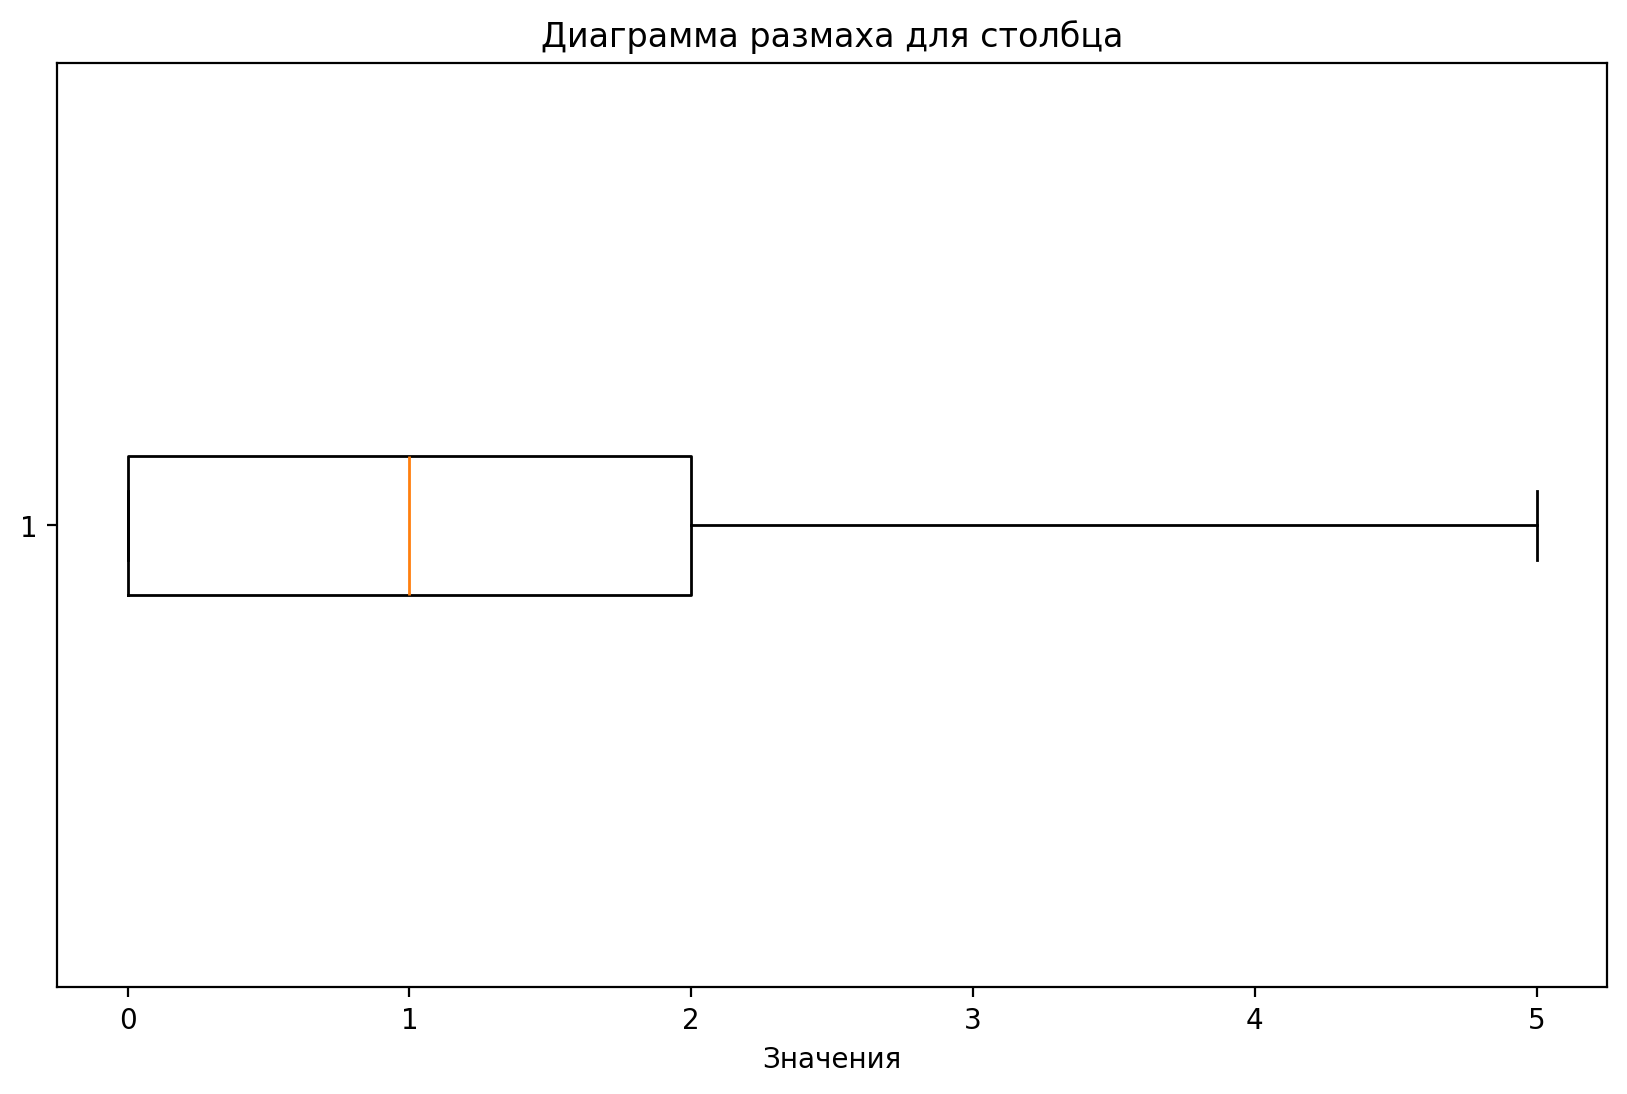

In [42]:
investigate_column(df["balcony"])


* Вывод
	- Обнаруженные аномалии: не обнаружено
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: 
	- Финальный тип и почему: изменим на ```int```


Заменим пропуски на 0, скорее всего собственники таких квартир не заполняли эту графу, так как если бы он был - было бы указано число балконов, это важная характеристика квартиры.

In [43]:
df["balcony"] = df["balcony"].fillna(0).astype("int")
df["balcony"].isna().sum()

0


#### Обработка "locality_name"



* Изучим значения


In [44]:
investigate_column(df["locality_name"])

Кол-во Null и Na значений: 47
Кол-во уникальных значений: 347
Data type: object
count               22602
unique                347
top       Санкт-Петербург
freq                15124
Name: locality_name, dtype: object
Частота уникальных значений столбца:
 locality_name
Санкт-Петербург                                      15124
посёлок Мурино                                         511
посёлок Шушары                                         430
Всеволожск                                             394
Пушкин                                                 335
                                                     ...  
деревня Курковицы                                        1
посёлок Коробицыно                                       1
деревня Бор                                              1
посёлок при железнодорожной станции Приветнинское        1
посёлок Дзержинского                                     1
Name: count, Length: 347, dtype: int64



* Вывод
	- Обнаруженные аномалии: есть данные без локации. это странно при продаже жилья - исключим такие данные
	- Причины, по которым они могли возникнуть: некорректное заполнение
	- Как исправлять: исключим пропуски данных, обработаем неявные дубликаты 
	- Финальный тип и почему: оставим без изменений


In [45]:
# уберем пробелы в начале строк, приведем к нижнему регистру и проверим на явные дубликаты:
df["locality_name"] = df["locality_name"].str.strip().str.lower()
df.drop_duplicates()
# уберем пропуски
df.dropna(subset=["locality_name"], inplace=True)

In [46]:
# выведем для изучения список населенных пунктов столбца по алфавиту
unique_names = df["locality_name"].unique().tolist()
sorted(unique_names)

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской поселок большая ижора',
 'городской поселок янино-1',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'де

Мы видим что написания населенных пунктов немного отличаются. В дальнейшем нам может потребоваться разделить их по категориями, чтобы сравнить друг с другом или провести анализ внутри категорий, например стоимость однокомнатной квартиры в поселке со стоимостью в деревне. Для удобства деления на категории преобразуем названия:

In [47]:
# написание поселок приведем к одному виду:
df["locality_name"] = df["locality_name"].str.replace("ё", "е")

In [48]:
# изменим названия населенных пунктов для удобства обращения к ним

df["locality_name"] = df["locality_name"].replace(
    ["городской поселок", "коттеджный поселок", "поселок городского типа"],
    "поселок",
    regex=True,
)
sorted(df["locality_name"].unique().tolist())

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня котлы',
 'деревня кривко',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня курковицы',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'деревня лаголово',
 'деревня лампово',
 'деревня лесколово',
 'деревня ло

Теперь названия населенных пунктов можно обработать по ключевым словам *поселок* , *сел*, *деревн* и распределить по категориям.

####  Обработка "airports_nearest"


* Изучим значения


Кол-во Null и Na значений: 5207
Кол-во уникальных значений: 8007
Data type: float64
count   17,395.00
mean    28,861.18
std     12,651.59
min          0.00
25%     18,530.50
50%     26,902.00
75%     37,407.00
max     84,869.00
Name: airports_nearest, dtype: float64
Частота уникальных значений столбца:
 airports_nearest
37,434.00    61
21,928.00    31
39,946.00    29
44,870.00    29
37,407.00    27
             ..
24,902.00     1
21,280.00     1
41,488.00     1
50,322.00     1
24,665.00     1
Name: count, Length: 8007, dtype: int64
Minimum : 0.0
Maximum : 84869.0
Quantiles:
 0.25   18,530.50
0.50   26,902.00
0.75   37,407.00
Name: airports_nearest, dtype: float64


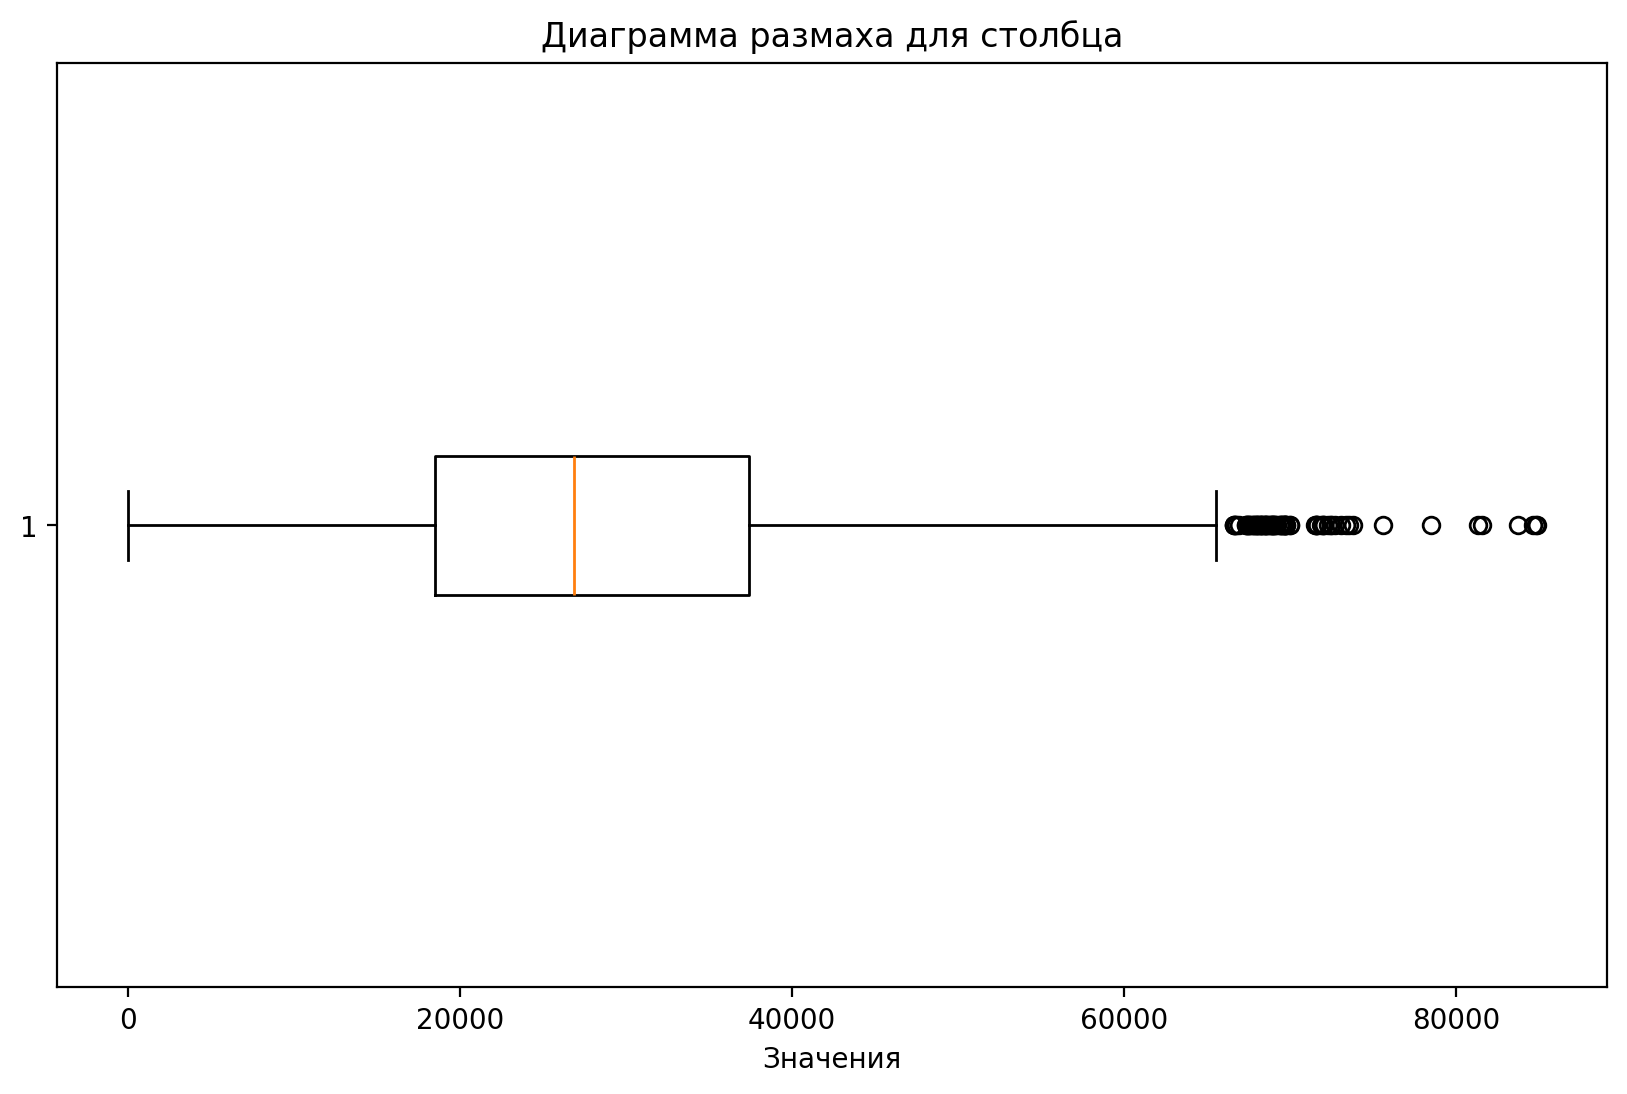

In [49]:
investigate_column(df["airports_nearest"])


* Вывод
	- Обнаруженные аномалии: пропусков в данных много. Достоверно заполнить эти пропуски сложно, так как это картографические данные, скорее всего автоматически считающиеся при создании объявления.
    - Причины, по которым они могли возникнуть: вероятнее проблема техническая
	- Как исправлять:  на данном этапе оставим данные без изменений. Если этих данных не будет хватать для исследования, нужно будет уточнить их, или принять решение о заполнении пропусков исходя из населенного пункта, но сейчас это нецелесообразно
	- Финальный тип и почему: оставим ```float```



#### Обработка "cityCenters_nearest"



* Изучим значения


Кол-во Null и Na значений: 5187
Кол-во уникальных значений: 7385
Data type: float64
count   17,415.00
mean    14,224.45
std      8,460.76
min        181.00
25%      9,479.00
50%     13,164.00
75%     16,275.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64
Частота уникальных значений столбца:
 cityCenters_nearest
8,460.00     61
20,802.00    31
10,720.00    29
20,444.00    27
8,434.00     27
             ..
12,319.00     1
12,856.00     1
16,746.00     1
14,514.00     1
6,263.00      1
Name: count, Length: 7385, dtype: int64
Minimum : 181.0
Maximum : 65968.0
Quantiles:
 0.25    9,479.00
0.50   13,164.00
0.75   16,275.00
Name: cityCenters_nearest, dtype: float64


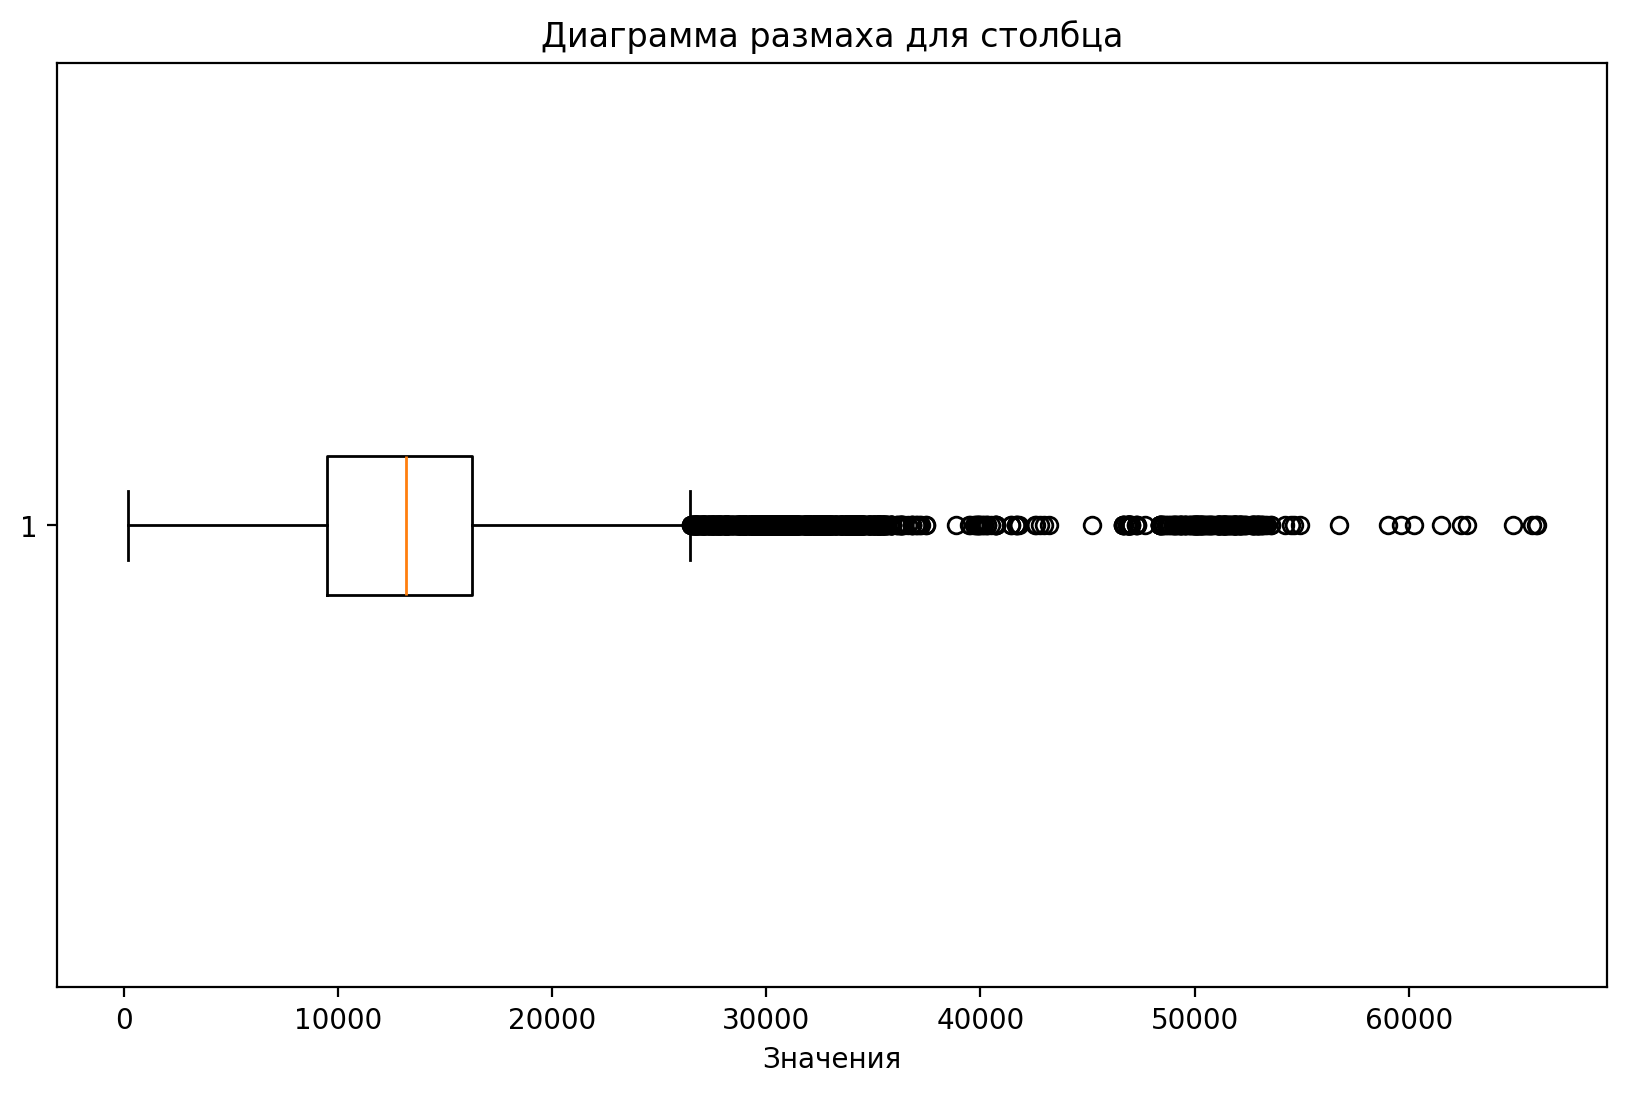

In [50]:
investigate_column(df["cityCenters_nearest"])


* Вывод
	- Обнаруженные аномалии: диаграмма размаха похожа на столбец *"расстояние до аэропорта"* и количество пропусков практически совпадает
	- Причины, по которым они могли возникнуть: скорее всего причина техническая
	- Как исправлять: на данном этапе оставим данные без изменений. Если этих данныхъ не будет хватать для исследования, нужно будет уточнить их, или принять решение о заполнении пропусков исходя из населенного пункта, но сейчас это нецелесообразно
	- Финальный тип и почему: оставим ```float```


In [51]:
# изменим название столцбцов в df
df = df.rename(
    columns={
        "cityCenters_nearest": "city_centers_nearest",
        "parks_around3000": "parks_around_3000",
        "ponds_around3000": "ponds_around_3000",
    }
)


#### Обработка "parks_around3000"



* Изучим значения


Кол-во Null и Na значений: 5186
Кол-во уникальных значений: 4
Data type: float64
count   17,416.00
mean         0.60
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: float64
Частота уникальных значений столбца:
 parks_around_3000
0.00    9768
1.00    5453
2.00    1627
3.00     568
Name: count, dtype: int64
Minimum : 0.0
Maximum : 3.0
Quantiles:
 0.25   0.00
0.50   0.00
0.75   1.00
Name: parks_around_3000, dtype: float64


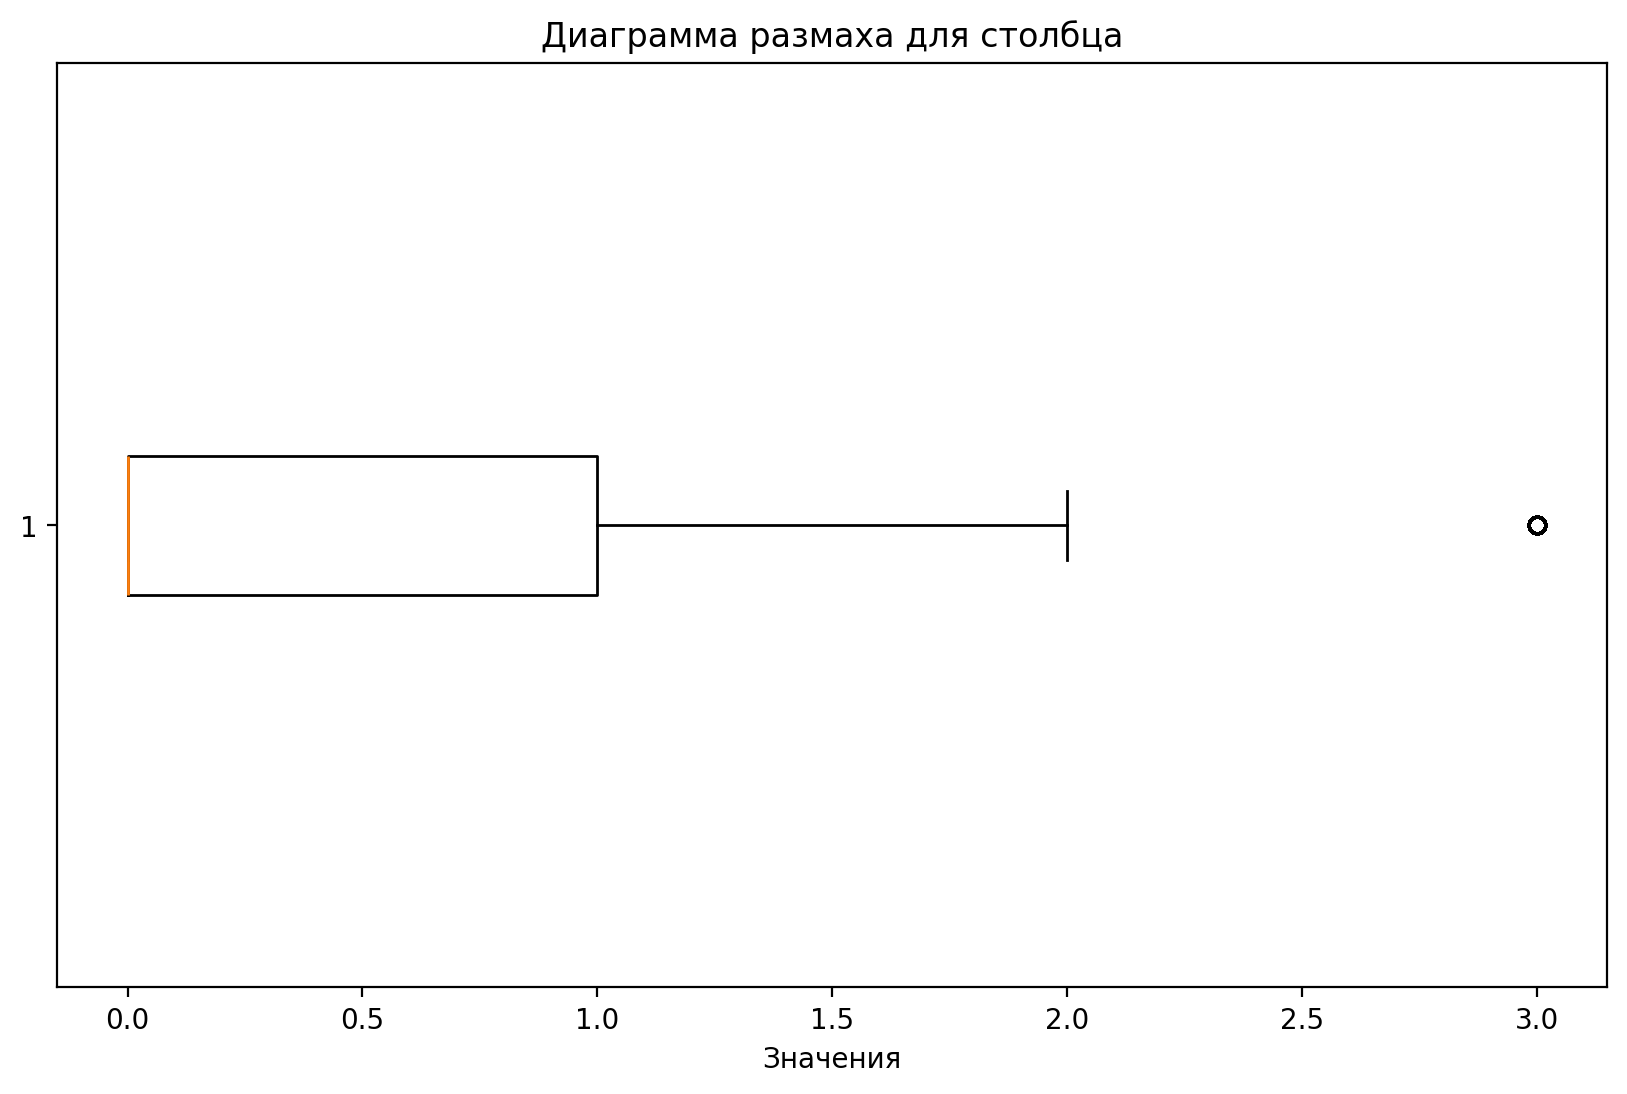

In [52]:
investigate_column(df["parks_around_3000"])

* Вывод
	- Обнаруженные аномалии: диаграмма размаха похожа на столбец  "расстояние до аэропорта" и количество пропусков практически совпадает
	- Причины, по которым они могли возникнуть: скорее всего причина техническая
	- Как исправлять: на данном этапе оставим данные без изменений. Если этих данныхъ не будет хватать для исследования, нужно будет уточнить их, или принять решение о заполнении пропусков исходя из населенного пункта, но сейчас это нецелесообразно
	- Финальный тип и почему: оставим ```float```


#### Обработка "parks_nearest"

* Изучим значения


Кол-во Null и Na значений: 14950
Кол-во уникальных значений: 983
Data type: float64
count   7,652.00
mean      493.52
std       344.16
min         1.00
25%       288.00
50%       456.00
75%       615.00
max     3,190.00
Name: parks_nearest, dtype: float64
Частота уникальных значений столбца:
 parks_nearest
441.00      67
392.00      41
456.00      39
173.00      39
471.00      29
            ..
861.00       1
1,496.00     1
770.00       1
727.00       1
2,984.00     1
Name: count, Length: 983, dtype: int64
Minimum : 1.0
Maximum : 3190.0
Quantiles:
 0.25   288.00
0.50   456.00
0.75   615.00
Name: parks_nearest, dtype: float64


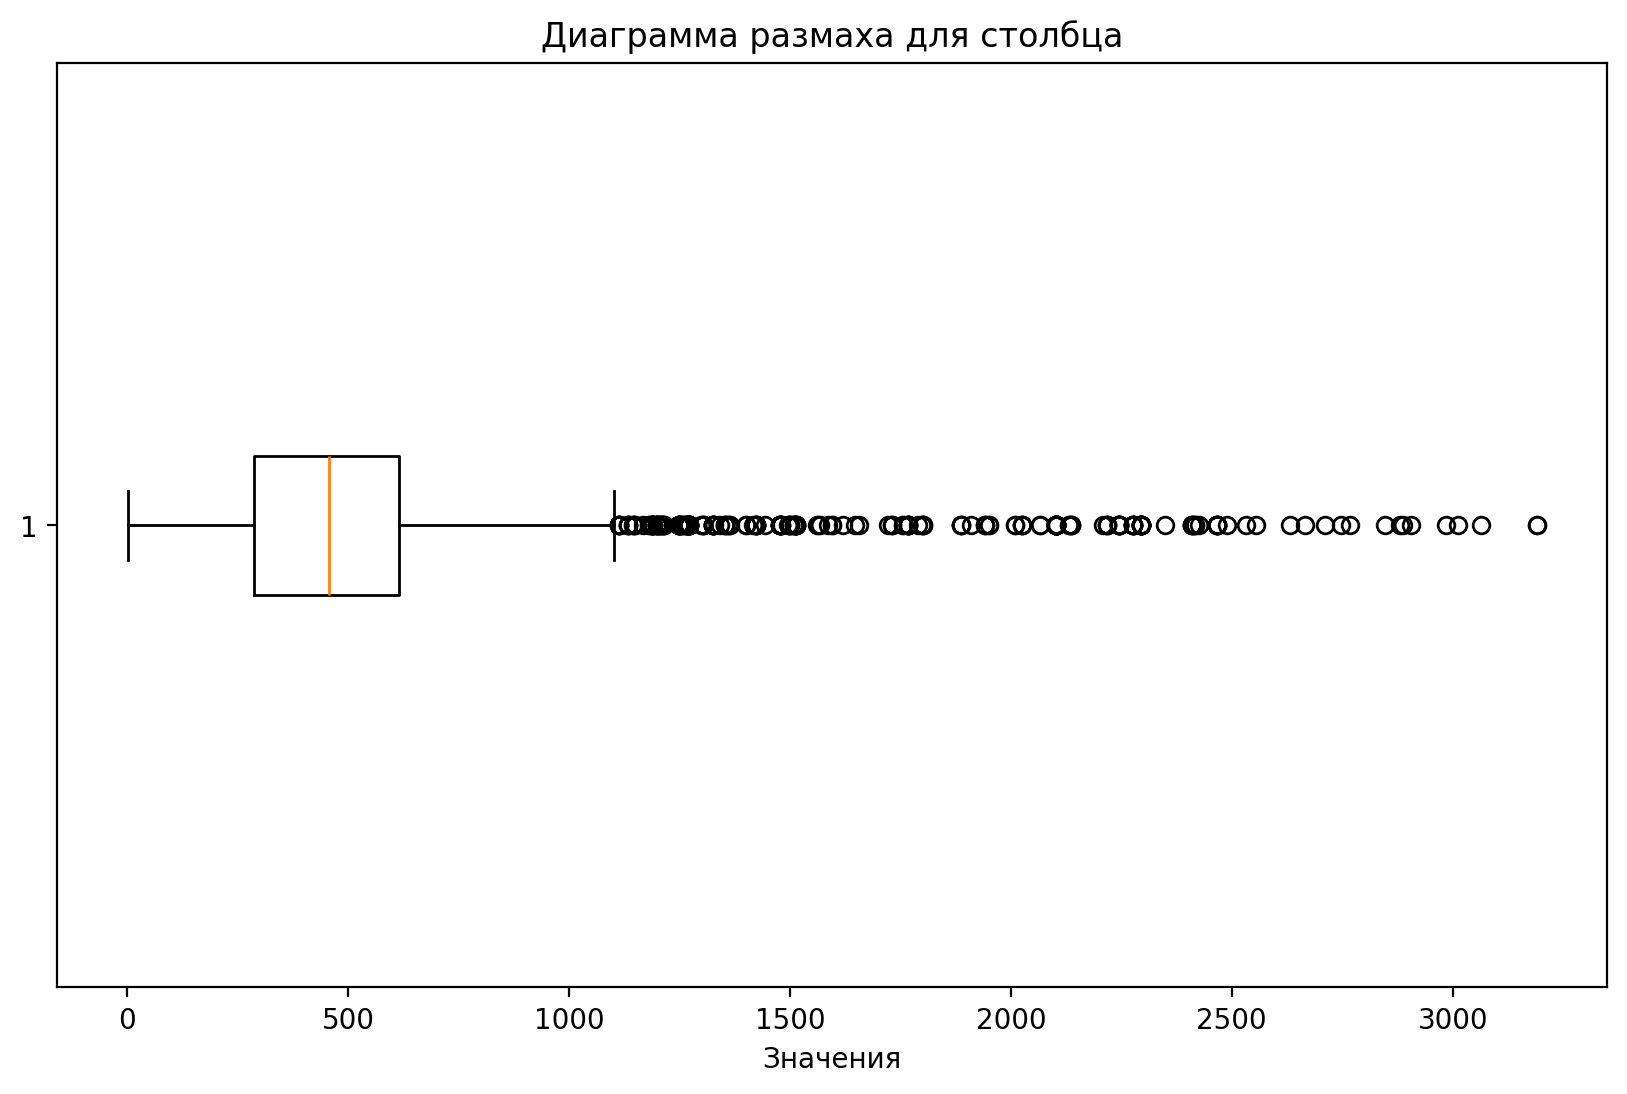

In [53]:
investigate_column(df["parks_nearest"])


* Вывод
	- Обнаруженные аномалии: большая часть данных не заполнена. Хоть наличие парка и является для многих важной характеристикой, выводы на основе этого столбца могут быть недостоверными. 
	- Причины, по которым они могли возникнуть: некорректное заполнение. Возможно заполнение этой опции появилось позже чем было выставлено значительное количество объявлений.
	- Как исправлять: исключать пропуски нельзя, оставим без изменений
	- Финальный тип и почему: оставим ```float```


####  Обработка "ponds_around3000"


* Изучим значения


Кол-во Null и Na значений: 5186
Кол-во уникальных значений: 4
Data type: float64
count   17,416.00
mean         0.76
std          0.93
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: ponds_around_3000, dtype: float64
Частота уникальных значений столбца:
 ponds_around_3000
0.00    8788
1.00    5457
2.00    1788
3.00    1383
Name: count, dtype: int64
Minimum : 0.0
Maximum : 3.0
Quantiles:
 0.25   0.00
0.50   0.00
0.75   1.00
Name: ponds_around_3000, dtype: float64


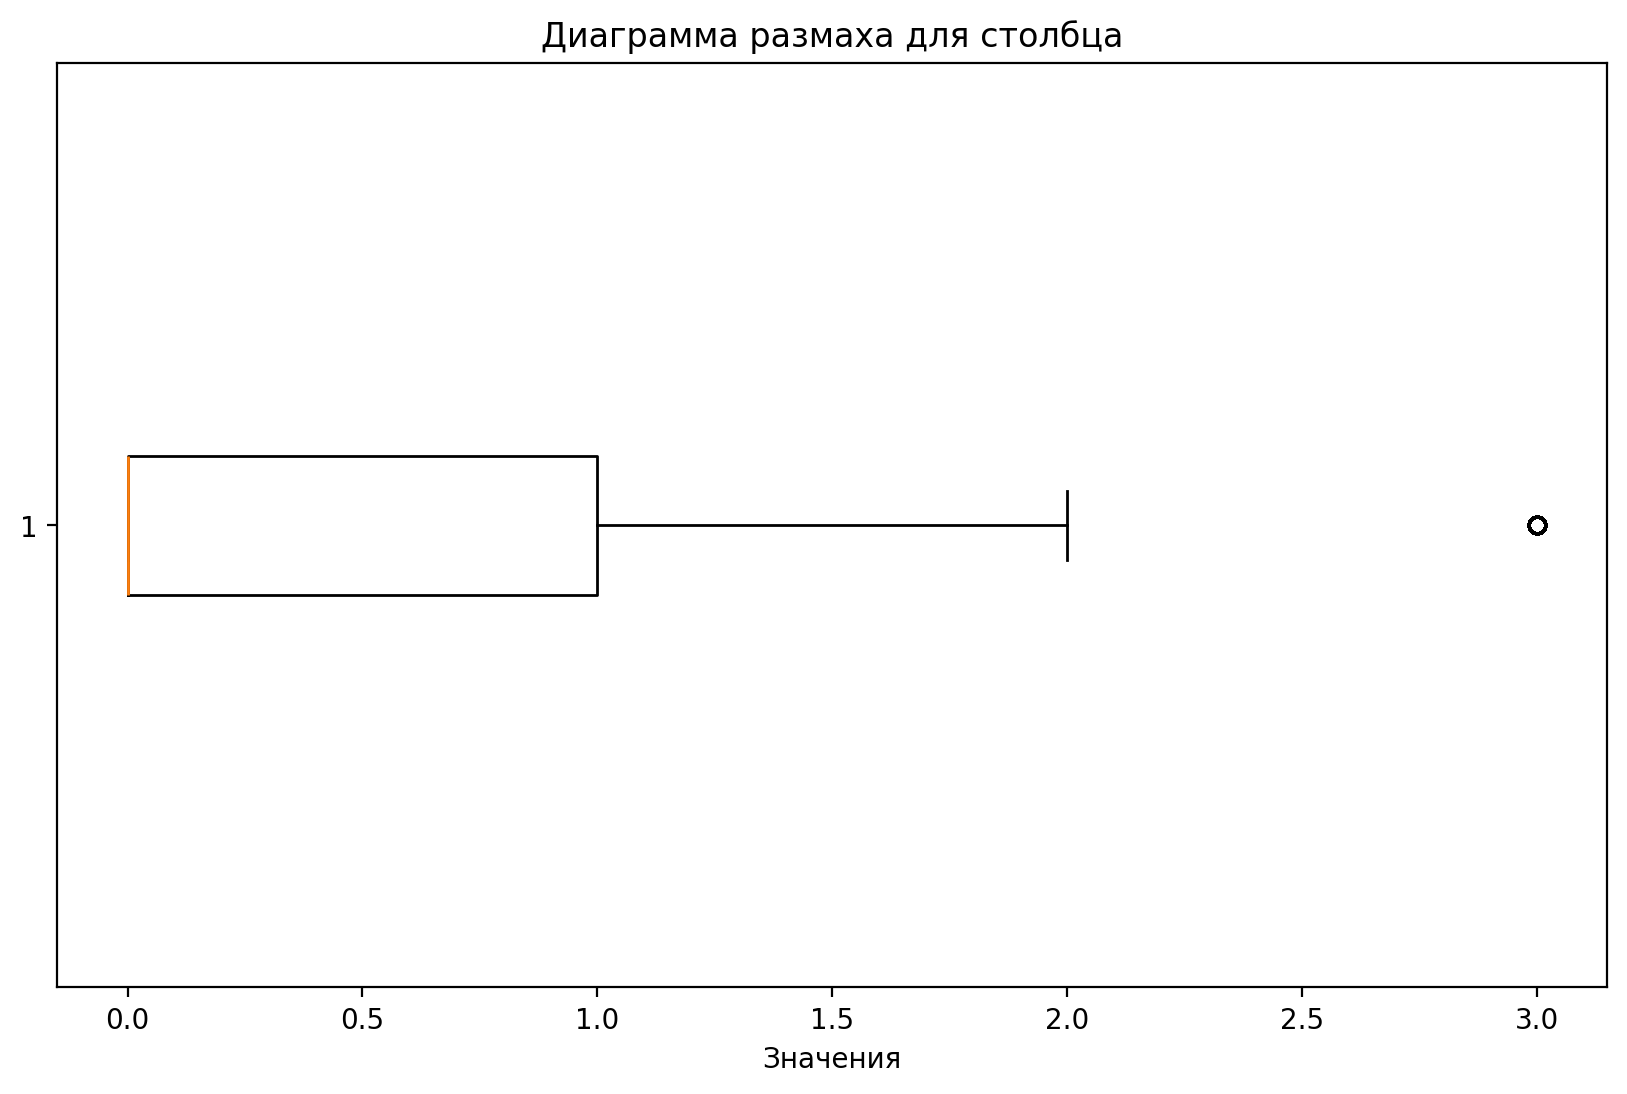

In [54]:
investigate_column(df["ponds_around_3000"])


* Вывод
	- Обнаруженные аномалии: большая часть данных не заполнена. Хотя наличие парка и является для многих важной характеристикой, выводы на основе этого столбца могут быть недостоверными. 
	- Причины, по которым они могли возникнуть: некорректное заполнение. Возможно заполнение этой опции появилось позже чем было выставлено значительное количество объявлений.
	- Как исправлять: исключать пропуски нельзя, оставим без изменений
	- Финальный тип и почему: оставим ```float```



#### Обработка "ponds_nearest"



* Изучим значения


Кол-во Null и Na значений: 13974
Кол-во уникальных значений: 1088
Data type: float64
count   8,628.00
mean      520.44
std       277.22
min        13.00
25%       298.00
50%       505.00
75%       731.25
max     1,344.00
Name: ponds_nearest, dtype: float64
Частота уникальных значений столбца:
 ponds_nearest
427.00      69
454.00      41
433.00      39
153.00      37
474.00      37
            ..
1,126.00     1
742.00       1
1,051.00     1
1,021.00     1
827.00       1
Name: count, Length: 1088, dtype: int64
Minimum : 13.0
Maximum : 1344.0
Quantiles:
 0.25   298.00
0.50   505.00
0.75   731.25
Name: ponds_nearest, dtype: float64


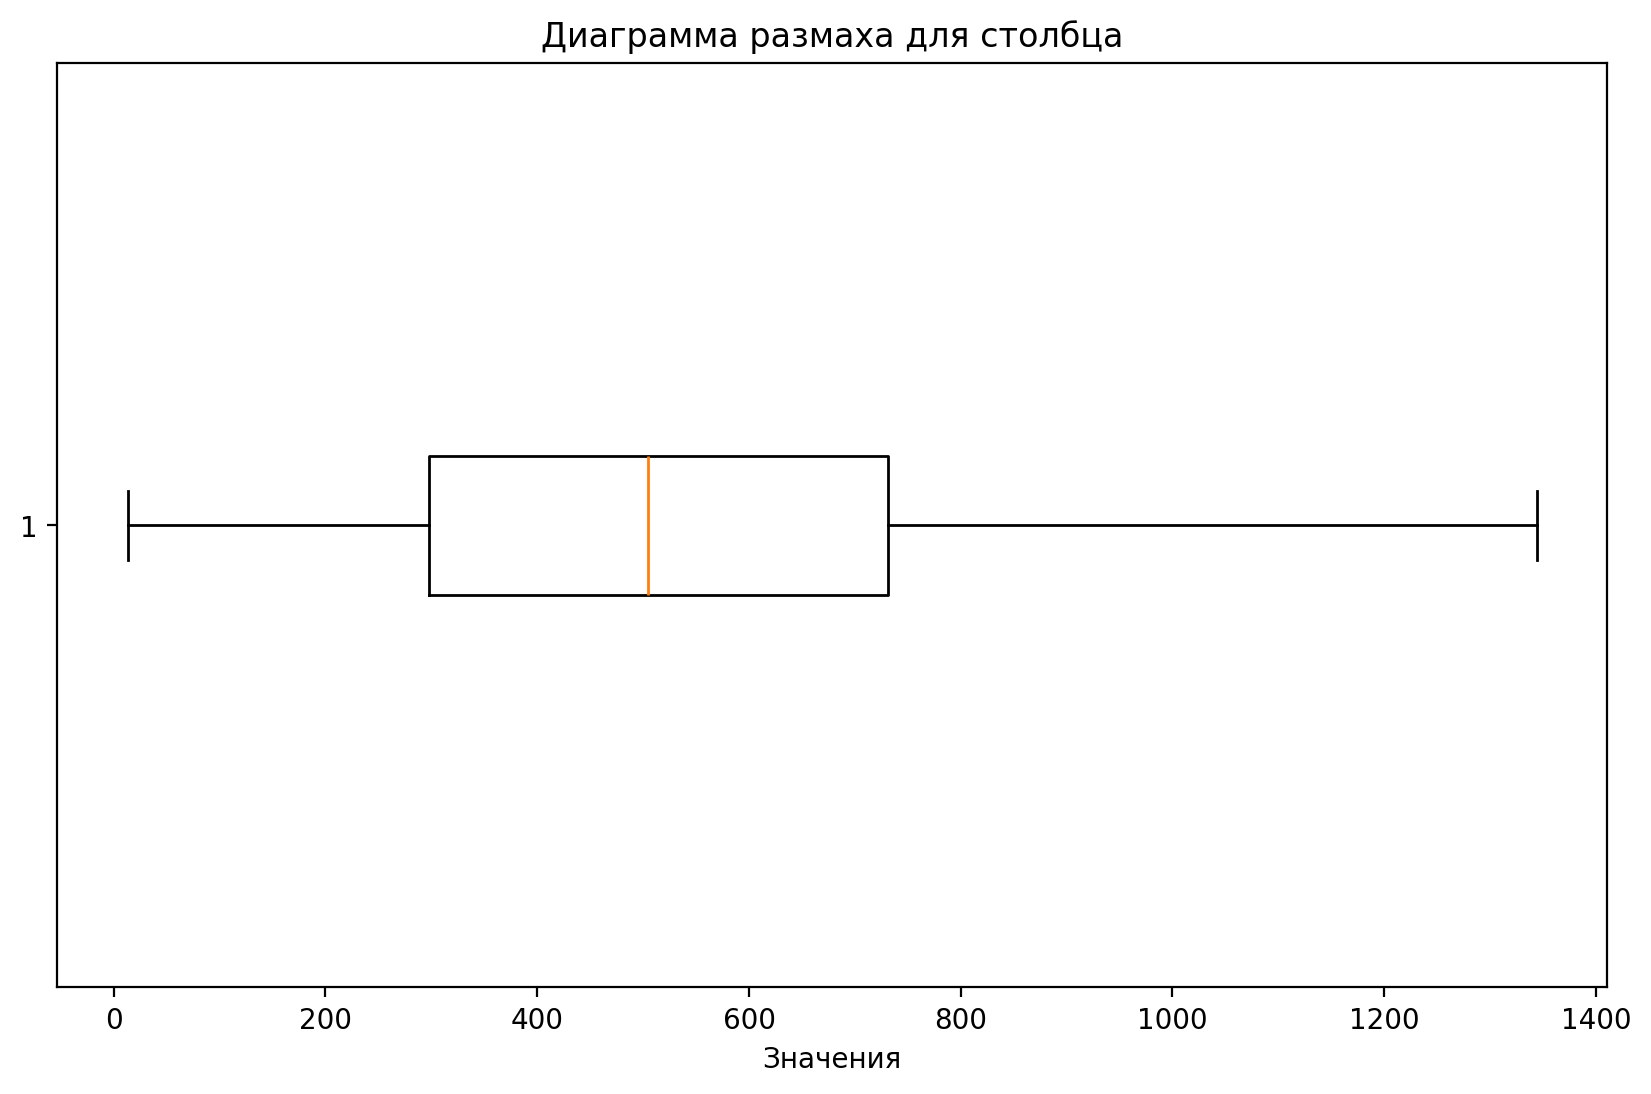

In [55]:
investigate_column(df["ponds_nearest"])


* Вывод
	- Обнаруженные аномалии: пропуски составляют большую часть датафрейма
	- Причины, по которым они могли возникнуть: скорее всего причины технические, либо эта категория в данных появилась свовсем недавно
	- Как исправлять: оставить без изменений
	- Финальный тип и почему: оставим ```float```



####  Обработка "days_exposition"



* Изучим значения


Кол-во Null и Na значений: 3013
Кол-во уникальных значений: 1119
Data type: float64
count   19,589.00
mean       179.48
std        218.26
min          1.00
25%         45.00
50%         95.00
75%        229.00
max      1,580.00
Name: days_exposition, dtype: float64
Частота уникальных значений столбца:
 days_exposition
45.00       835
60.00       531
7.00        224
30.00       203
90.00       183
           ... 
1,434.00      1
1,231.00      1
739.00        1
744.00        1
971.00        1
Name: count, Length: 1119, dtype: int64
Minimum : 1.0
Maximum : 1580.0
Quantiles:
 0.25    45.00
0.50    95.00
0.75   229.00
Name: days_exposition, dtype: float64


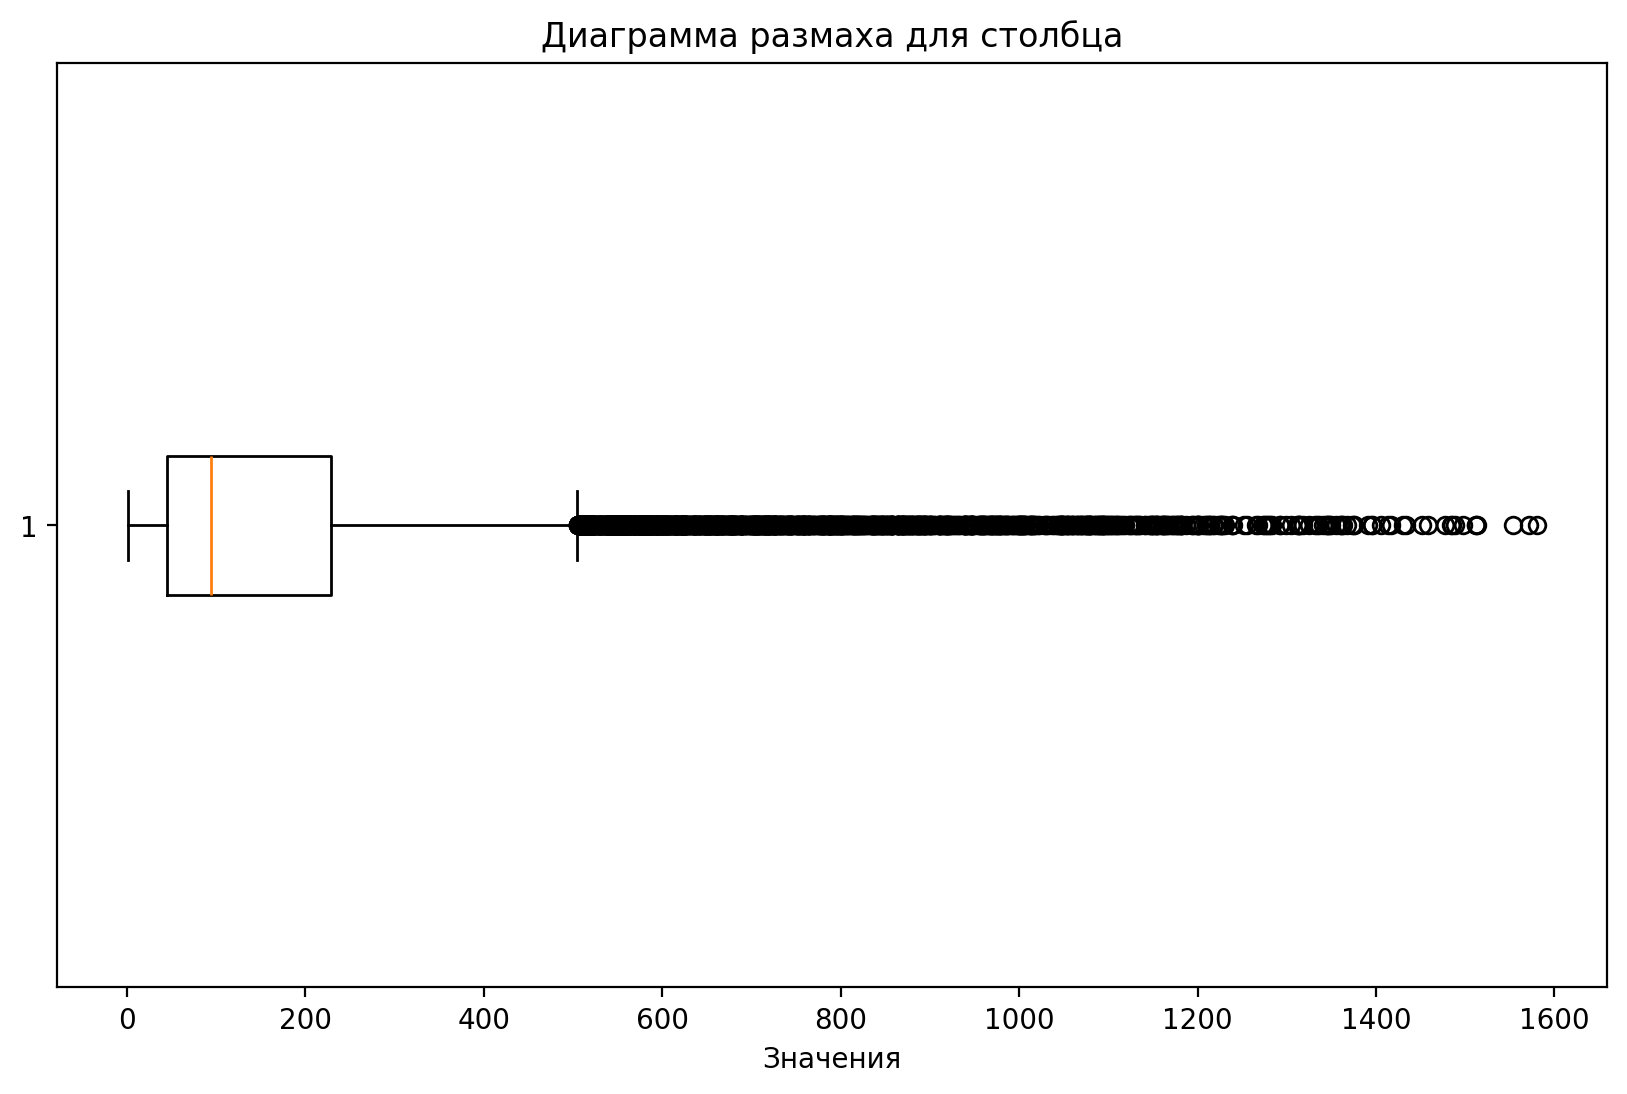

In [56]:
investigate_column(df["days_exposition"])


* Вывод
	- Обнаруженные аномалии: есть объявления с длительностью около 5 лет. 
	- Причины, по которым они могли возникнуть: скорее всего их разместили 1 раз и больше ничего с ними не делали, они либо некорректные, либо не сняты с продажи
	- Как исправлять: пропуски в этом столбце лучше не трогать. Если они нужны для ислледования - можно уточнить данные
	- Финальный тип и почему: оставим ```float``` , не можем привести к ```int``` из-за пропусков


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22602 entries, 0 to 23103
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22602 non-null  int64         
 1   last_price            22602 non-null  int32         
 2   total_area            22602 non-null  float64       
 3   first_day_exposition  22602 non-null  datetime64[ns]
 4   rooms                 22602 non-null  int64         
 5   ceiling_height        22602 non-null  float64       
 6   floors_total          22602 non-null  int32         
 7   living_area           22602 non-null  float64       
 8   floor                 22602 non-null  int32         
 9   is_apartment          22602 non-null  bool          
 10  studio                22602 non-null  bool          
 11  open_plan             22602 non-null  bool          
 12  kitchen_area          22602 non-null  float64       
 13  balcony              

**Общий вывод по предобработке:** 
- Обработаны все столбцы датафрейма, проведен анализ выбросов с помощью диаграмм размаха. В числовых столбцах *общая площадь* и *стоимость* не обнаружено пропусков - это позволит качественно ислледовать основные показатели. Пропуски в других столбцах обработаны и заполнены соответсвенно приведенными методами выше, чтобы выполнить исследование.

- типы данных приведены в соответсвие с логикой значений столба.

- в картографических данных очень большое количество пропусков. Эти пропуски оставлены без изменений. Следует обратить на это внимание и решить проблему с их получением и выгрузкой.

- много незаполненных данных в столбцах булева типа. В целом неполные данные наводят на мысль, что возможно следует изменить процесс их ввода пользователем и фильтровать значения уже на этапе получения.

- оставшиеся данные пригодны для проверки гипотез и исследования, с поправкой на картографические данные



### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу:
- цену 1 кв. м
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [58]:
df["price_per_meter"] = df["last_price"] / df["total_area"]
df["day_of_public"] = pd.DatetimeIndex(df["first_day_exposition"]).dayofweek
df["month_of_public"] = pd.DatetimeIndex(df["first_day_exposition"]).month
df["year_of_public"] = pd.DatetimeIndex(df["first_day_exposition"]).year

In [59]:
# для определения этажа создадим функцию


def floor_category(row):
    # Извлечение значений из строки
    floors_total = row.get("floors_total")
    floor = row.get("floor")

    # Проверка на корректность данных
    if floors_total is None or floor is None:
        return "некорректные данные"

    # определениe категории и этажа
    if floor == 1:
        return "первый"
    elif floor == floors_total:
        return "последний"
    elif 1 < floor < floors_total:
        return "другой"
    else:
        return "неизвестный этаж"  # На случай, если floor 0 или отрицательный


df["floor_type"] = df.apply(floor_category, axis=1)

In [60]:
# расстояние до центра посчитаем, округлив до целого значения
df["city_center_km"] = (df["city_centers_nearest"] / 1000).round()
df.head(2)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000      108.00           2019-03-07      3   
1             7     3350000       40.40           2018-12-04      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16        51.00      8         False  ...   
1            2.65            11        18.60      1         False  ...   

   ponds_around_3000  ponds_nearest  days_exposition  area_category  \
0               2.00         755.00              NaN          50-70   
1               0.00            NaN            81.00          10-30   

  price_per_meter  day_of_public  month_of_public  year_of_public  floor_type  \
0      120,370.37              3                3            2019      другой   
1       82,920.79              1               12            2018      первый   

   city_center_km  
0           16.00  
1           19.00  

[2 rows x 29 columns]

###  Исследовательский анализ данных

#### Изучим  общую площадь

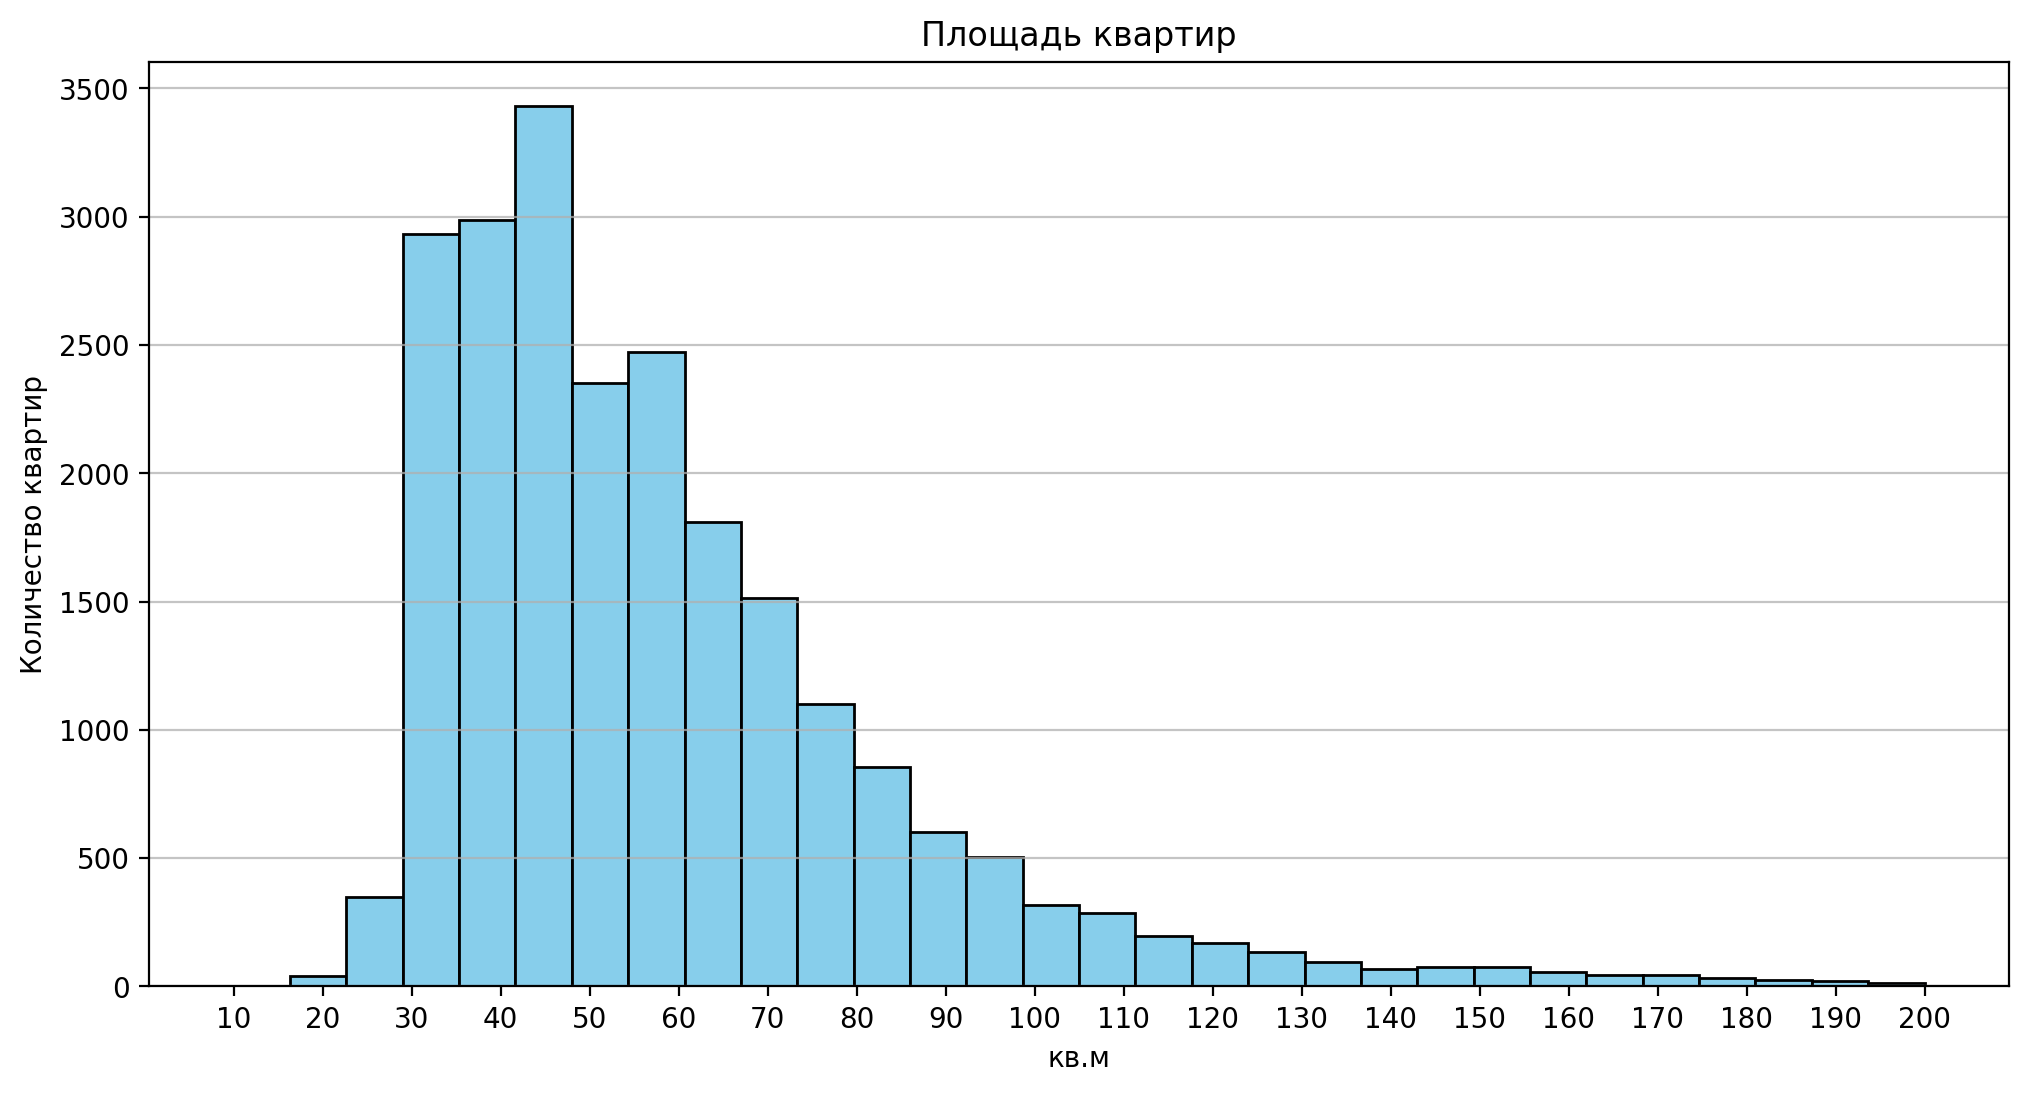

count   22,602.00
mean        58.41
std         26.07
min         20.10
25%         40.00
50%         52.00
75%         69.20
max        199.20
Name: total_area, dtype: float64

In [61]:
# Построим гистрограмму

plt.figure(figsize=(12, 6))
plt.hist(df["total_area"], bins=30, range=(10, 200), color="skyblue", edgecolor="black")
plt.title("Площадь квартир")
plt.xlabel("кв.м")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
plt.xticks(range(10, 201, 10))
plt.show()
df["total_area"].describe()

По графику общей площади можем сделать вывод что основная масса квартир в продаже - от 30 до 50 м. Это отражает рынок последних годов, стоимость жилья дорожает и застройщики предлагают квартиры с все меньшим метражом - они чаще появляются на рынке и формируют его

#### Изучим жилую площадь

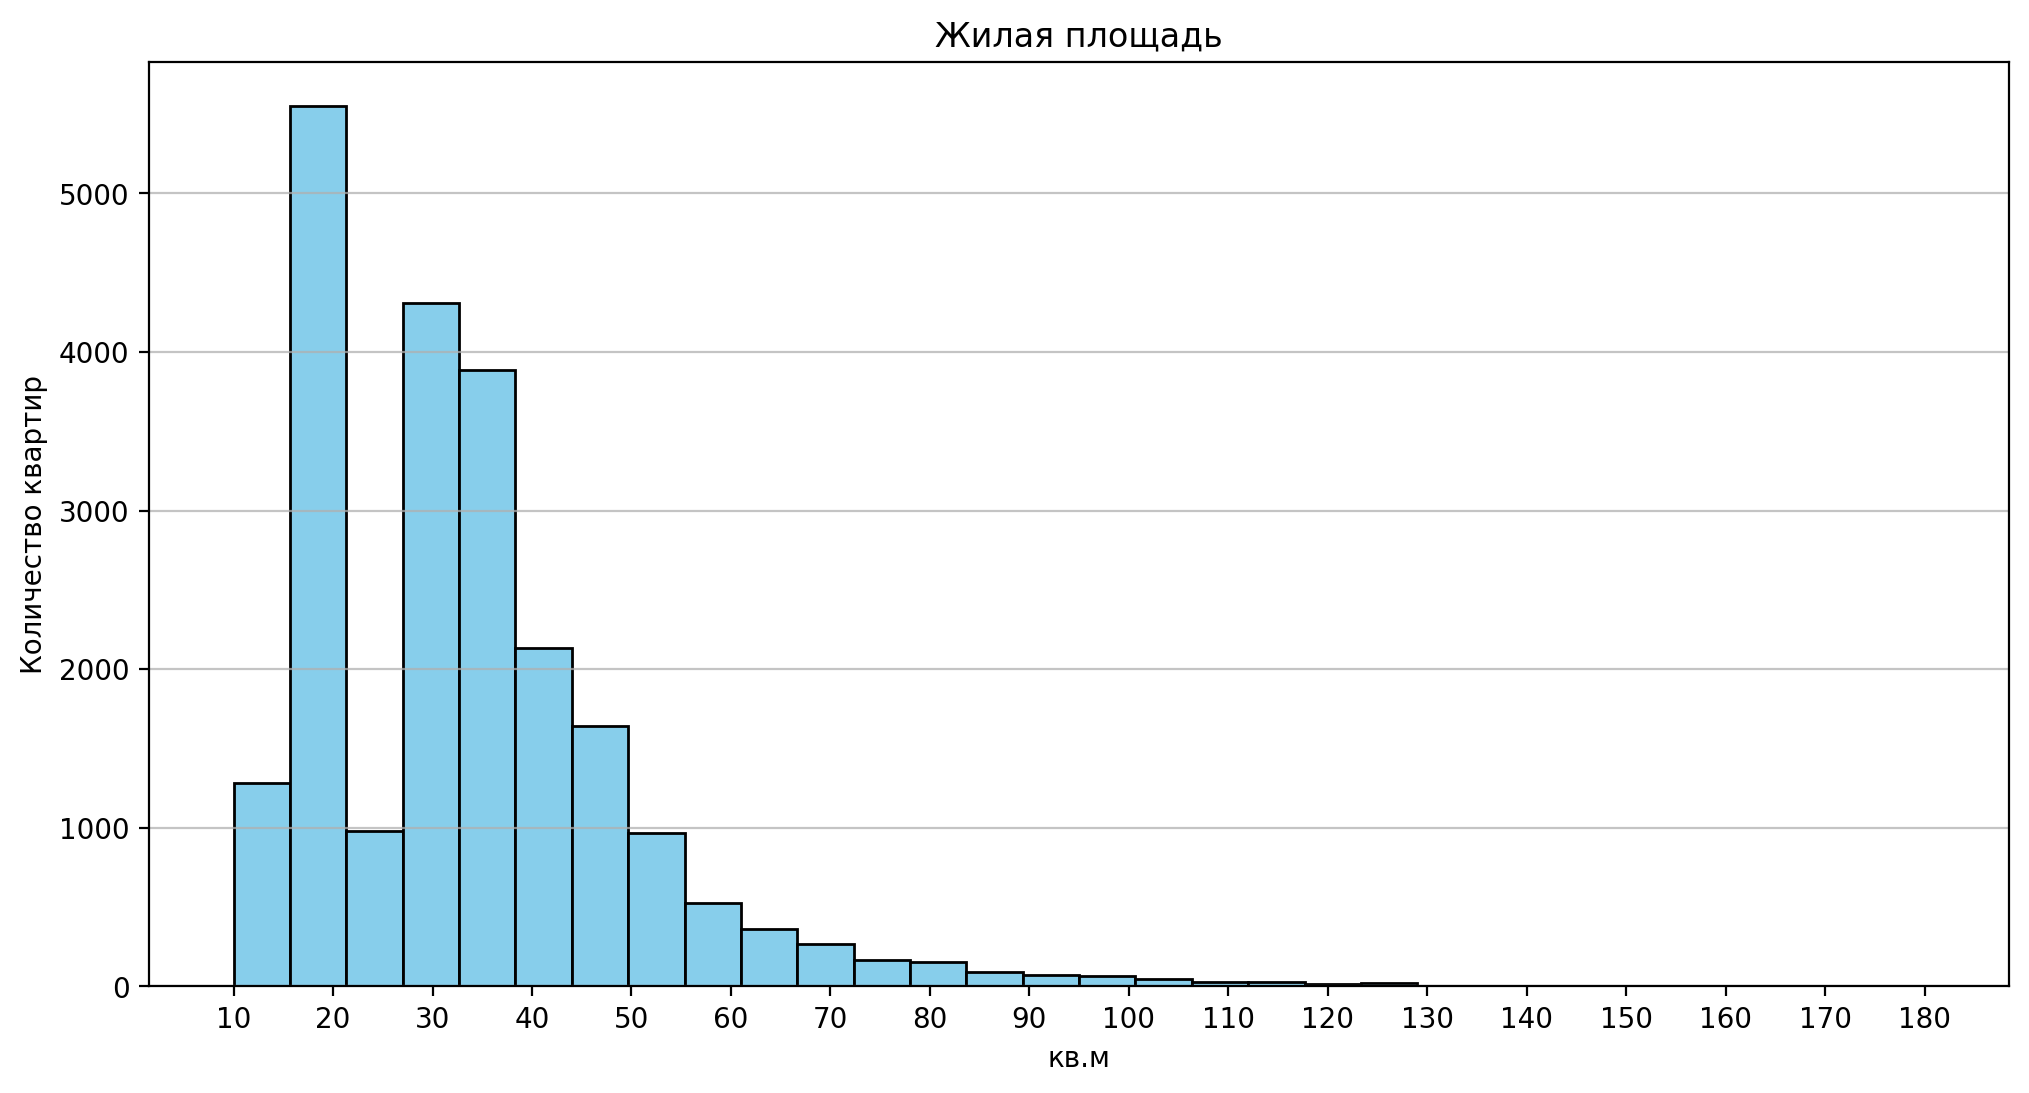

count   22,602.00
mean        33.35
std         16.54
min         10.08
25%         19.00
50%         31.00
75%         41.00
max        164.70
Name: living_area, dtype: float64

In [62]:
# Построим гистрограмму

plt.figure(figsize=(12, 6))
plt.hist(
    df["living_area"], bins=30, range=(10, 180), color="skyblue", edgecolor="black"
)
plt.title("Жилая площадь")
plt.xlabel("кв.м")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
plt.xticks(range(10, 181, 10))

plt.show()
df["living_area"].describe()

Жилая площадь большинства квартир соотвествует параметрам 1 или 2-х комнатной квартиры, зависит от планировки и типа.

#### Изучим площадь кухни

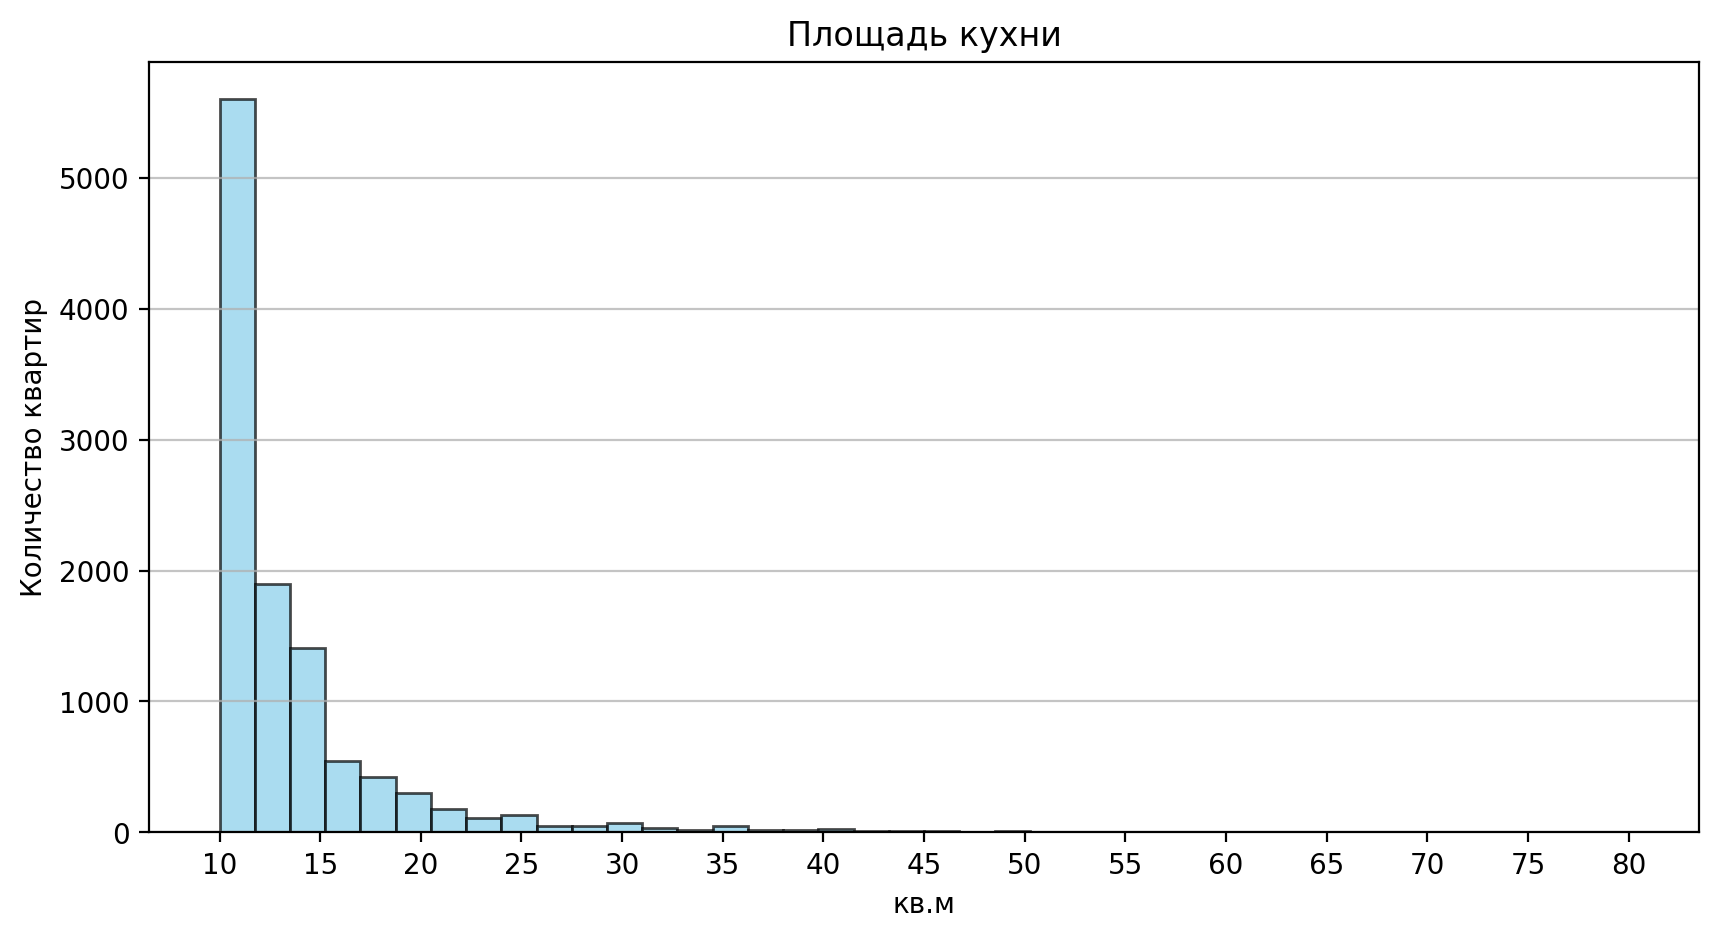

count   22,602.00
mean        10.44
std          4.92
min          5.04
25%          7.50
50%          9.60
75%         11.50
max         75.00
Name: kitchen_area, dtype: float64

In [63]:
# Построим гистрограмму

plt.figure(figsize=(10, 5))
plt.hist(
    df["kitchen_area"],
    bins=40,
    range=(10, 80),
    color="skyblue",
    edgecolor="black",
    alpha=0.7,
)
plt.title("Площадь кухни")
plt.xlabel("кв.м")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
plt.xticks(range(10, 81, 5))

plt.show()
df["kitchen_area"].describe()

Площадь кухни в абсолютном большинстве стремится к среднему показателю 10 кв.м. Он же совпадает с медианным

#### Изучим цену объекта недвижимости

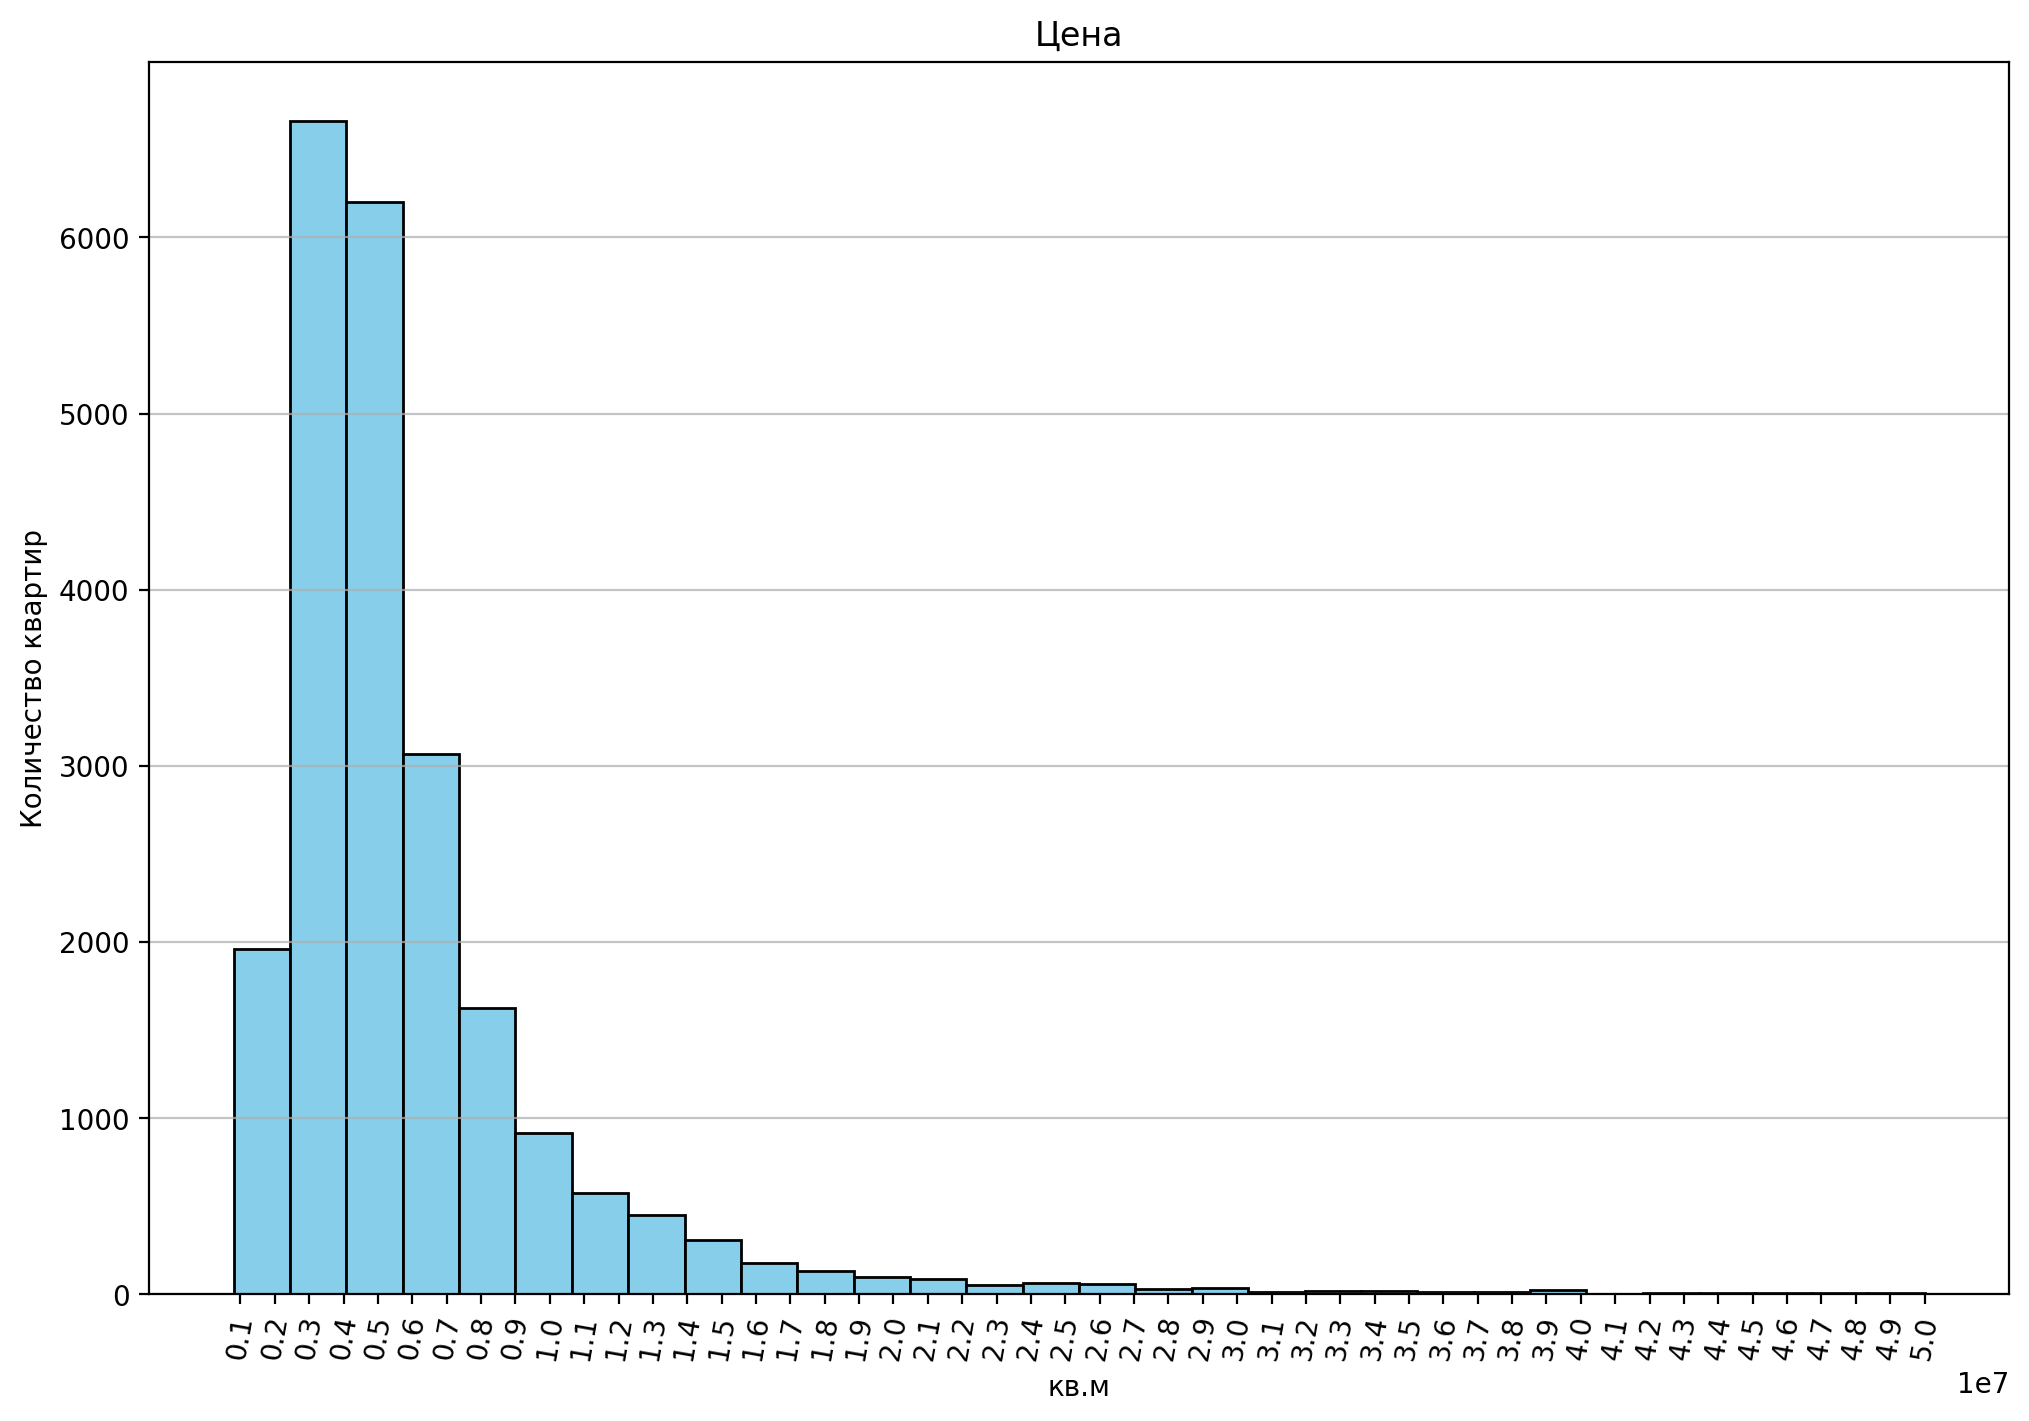

count       22,602.00
mean     5,933,700.57
std      4,593,927.70
min        820,000.00
25%      3,490,000.00
50%      4,650,000.00
75%      6,700,000.00
max     49,900,000.00
Name: last_price, dtype: float64

In [64]:
# Построим гистрограмму

plt.figure(figsize=(12, 8))
plt.hist(
    df["last_price"],
    bins=30,
    range=(800000, 50000000),
    color="skyblue",
    edgecolor="black",
)
plt.title("Цена")
plt.xlabel("кв.м")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
xticks = range(1000000, 50000001, 1000000)
plt.xticks(xticks, rotation=80)
plt.show()
df["last_price"].describe()

Основной рынок составоляют квартиры стоимостью от 3 до 6 млн. Есть значительная доля порядка 10% предложений до 2 млн. и сравнительно небольшая часть дорогой недвижимости в разных ценовых диапазонах.

#### Изучим количество комнат

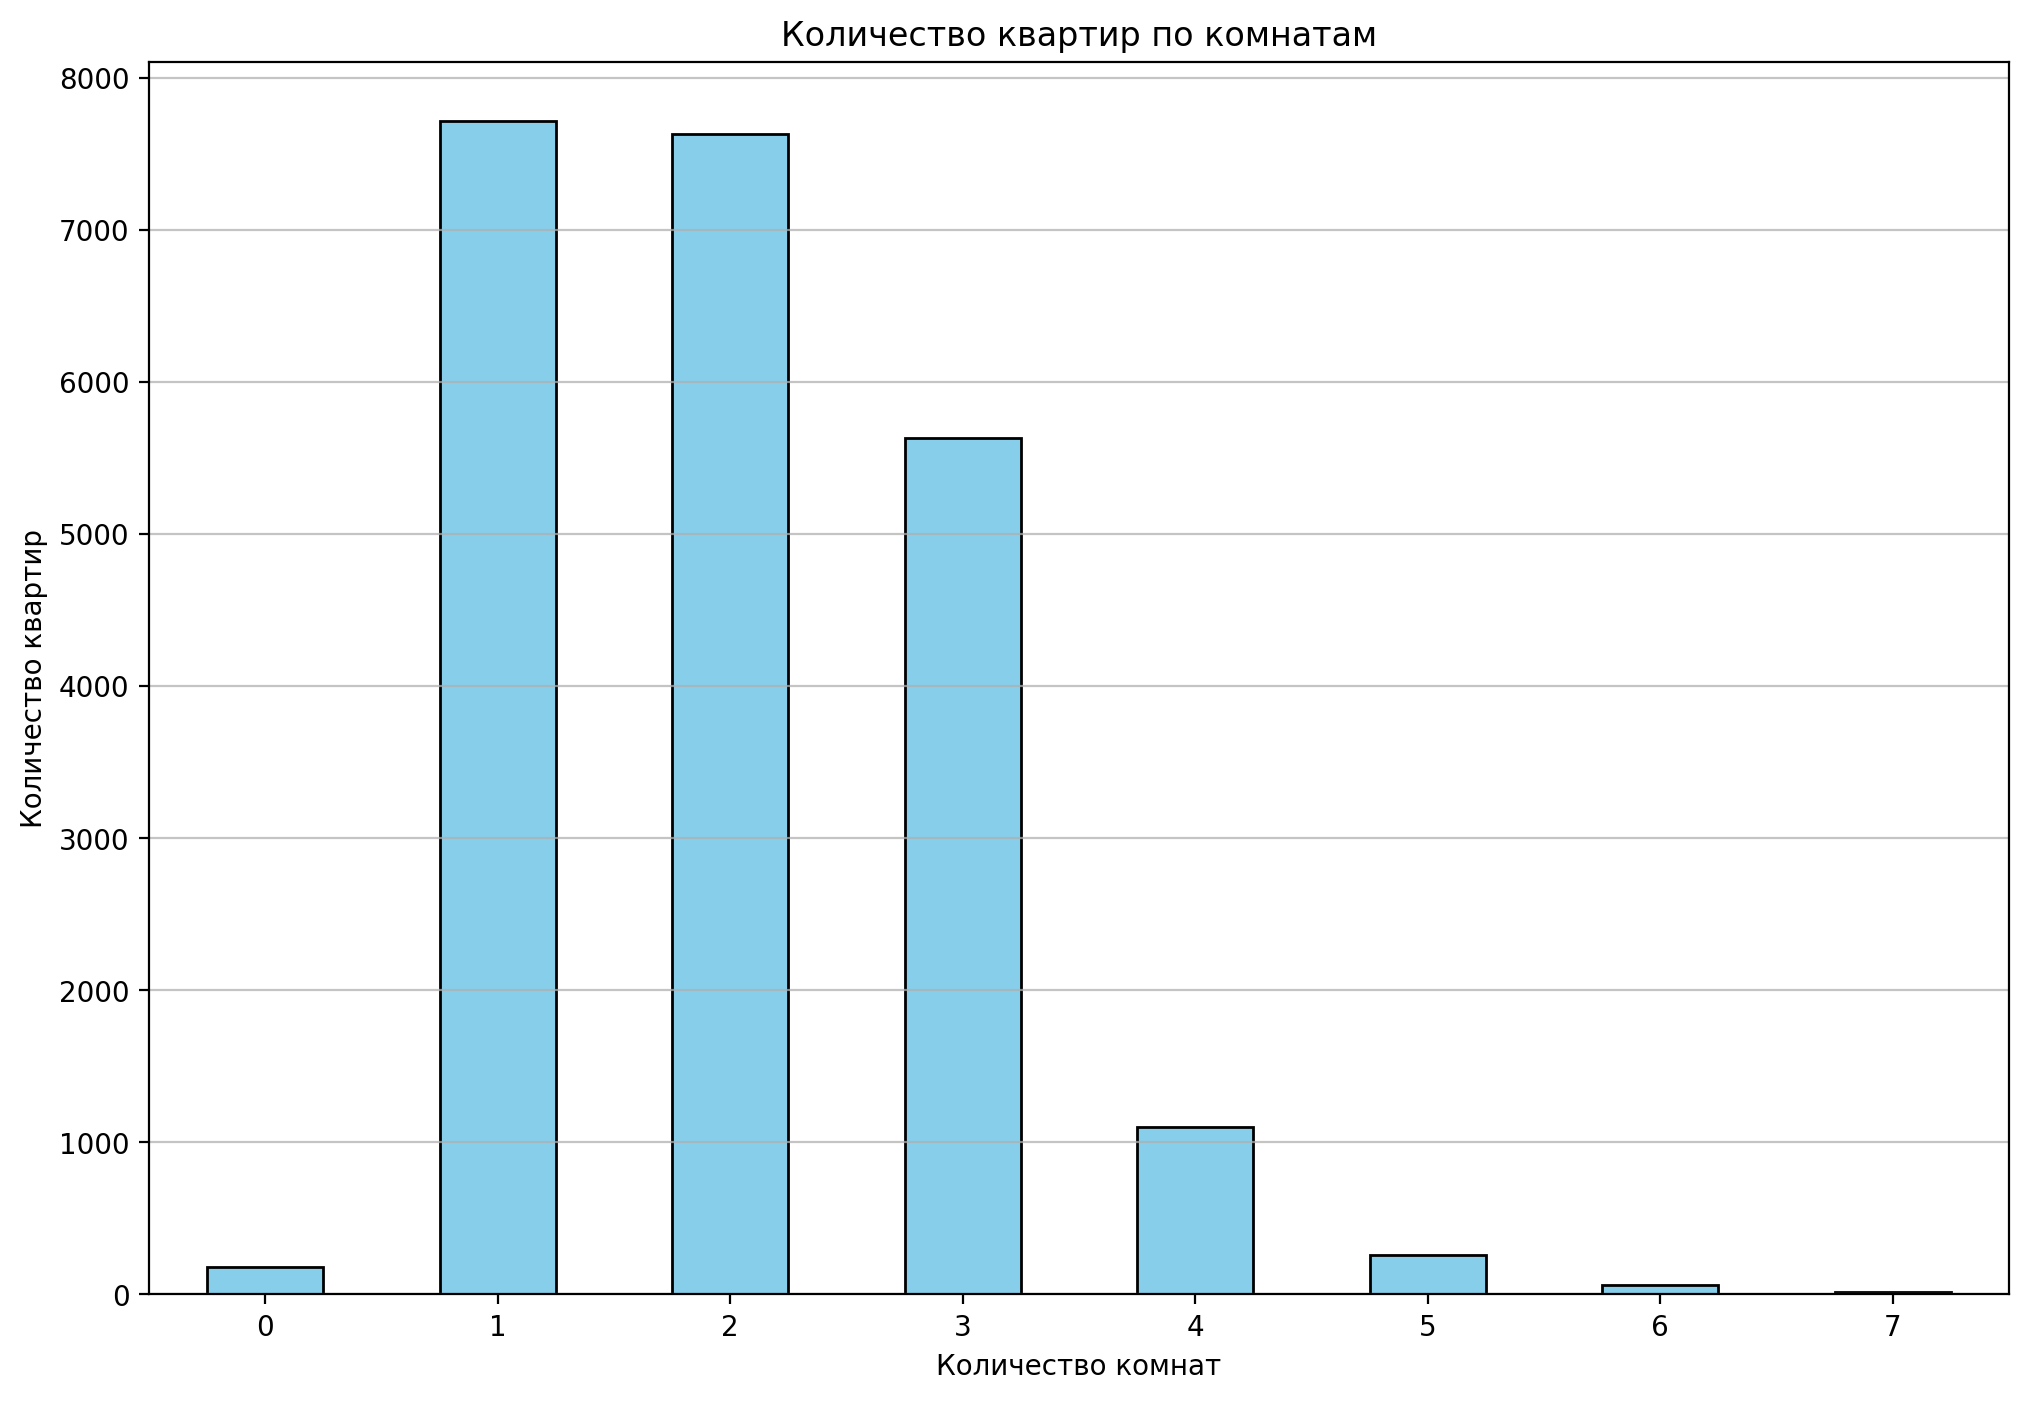

count   22,602.00
mean         2.04
std          0.99
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64

In [65]:
# получим series столбца , где индексом являются значения кол-во комнат
room_counts = df["rooms"].value_counts().sort_index()
# построим столбчатую диаграмму
plt.figure(figsize=(12, 8))
room_counts.plot(kind="bar", color="skyblue", edgecolor="black", cmap="Pastel2")
plt.title("Количество квартир по комнатам")
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.75)
plt.show()
df["rooms"].describe()

Количество комнат в ожидаемом диапазоне и соотвествует распределению по общей площади. Там где количество комнат указано как 0 - могут быть данные для квартир студий и свободной планировки, также апартаменты. Я решил оставить это значение, не менять на 1

#### Изучим высоту потолков

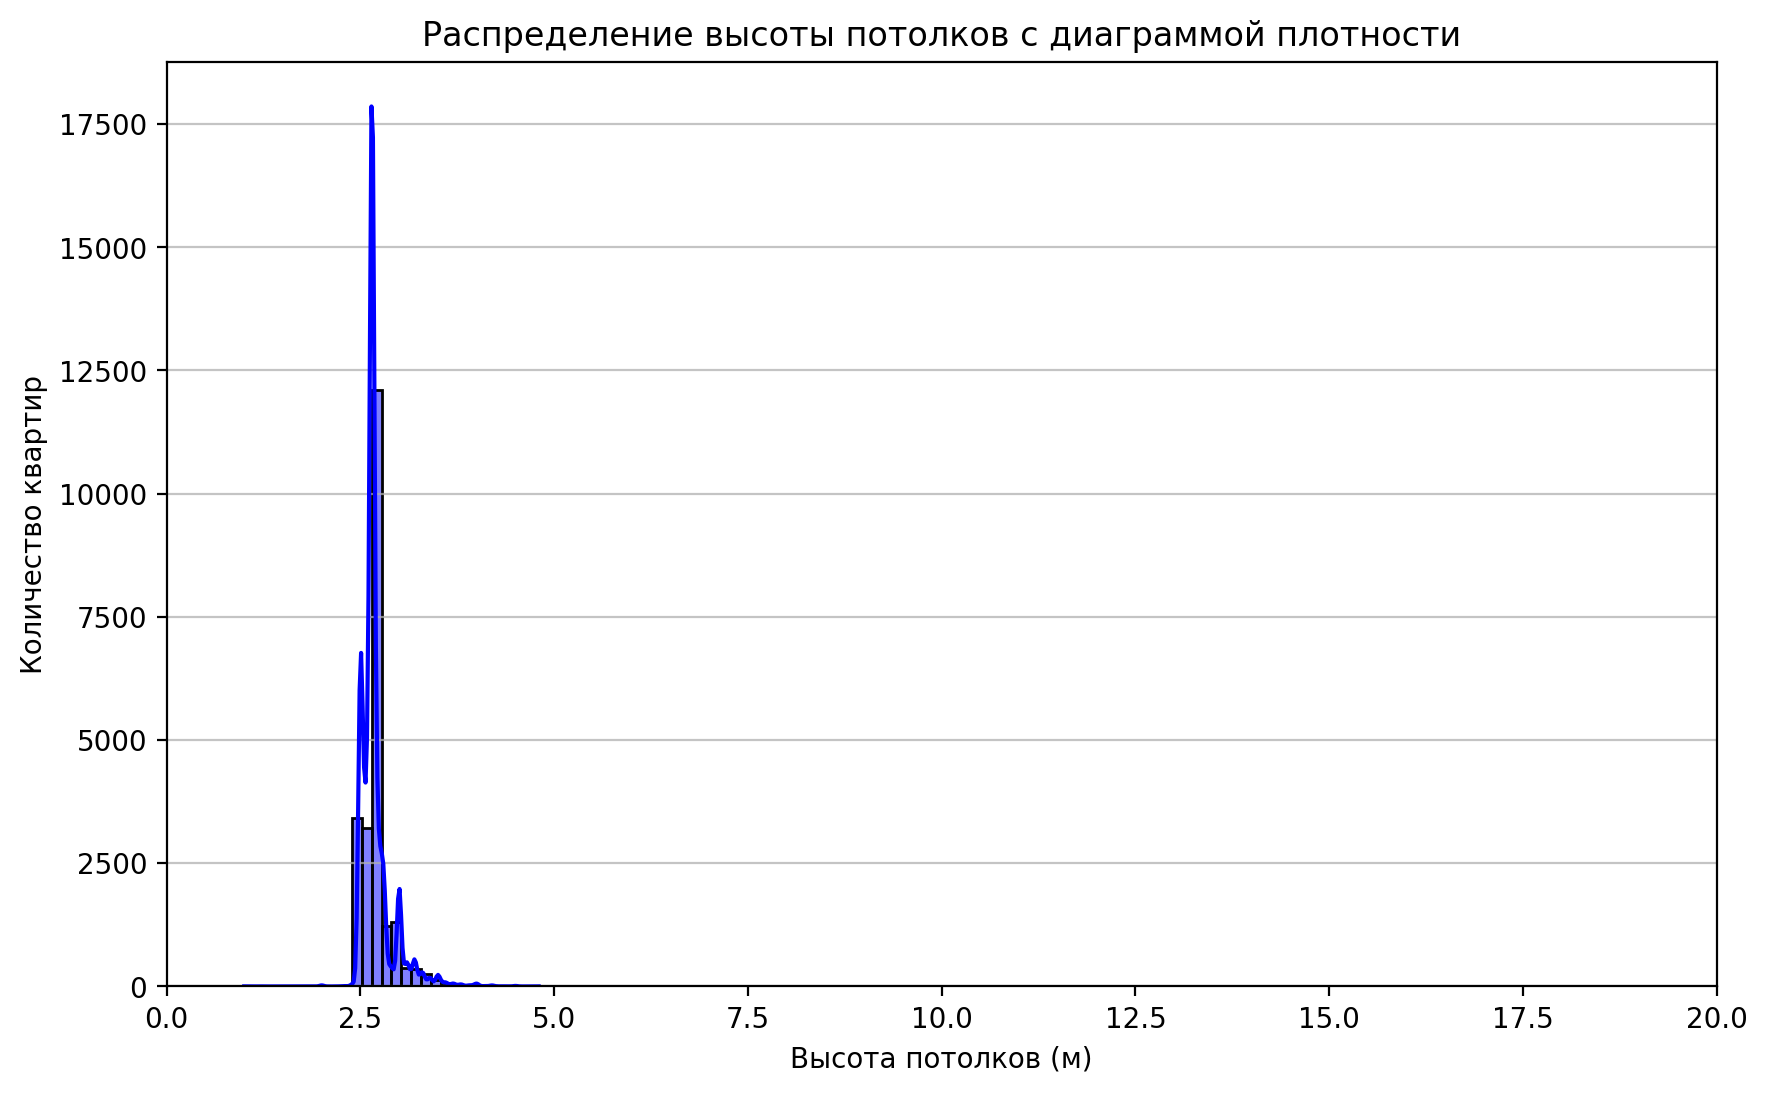

count   22,602.00
mean         2.69
std          0.21
min          1.00
25%          2.60
50%          2.65
75%          2.70
max          4.80
Name: ceiling_height, dtype: float64

In [66]:
# Построим комбинированный график распределения высоты потолков
plt.figure(figsize=(10, 6))
sns.histplot(df["ceiling_height"], bins=30, kde=True, color="blue", edgecolor="black")
plt.xlim(0, 20)
plt.title("Распределение высоты потолков с диаграммой плотности")
plt.xlabel("Высота потолков (м)")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
plt.show()
df["ceiling_height"].describe()

Высота потолков стремится к медианному значению 2,65 м. Среднее немного выше из-за выбросов в большую сторону - скорее всего из-за дорогих квартир и нестандартных планировок. Ошибочные данные в виде эстремально низких значений мы оставим, это ошибка ввода и как мы видим не влияет на исследование. Также можно эти данные исключить или заменить на медианное значение.




#### Изучим значения этажа, общей этажности и  тип этажа квартиры («первый», «последний», «другой»)

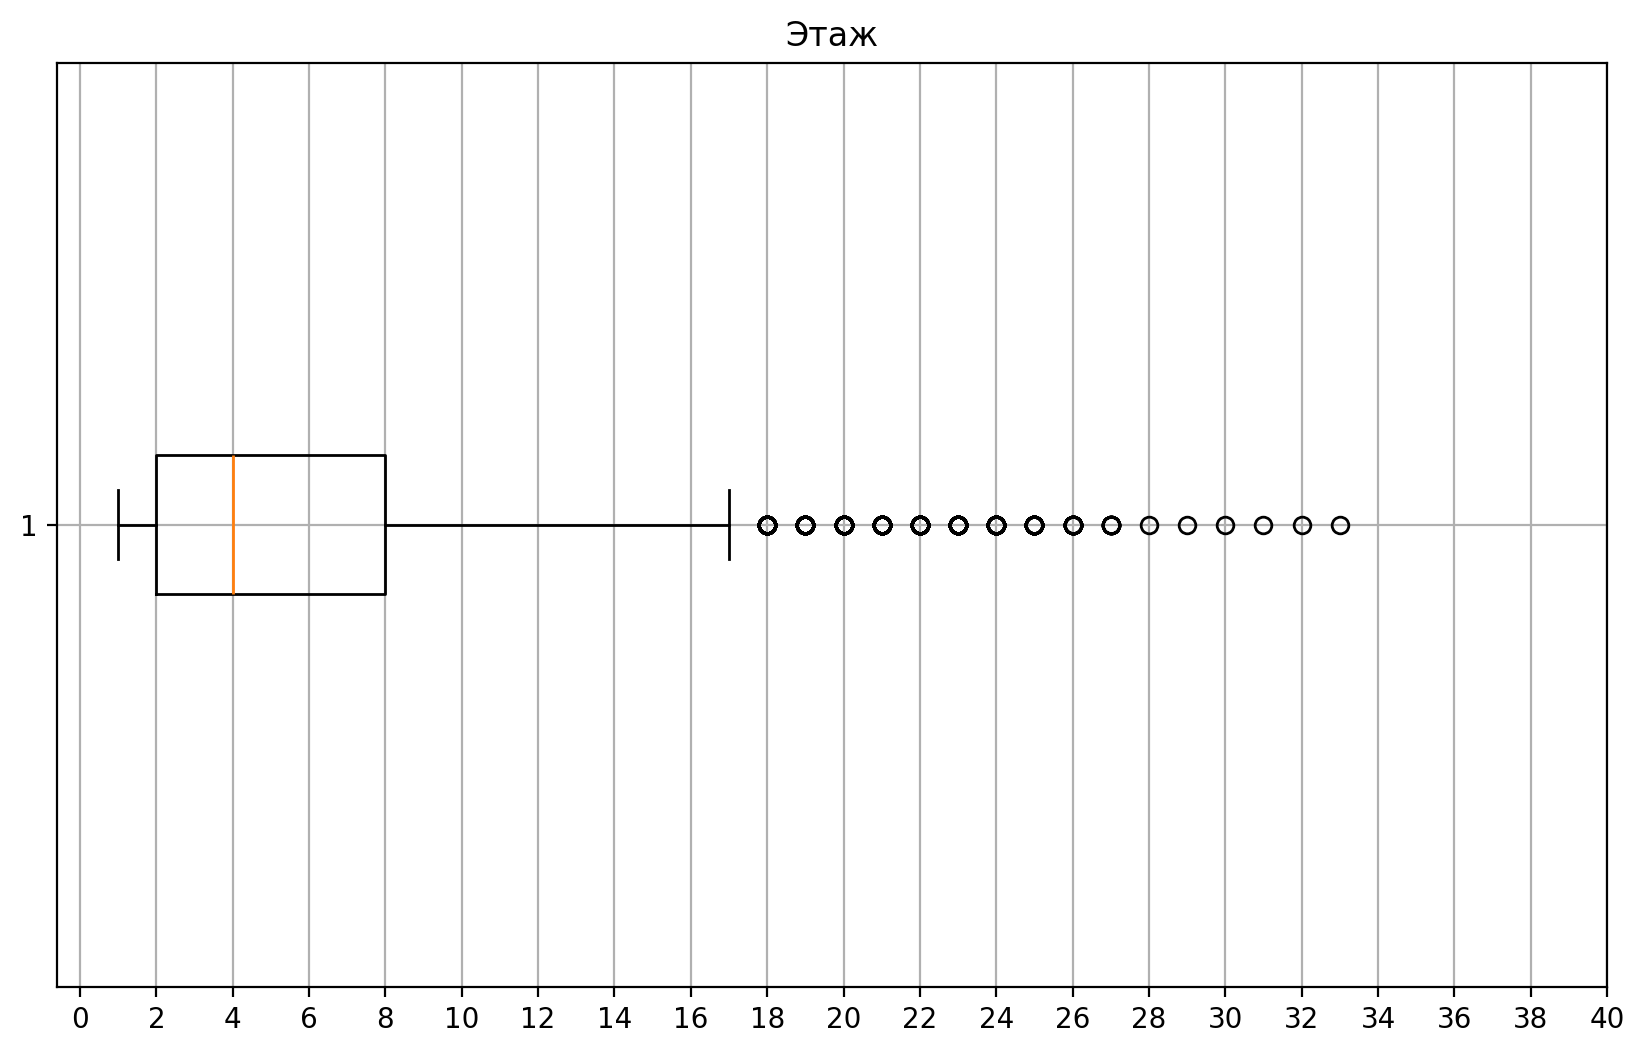

count   22,602.00
mean         5.95
std          4.90
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

In [67]:
# распределение этажей увидим по диаграмме размажа
plt.figure(figsize=(10, 6))
plt.boxplot(
    df["floor"], vert=False
)  # Устанавливаем vert=False для горизонтального boxplot
plt.title("Этаж")
plt.xticks(range(0, 41, 2))
plt.grid(True)
plt.show()
df["floor"].describe()

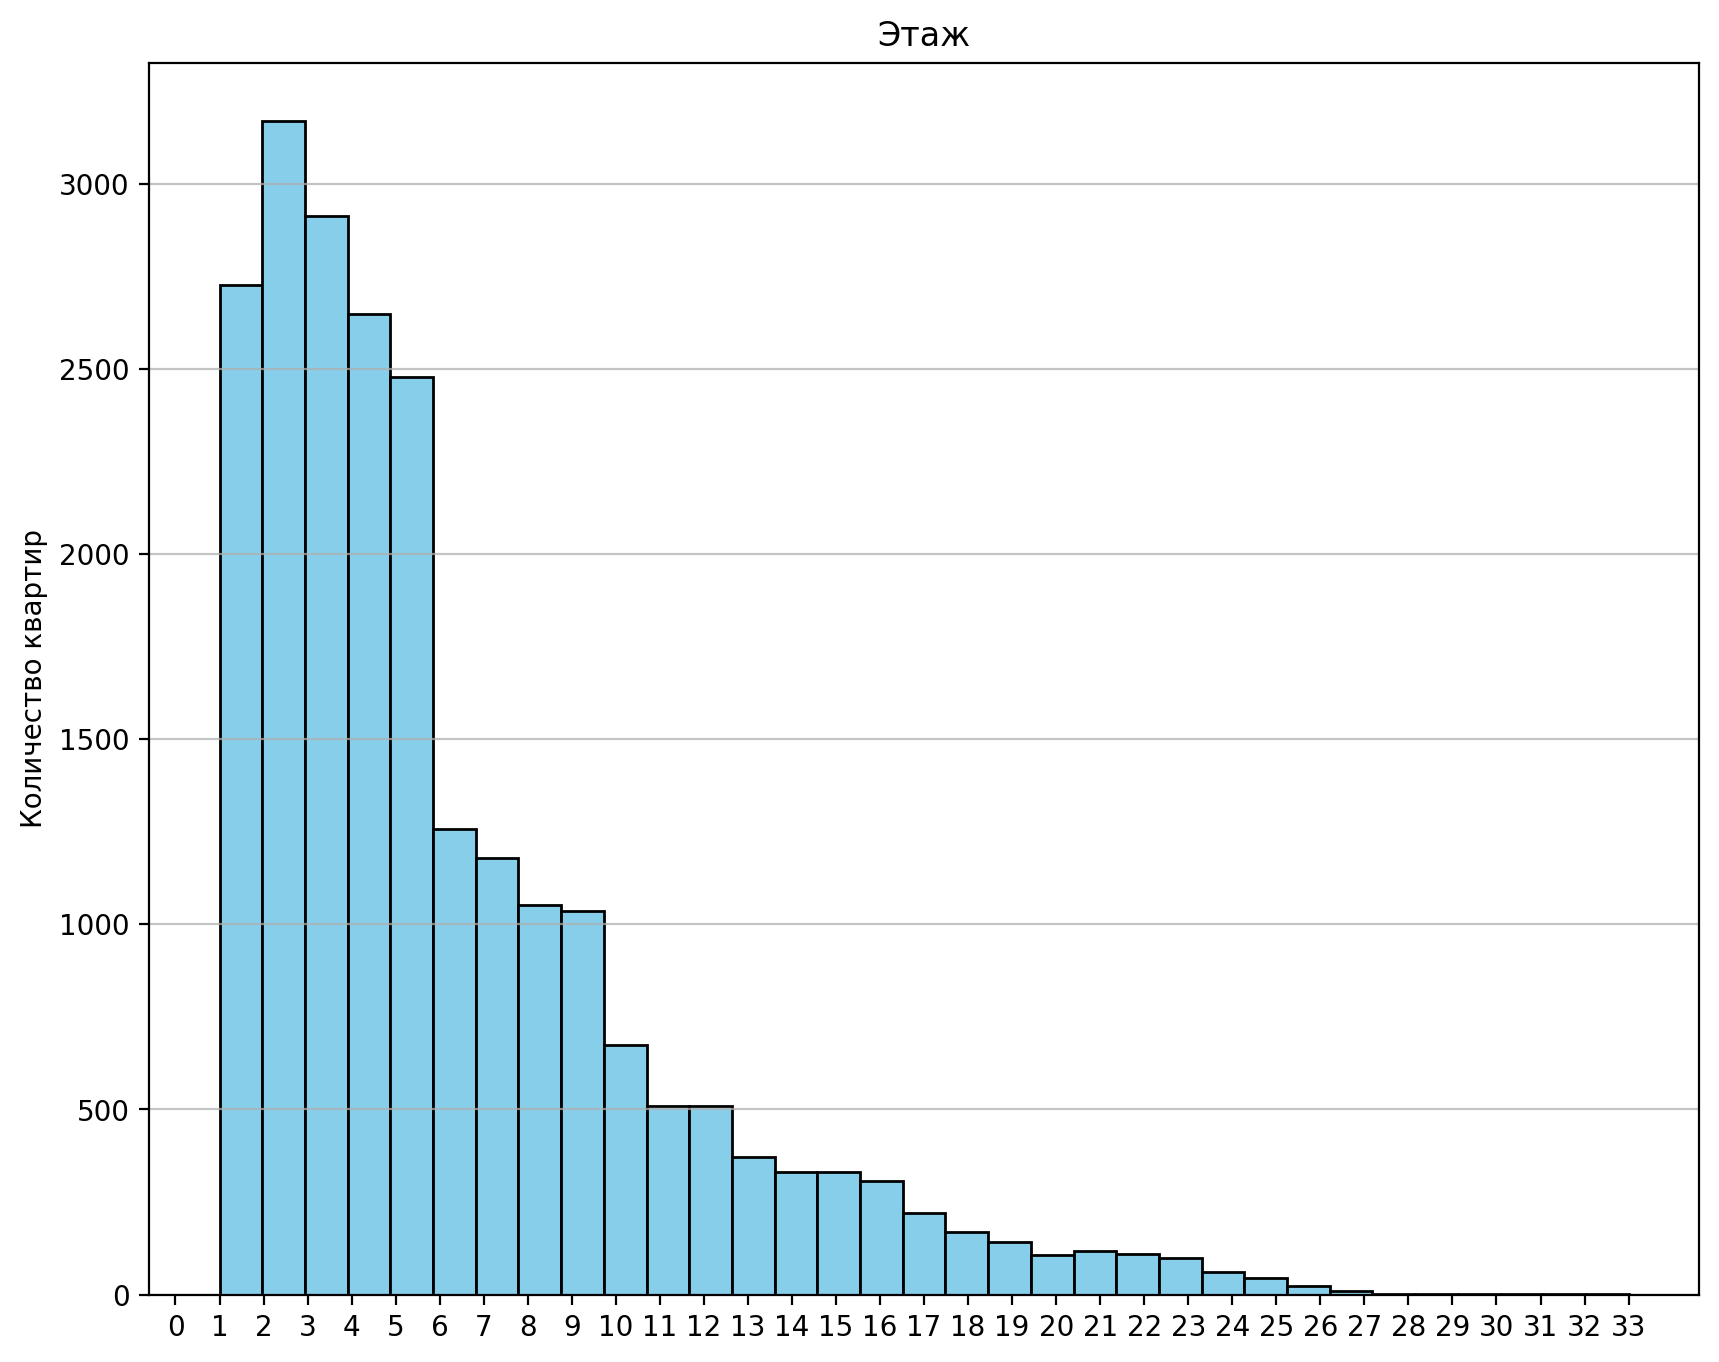

In [68]:
# Построим гистрограмму

plt.figure(figsize=(10, 8))
plt.hist(
    df["floor"],
    bins=33,
    color="skyblue",
    edgecolor="black",
)
plt.title("Этаж")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
plt.xticks(range(0, 34, 1))
plt.show()

Большинство квартир попадает в диапазон 2-9 этажей, а наибольшее предложение -квартиры на 2 и 3 этаже.

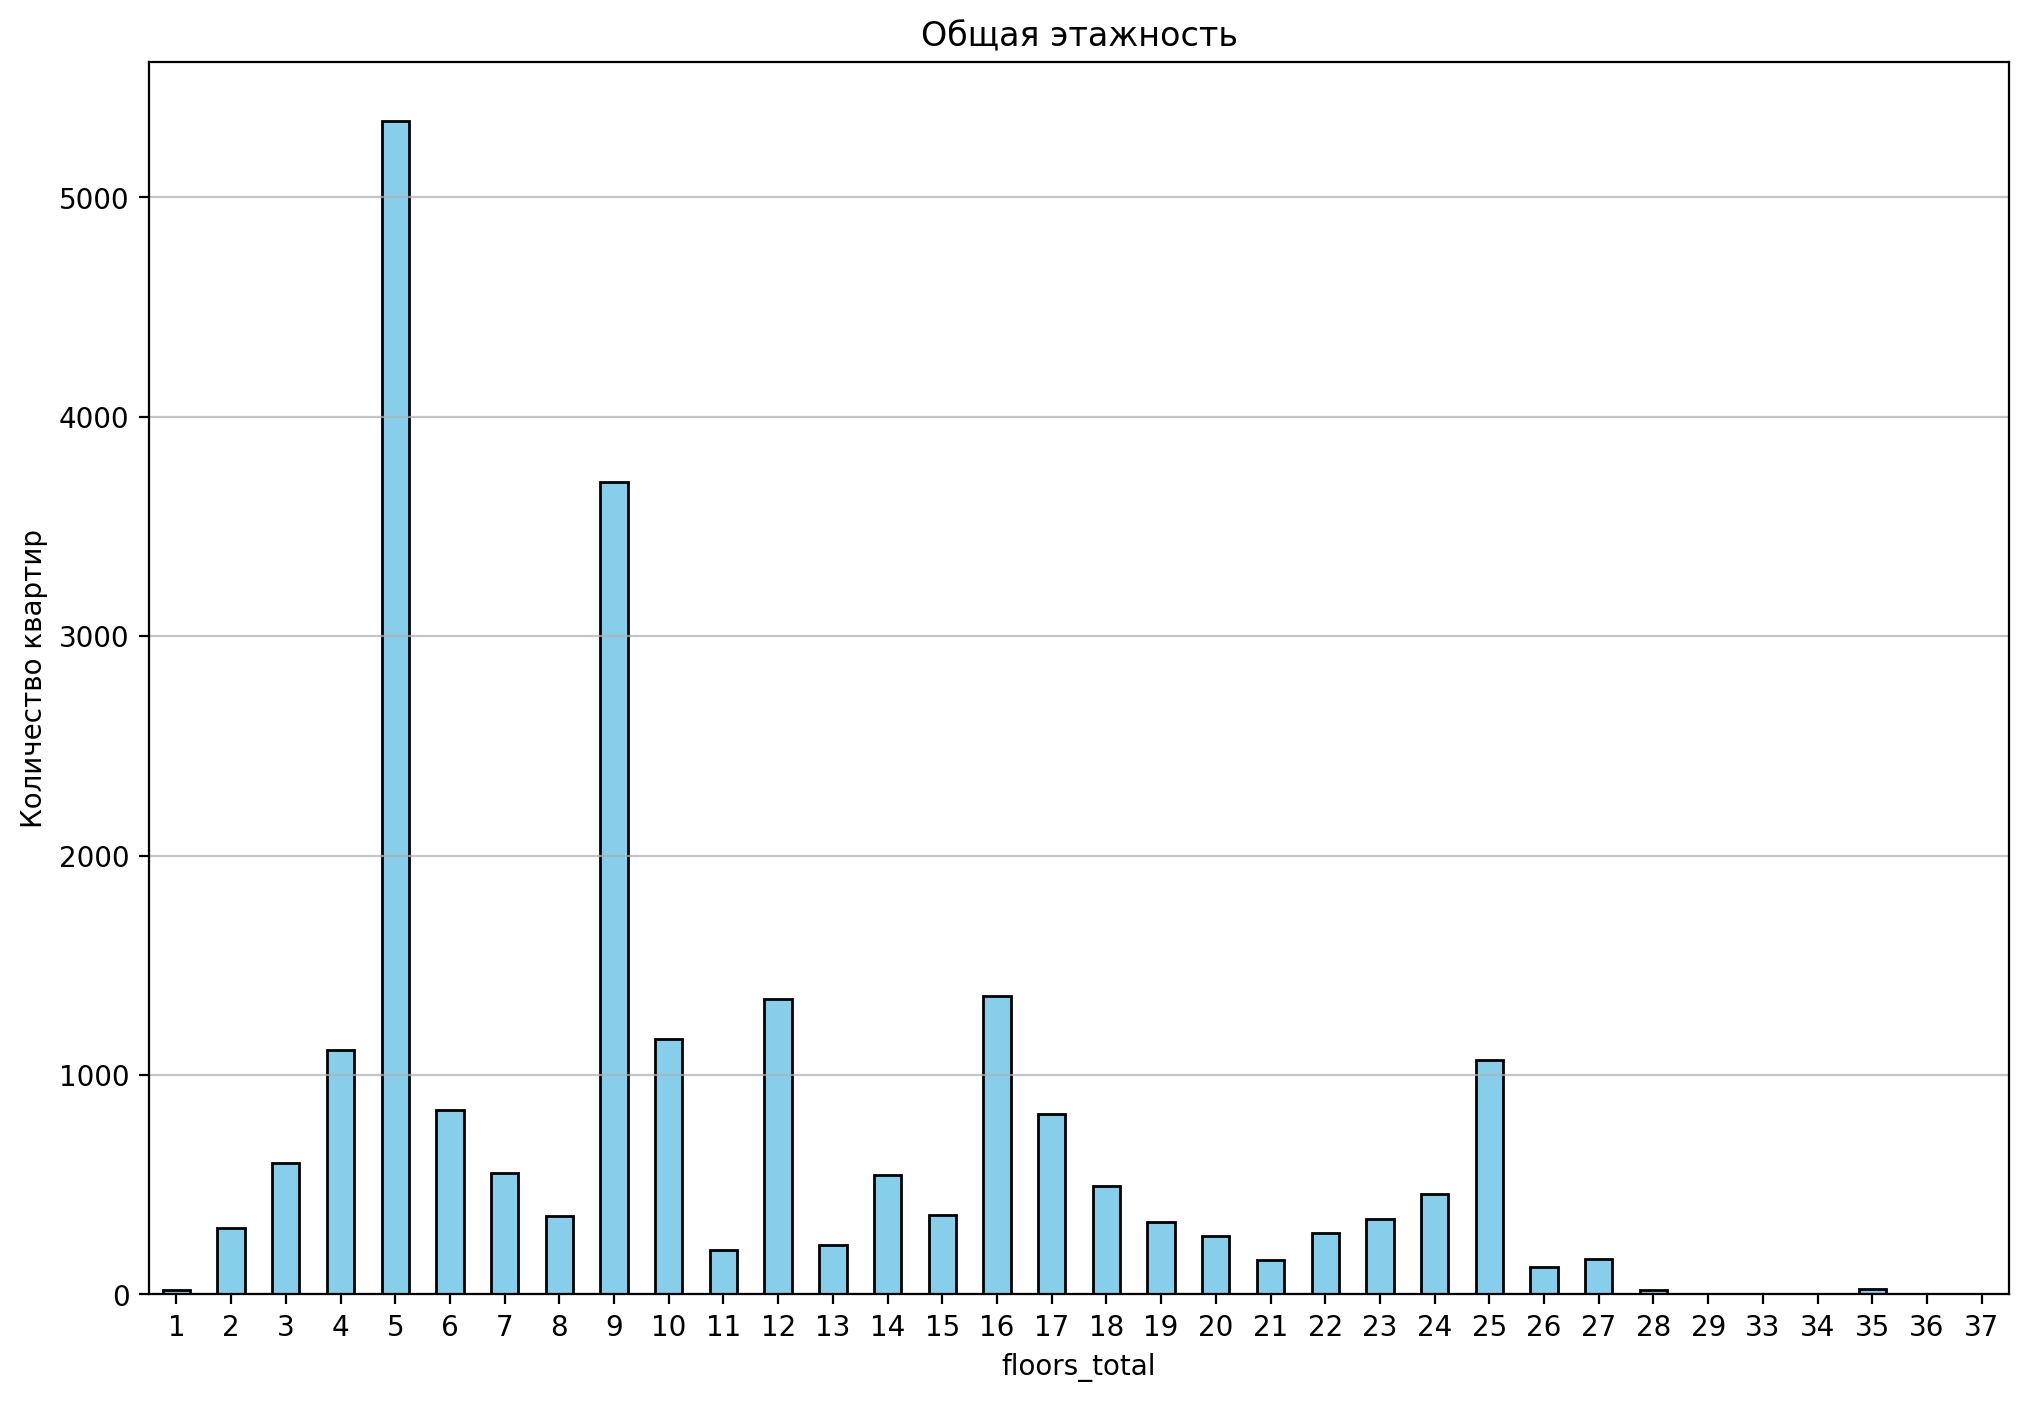

count   22,602.00
mean        10.85
std          6.59
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         37.00
Name: floors_total, dtype: float64

In [69]:
# Построим столбчатую диаграмму
# с помощью `sort_index()` выполним сортировку, чтобы этажности шли в порядке возрастания.
floors_total = df["floors_total"].value_counts().sort_index()

plt.figure(figsize=(12, 8))
floors_total.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Общая этажность")
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.75)
plt.xticks(rotation=0)  # Поворачиваем метки на 0 градусов для лучшей читаемости
plt.show()
df["floors_total"].describe()

Основная масса объявлений о продаже: в 5-этажках - не самые новые квартиры, второе место - квартиры в 9-этажных домах. 

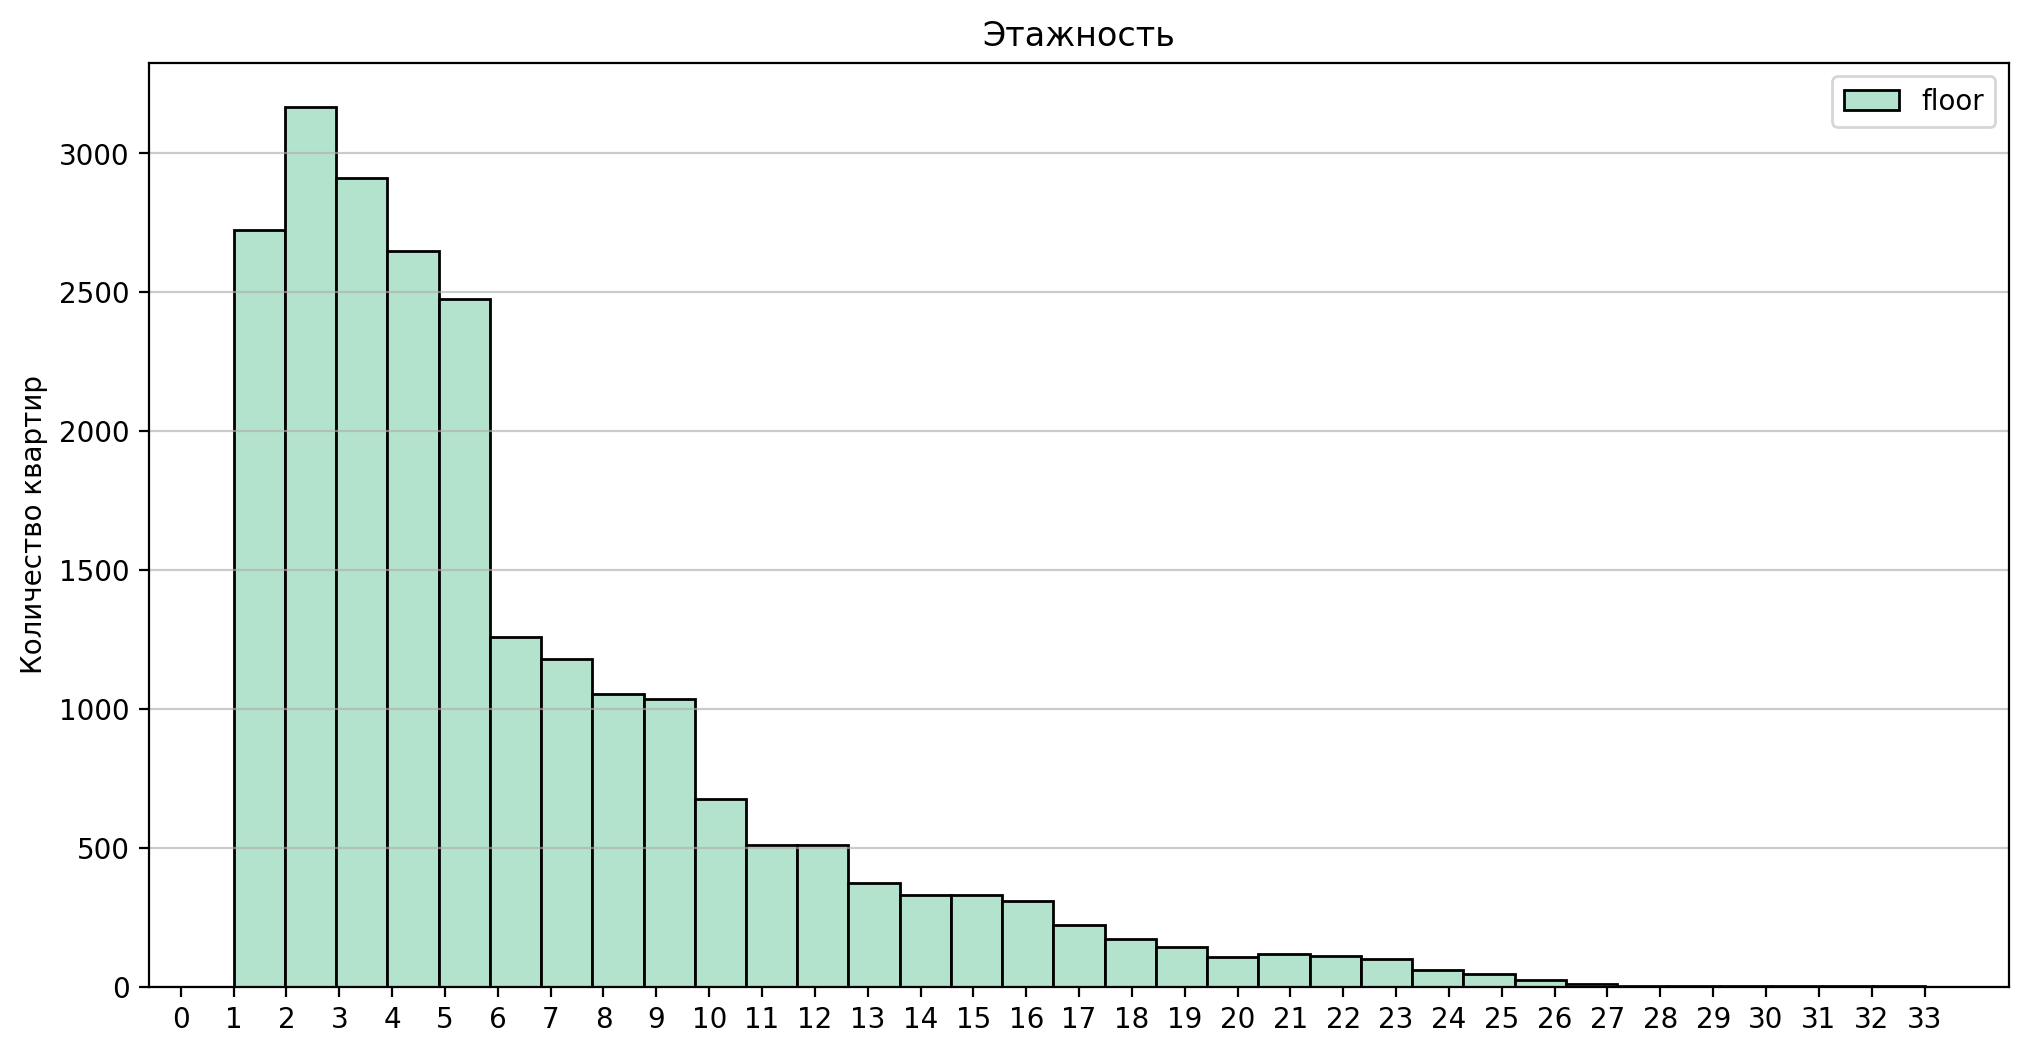

In [70]:
df.plot(
    kind="hist",
    y="floor",
    histtype="bar",
    bins=33,
    figsize=(12, 6),
    title="Этажность",
    cmap="Pastel2",
    edgecolor="black",
)
plt.xticks(range(0, 34, 1))
plt.ylabel("Количество квартир")
plt.grid(axis="y", alpha=0.65)
plt.show()

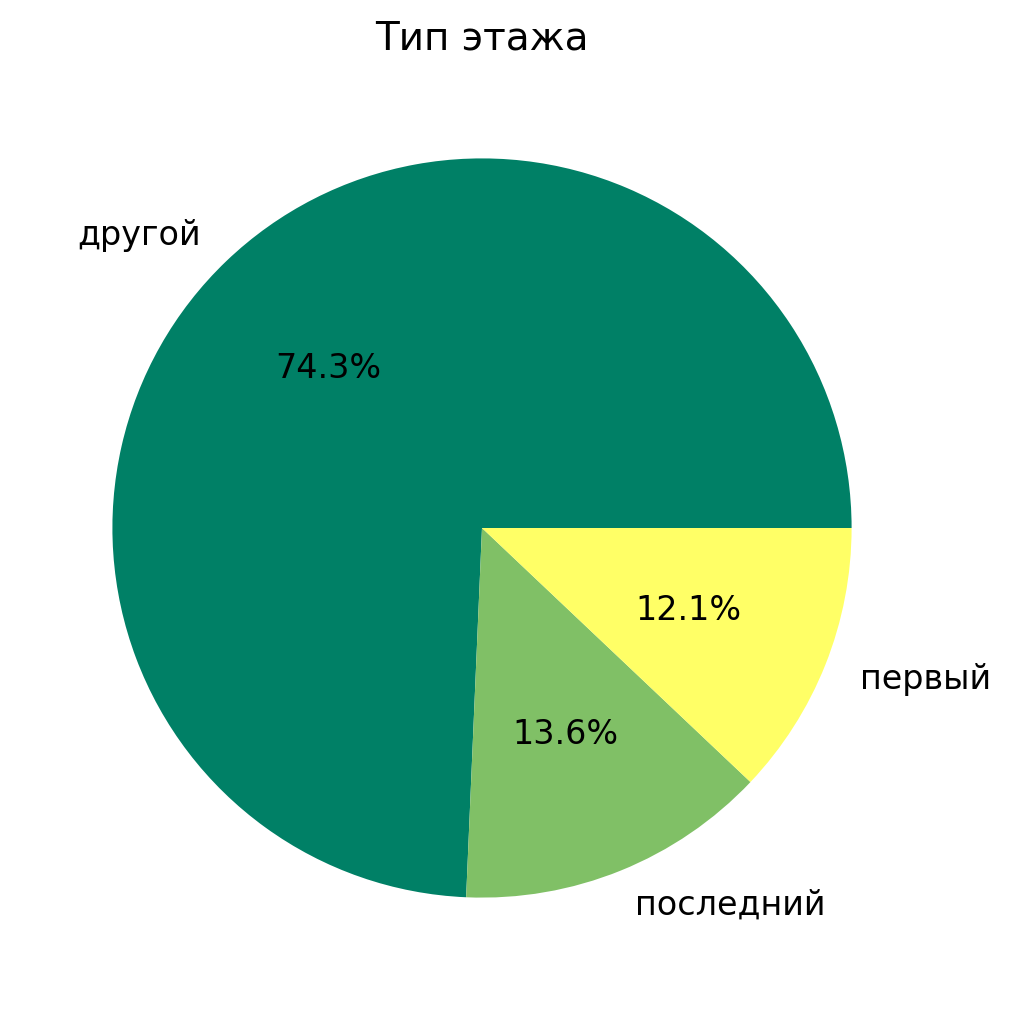

In [71]:
df["floor_type"].value_counts().plot.pie(
    figsize=(6, 6), autopct="%1.1f%%", fontsize=12, cmap="summer"
)
plt.title("Тип этажа", fontsize=14)
plt.ylabel("")  # Очищаем метку по оси Y
plt.show()

На круговой диаграмме видим равномерное распределение между предложениями на первом и последнем этажах. Доли почти совпадают. На первом этаже в целом меньшее количество квартир, из-за наличия коммерческой недвижимости во многих жилых домах. Она располагается на первых этажах.

#### Изучим расстояние до центра города в метрах

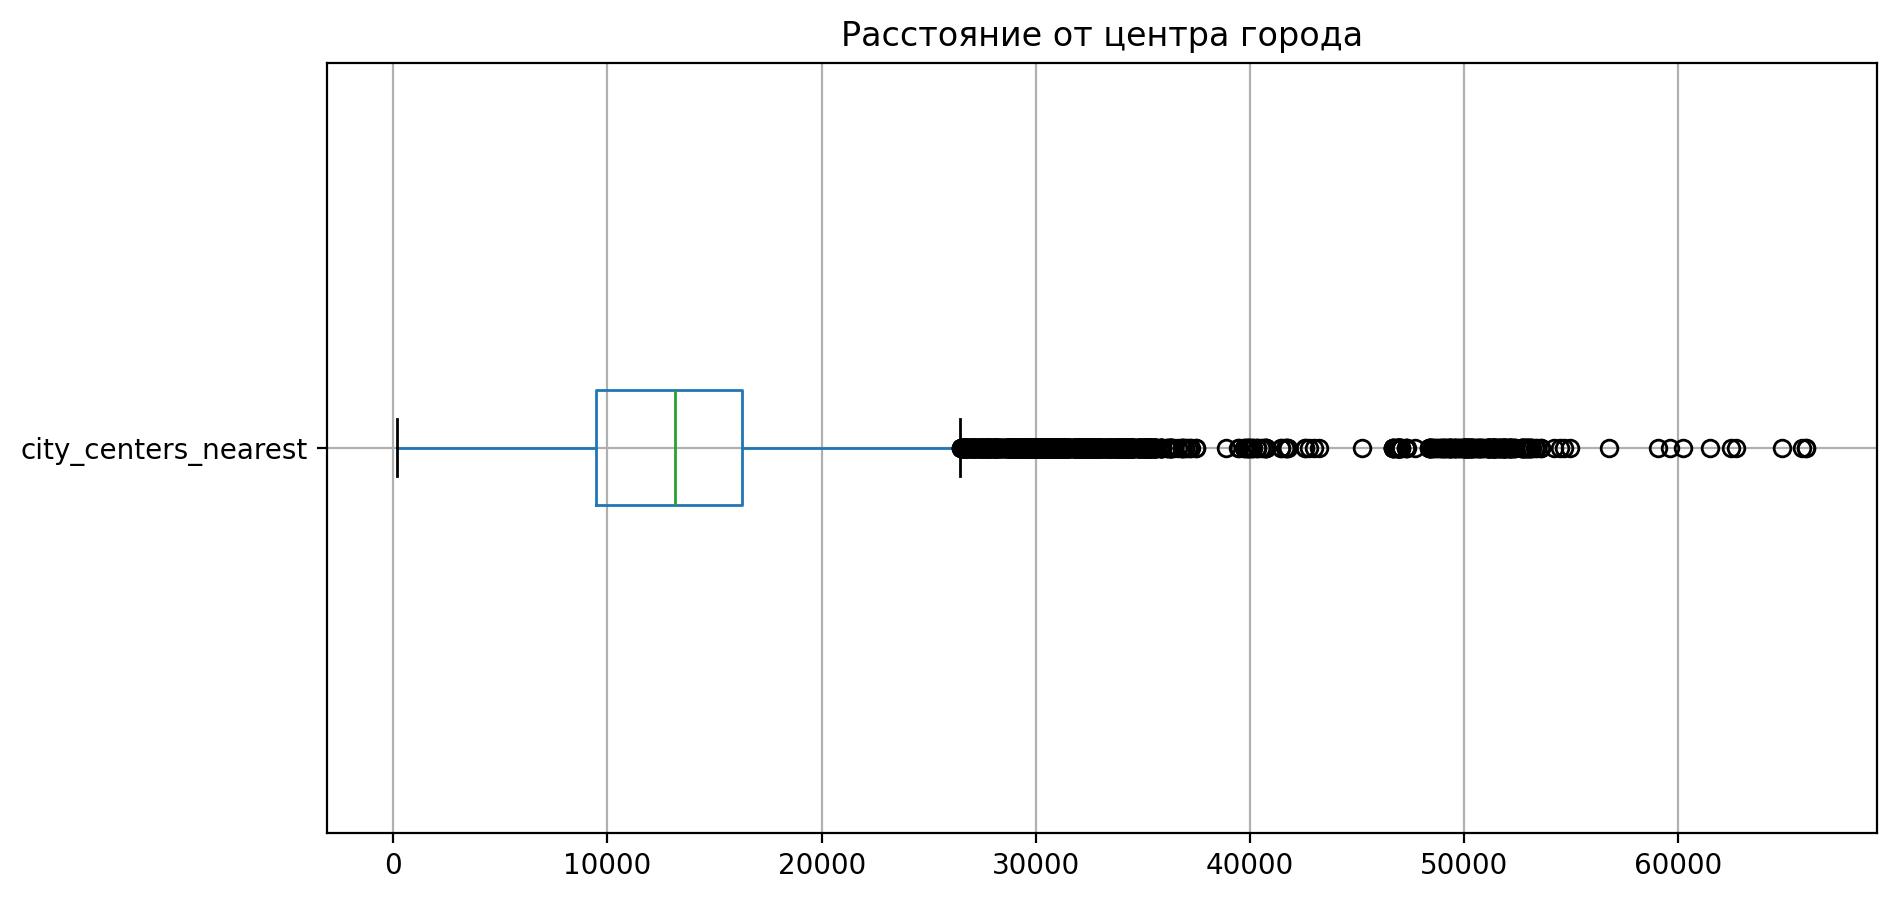

count   17,415.00
mean    14,224.45
std      8,460.76
min        181.00
25%      9,479.00
50%     13,164.00
75%     16,275.00
max     65,968.00
Name: city_centers_nearest, dtype: float64

In [72]:
# построим диаграмму размаха
df.boxplot("city_centers_nearest", figsize=(10, 5), vert=False)
plt.title("Расстояние от центра города")
plt.show()
df["city_centers_nearest"].describe()

Из имеющихся данных диапазон расстояний до центра лежит в рамках от 6000 м до 22000 м. Среднее и медианное значение 13000 м совпадают

#### Изучим расстояние до ближайшего аэропорта

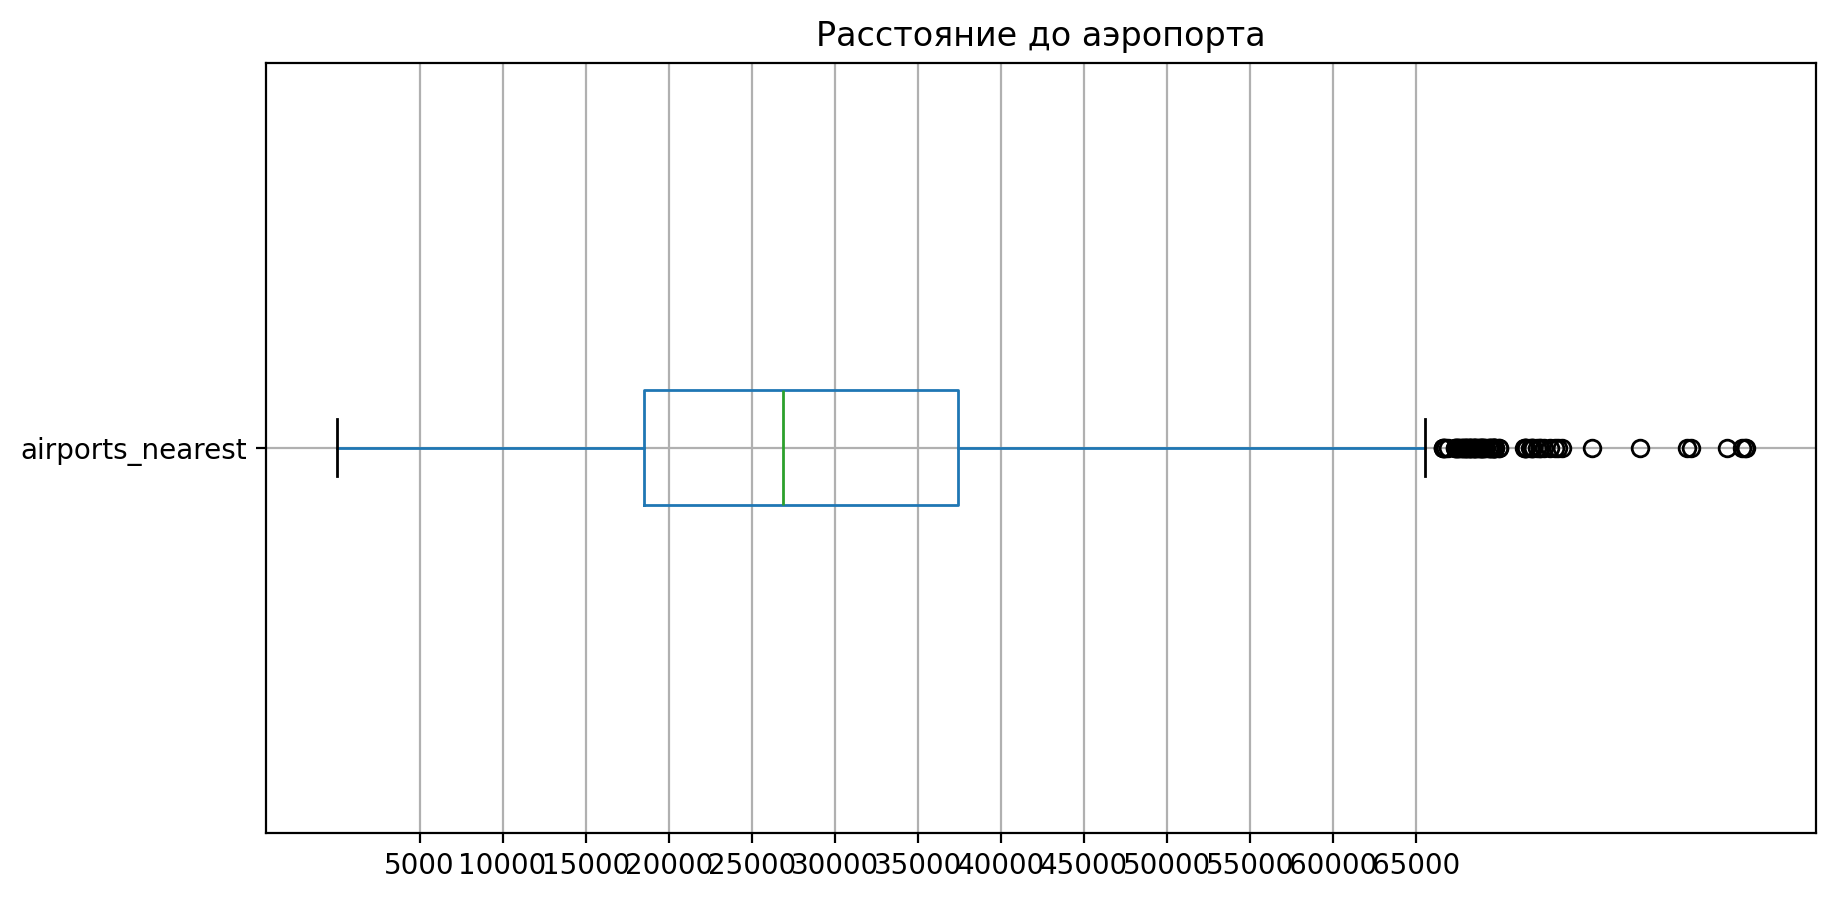

count   17,395.00
mean    28,861.18
std     12,651.59
min          0.00
25%     18,530.50
50%     26,902.00
75%     37,407.00
max     84,869.00
Name: airports_nearest, dtype: float64

In [73]:
df.boxplot("airports_nearest", figsize=(10, 5), vert=False)
plt.title("Расстояние до аэропорта")
plt.xticks(range(5000, 65001, 5000))
plt.show()
df["airports_nearest"].describe()

Большинство объектов продажи удалены от ближайшего аэропорта на расстояния от 15 до 40 км. при этом медиана смещена в сторону 30 км. это логично, учитывая что Аэропорт расположен на окраине и не равноудален от жилых кварталов, поэтому присуствуют значения в пределах "усов" диаграммы: близлежащие и удаленные от аэропорта районы.

#### Изучим расстояние до ближайшего парка

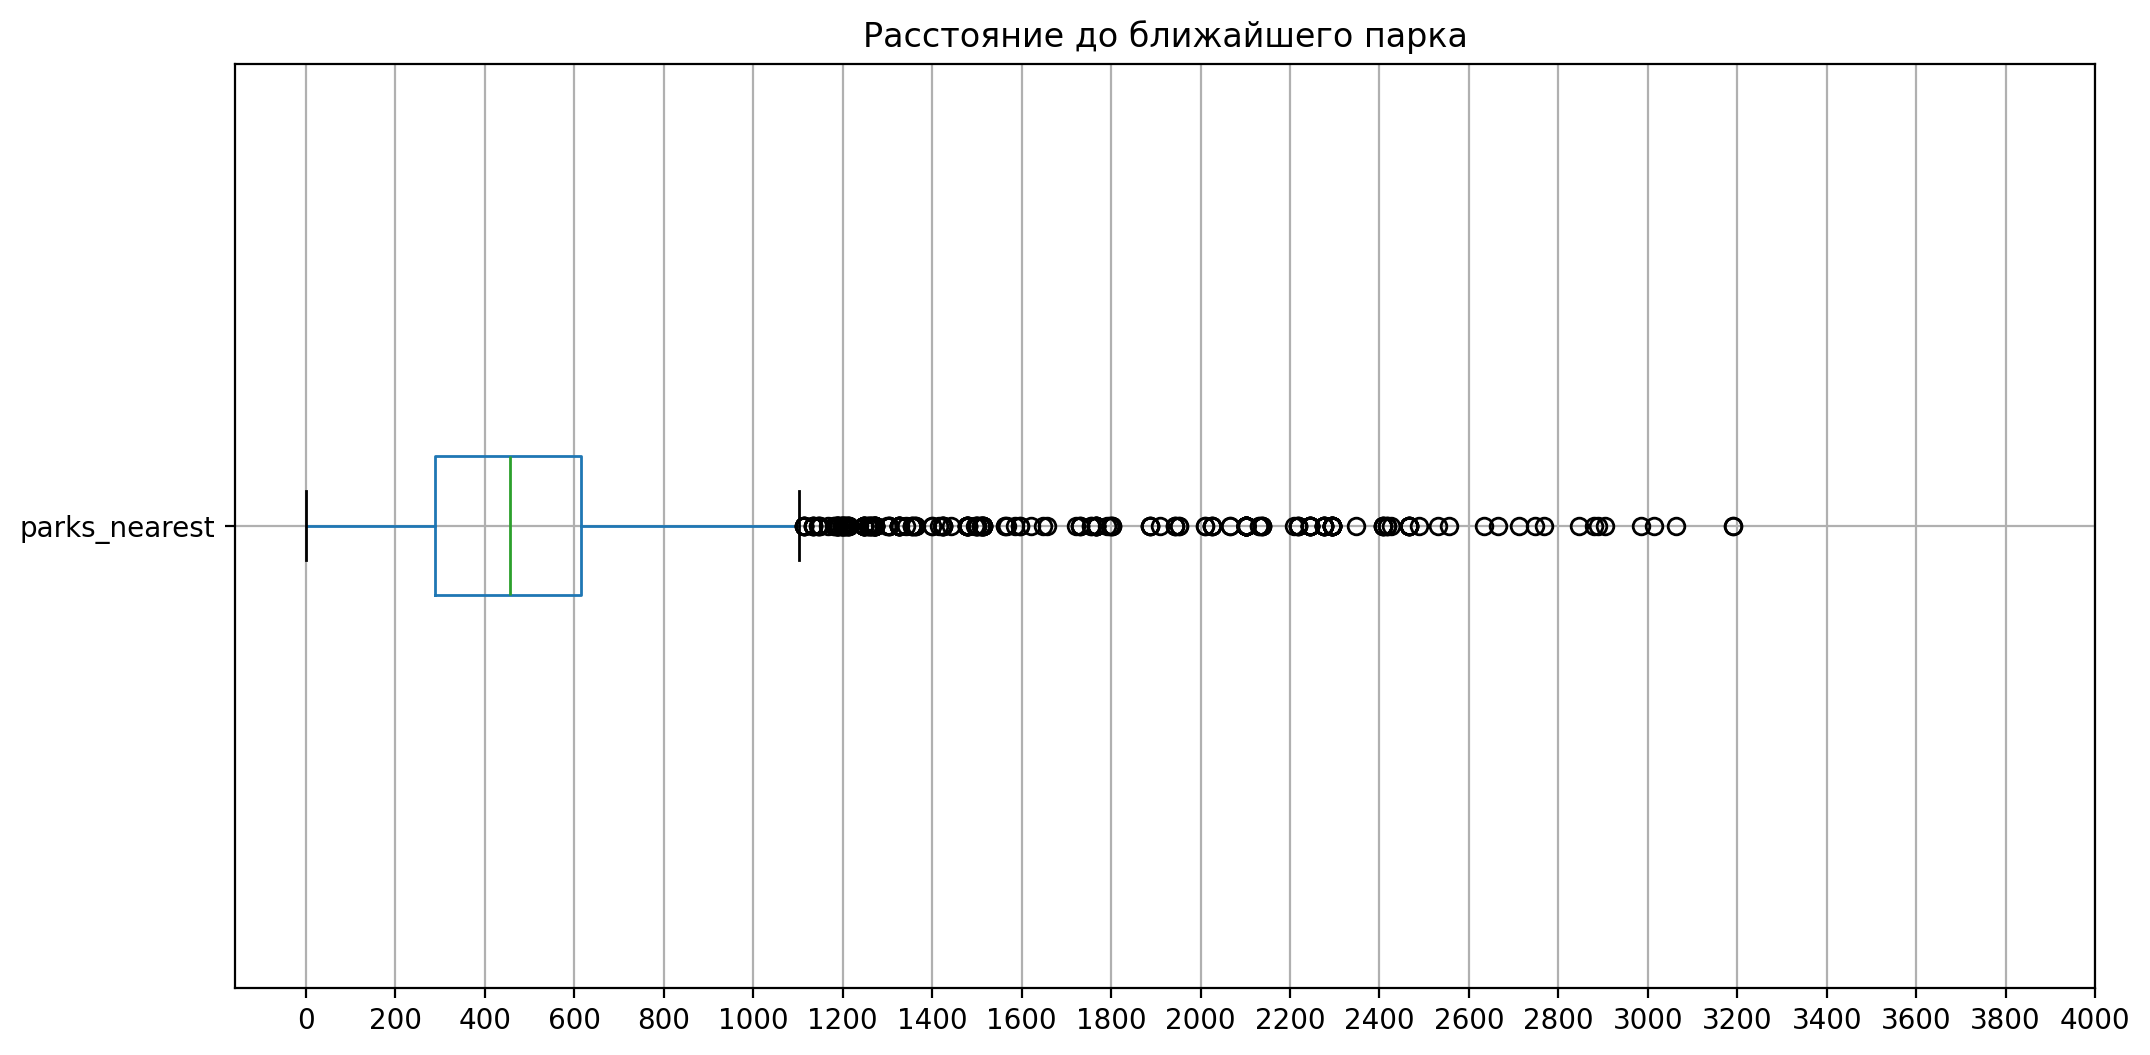

count   7,652.00
mean      493.52
std       344.16
min         1.00
25%       288.00
50%       456.00
75%       615.00
max     3,190.00
Name: parks_nearest, dtype: float64

In [74]:
df.boxplot("parks_nearest", figsize=(12, 6), vert=False)
plt.title("Расстояние до ближайшего парка")
plt.xticks(range(0, 4001, 200))
plt.show()
df["parks_nearest"].describe()

Помним, что в этом столбце много пропусков. Среди оставшихся данных диапазон варьируется сильно, так как расположение парков не всегда равномерно распределено по населенным пунктам. Среднее расстояние до парка = 500 м, однако есть и сильно удаленные объекты - дальше 3 км от парков.

#### Изучим день и месяц публикации объявления.

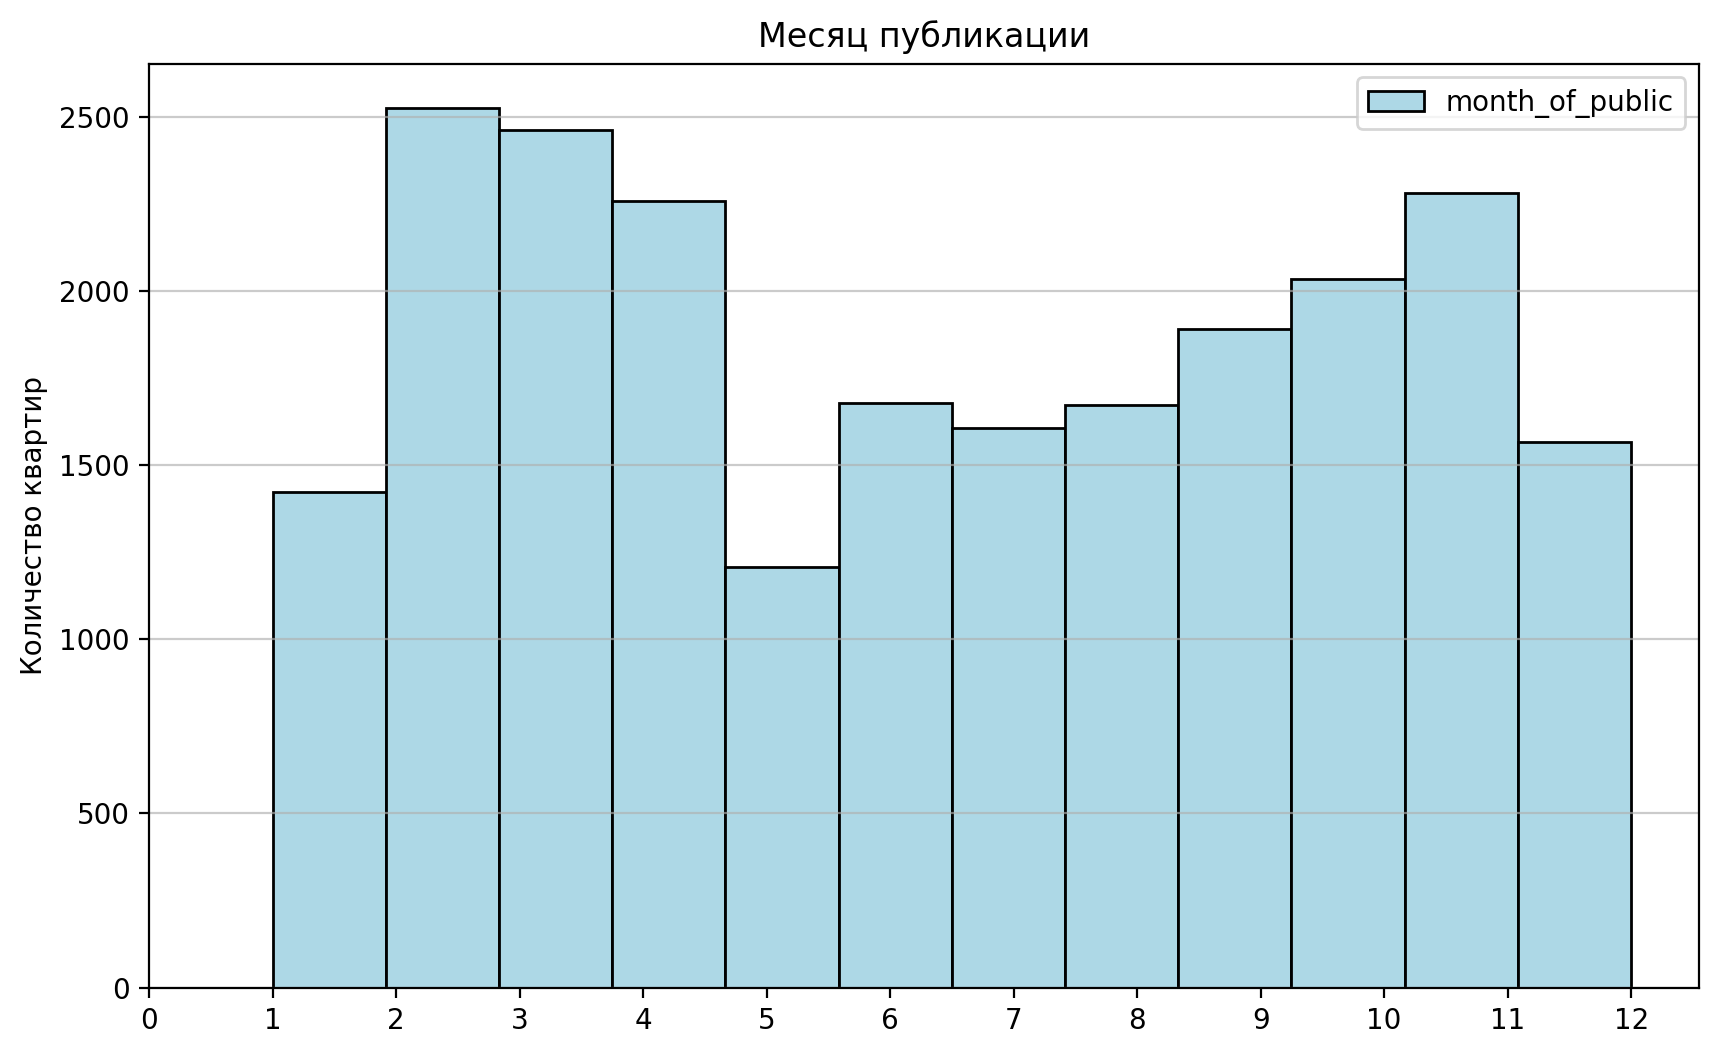

In [75]:
df.plot(
    kind="hist",
    y="month_of_public",
    histtype="bar",
    bins=12,
    figsize=(10, 6),
    color="lightblue",
    title="Месяц публикации",
    edgecolor="black",
)

plt.ylabel("Количество квартир")
plt.xticks(range(0, 13, 1))
plt.grid(axis="y", alpha=0.65)
plt.show()

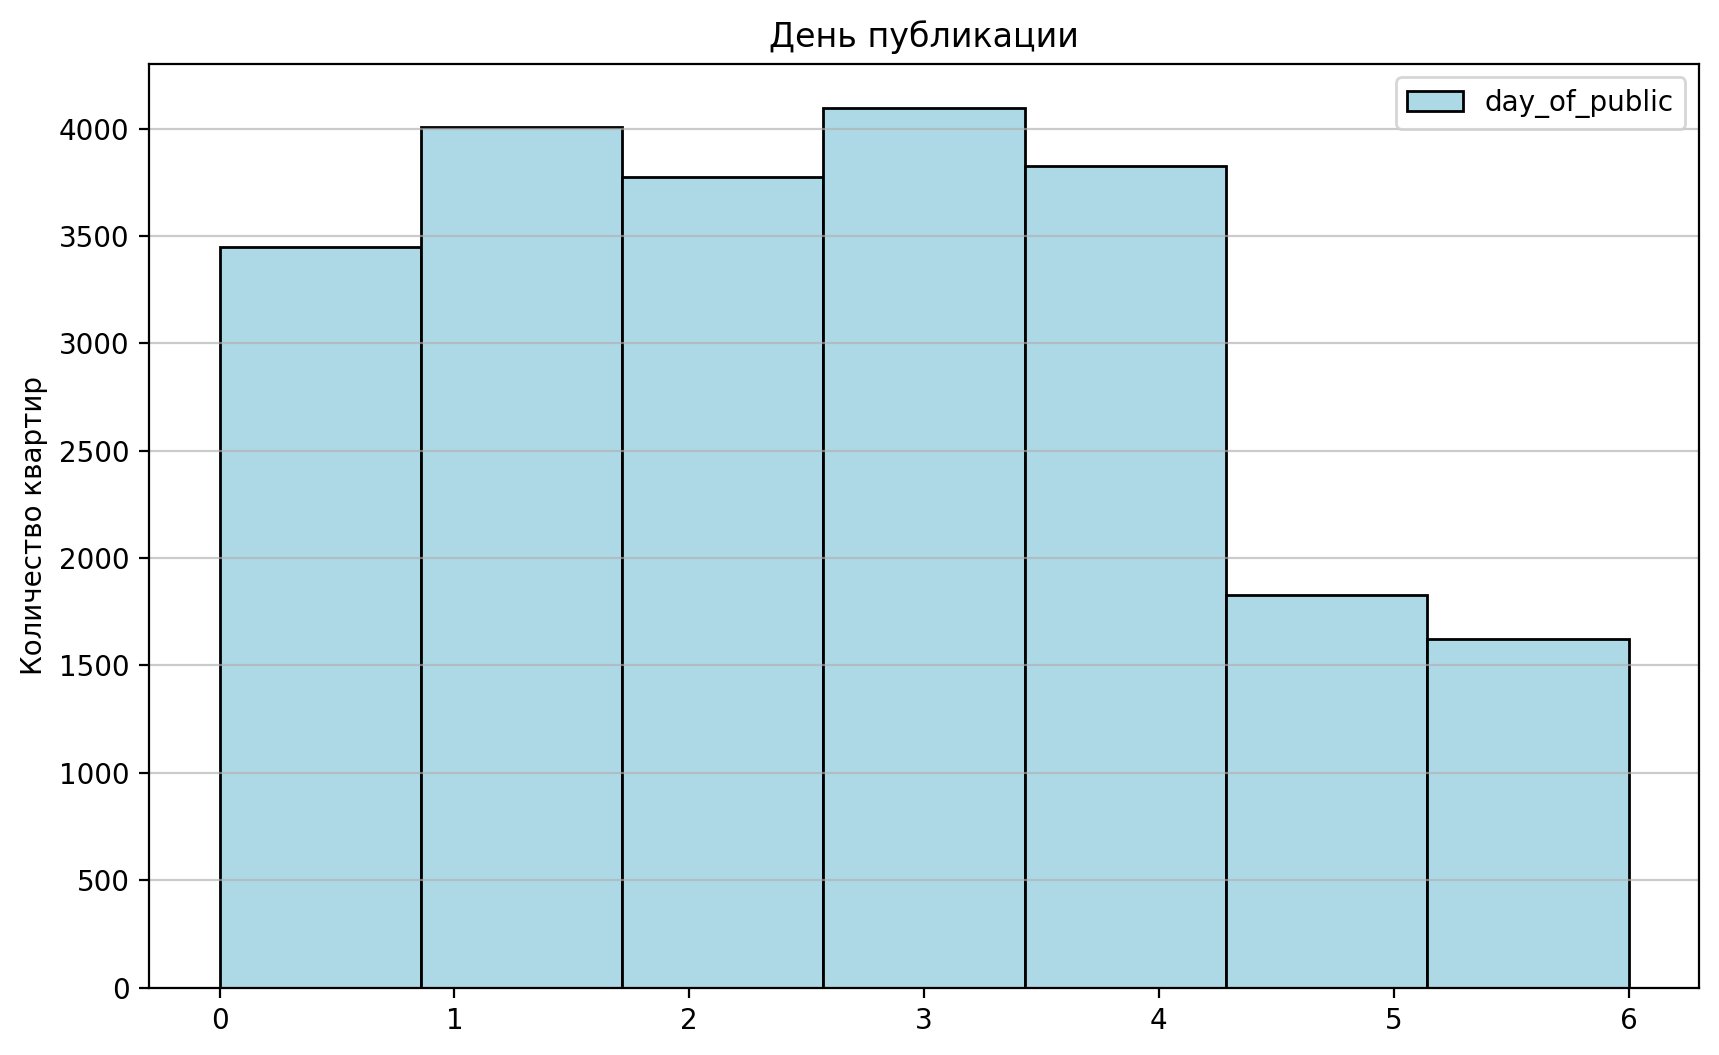

In [76]:
# построим гистограмму. 0-понедельник
df.plot(
    kind="hist",
    y="day_of_public",
    histtype="bar",
    bins=7,
    figsize=(10, 6),
    color="lightblue",
    title="День публикации",
    edgecolor="black",
)

plt.ylabel("Количество квартир")
plt.xticks(range(0, 7, 1))
plt.grid(axis="y", alpha=0.65)
plt.show()

**Вывод:** Изучив оба распределения отметим: чаще всего объявления о продаже публиковались в будние дни со вторника по пятницу, значительно реже в выходные дни.
Пиковые месяцы публикации : февраль, март, ноябрь. Значительное снижение количества объявлений: месяцы с праздничными днями ( декабрь, январь, май)

#### Изучим, как быстро продавались квартиры

Построим и изучим распределение на диаграмме размаха для столбца `days_exposition` и проверим распределение дней с момента публикации относительно межквартильного размаха. Исследуем значения по оси Х от 0 до 1000 дней чтобы увидеть выбросы

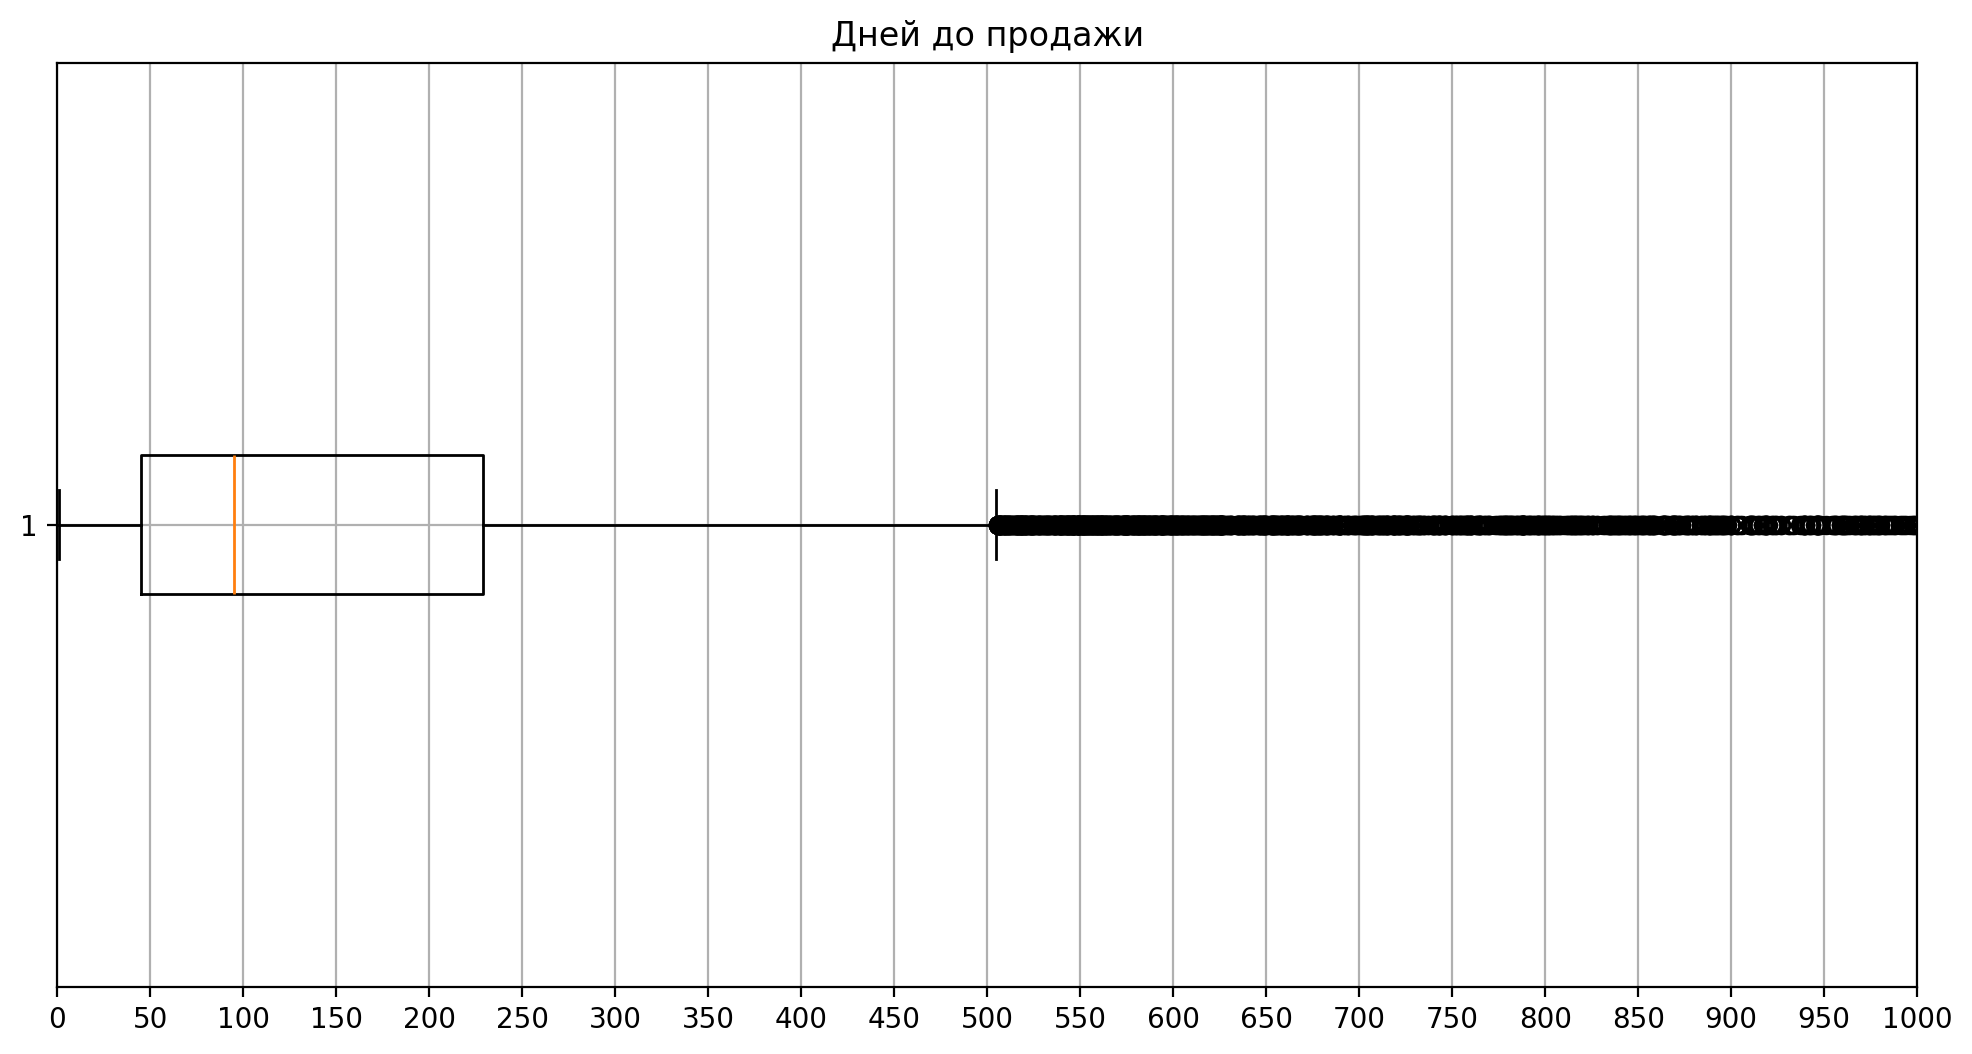

count   19,589.00
mean       179.48
std        218.26
min          1.00
25%         45.00
50%         95.00
75%        229.00
max      1,580.00
Name: days_exposition, dtype: float64

In [77]:
plt.figure(figsize=(12, 6))
plt.boxplot(
    df["days_exposition"].dropna(), vert=False
)  # Устанавливаем vert=False для горизонтального boxplot
plt.title("Дней до продажи")
plt.grid(True)
plt.xlim(0, 400)
plt.xticks(range(0, 1001, 50))
plt.show()
df["days_exposition"].describe()

Диаграмма размаха показывает что нормальное распределение значений в столбце лежит в диапазоне от 45 до 230 дней. Правая граница межквартильно размаха 1,5IQR доходит до  значений 505 дней. Все объявления которые висят дольше 500 дней можно назвать неликвидными. Теперь построим столбчатую диаграмму распределения количества квартир, исходя из межквартильного размаха

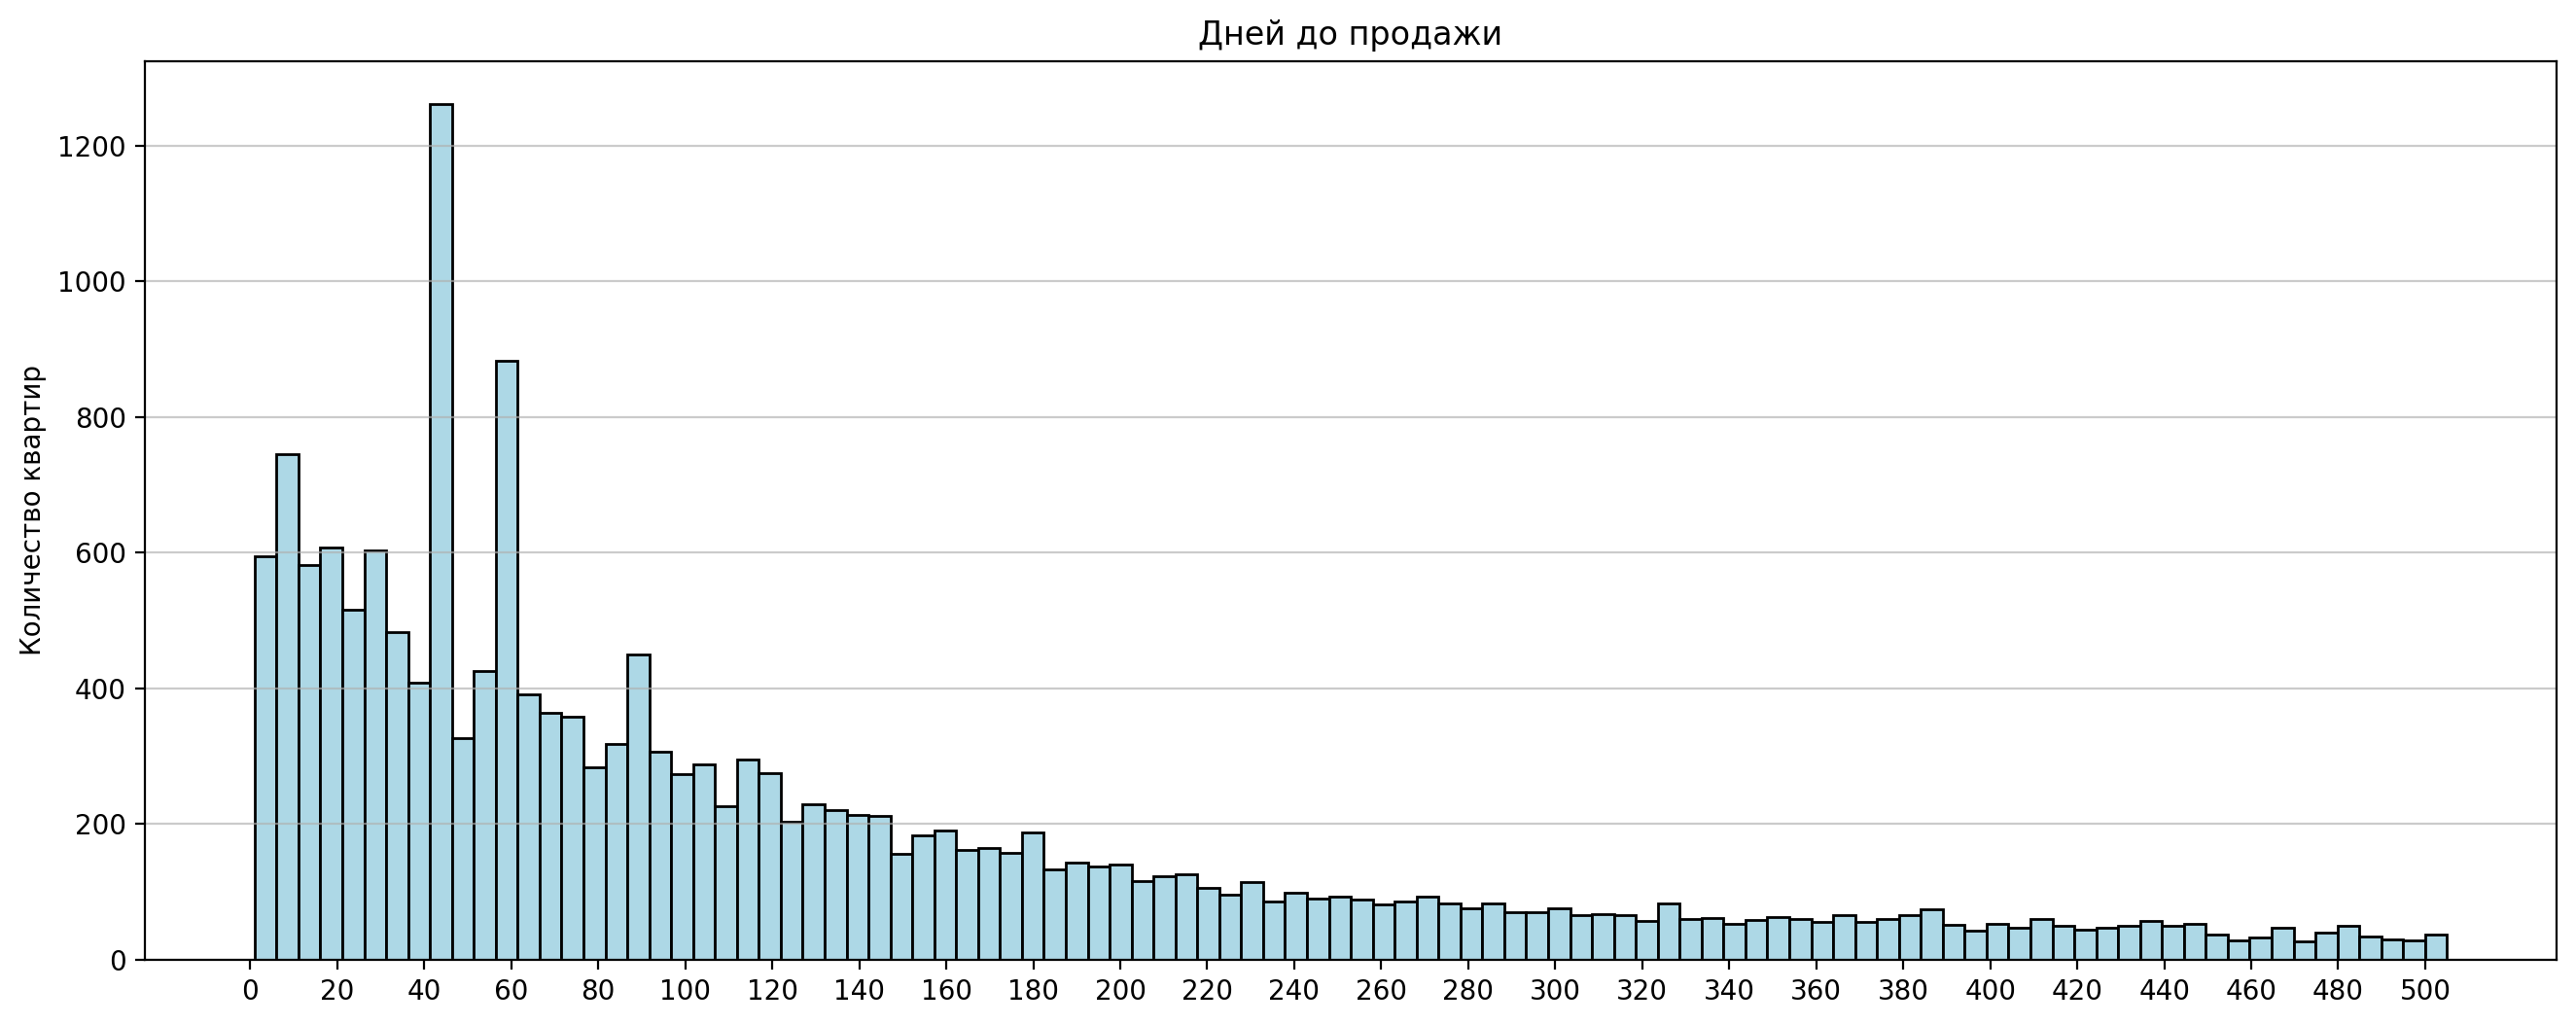

In [78]:
# строим гистограмму для значений столбца < 506 дней
df.query("days_exposition < 506")["days_exposition"].plot(
    kind="hist",
    y="days_of_exposition",
    histtype="bar",
    bins=100,
    figsize=(16, 6),
    color="lightblue",
    title="Дней до продажи",
    edgecolor="black",
)

plt.ylabel("Количество квартир")
plt.xticks(range(0, 511, 20))
plt.grid(axis="y", alpha=0.65)
plt.show()

На графике мы видим что количество объявлений о продаже снижается и стремится к минимальным значениям если от публикации до снятия прошло больше 6 месяцев. Больше всего квартир продается в диапазоне от 5 до 90 дней с момента публиции. Квартиры не проданные в первые 6-8 месяцев после публикации затем могут продаваться долго. Найдем среднее и медиану для столбца ```days_exposition``` для объявлений вплоть 505 дней ( некоторые квартиры могут продаваться долго).

In [79]:
# заменим тип данных на int, сохранив пропуски
df["days_exposition"] = (
    df["days_exposition"].fillna(-1).astype("int").replace(-1, np.nan).astype("Int64")
)
df["days_exposition"].dtype

Int64Dtype()

In [80]:
# заменим тип данных на int, сохранив пропуски
df["days_exposition"].fillna(-1).astype("int").replace(-1, np.nan).astype("Int64")


display(
    f' Медианное значение дней до продажи объекта: {df.query("days_exposition < 505")["days_exposition"].median().round(1)}'
)
display(
    f' Среднее значение дней до продажи объекта: {df.query("days_exposition < 505")["days_exposition"].mean().round(1)}'
)

' Медианное значение дней до продажи объекта: 84.0'

' Среднее значение дней до продажи объекта: 127.3'

<span style="color: blue;">**Вывод:**<span>
    
из-за наличия объявлений которые пользователи не снимают с продажи среднее значение смещено от медианного в большую сторону. Проведя исследование я делаю вывод что среднее время продажи квартиры составляет от 3 до 4 месяцев. Продажи в первые 2 месяца после публикации можно назвать быстрыми, а если объявление находится в продаже более 8 месяцев (230дней) - можно говорить о том что оно неактуально или продажа чрезвычайно долгая, возможно в нем не хватает данных для продажи, неправильно указаны контакты и/или цена не является рыночной в своем сегменте.


#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависимость цены от общей площади объекта

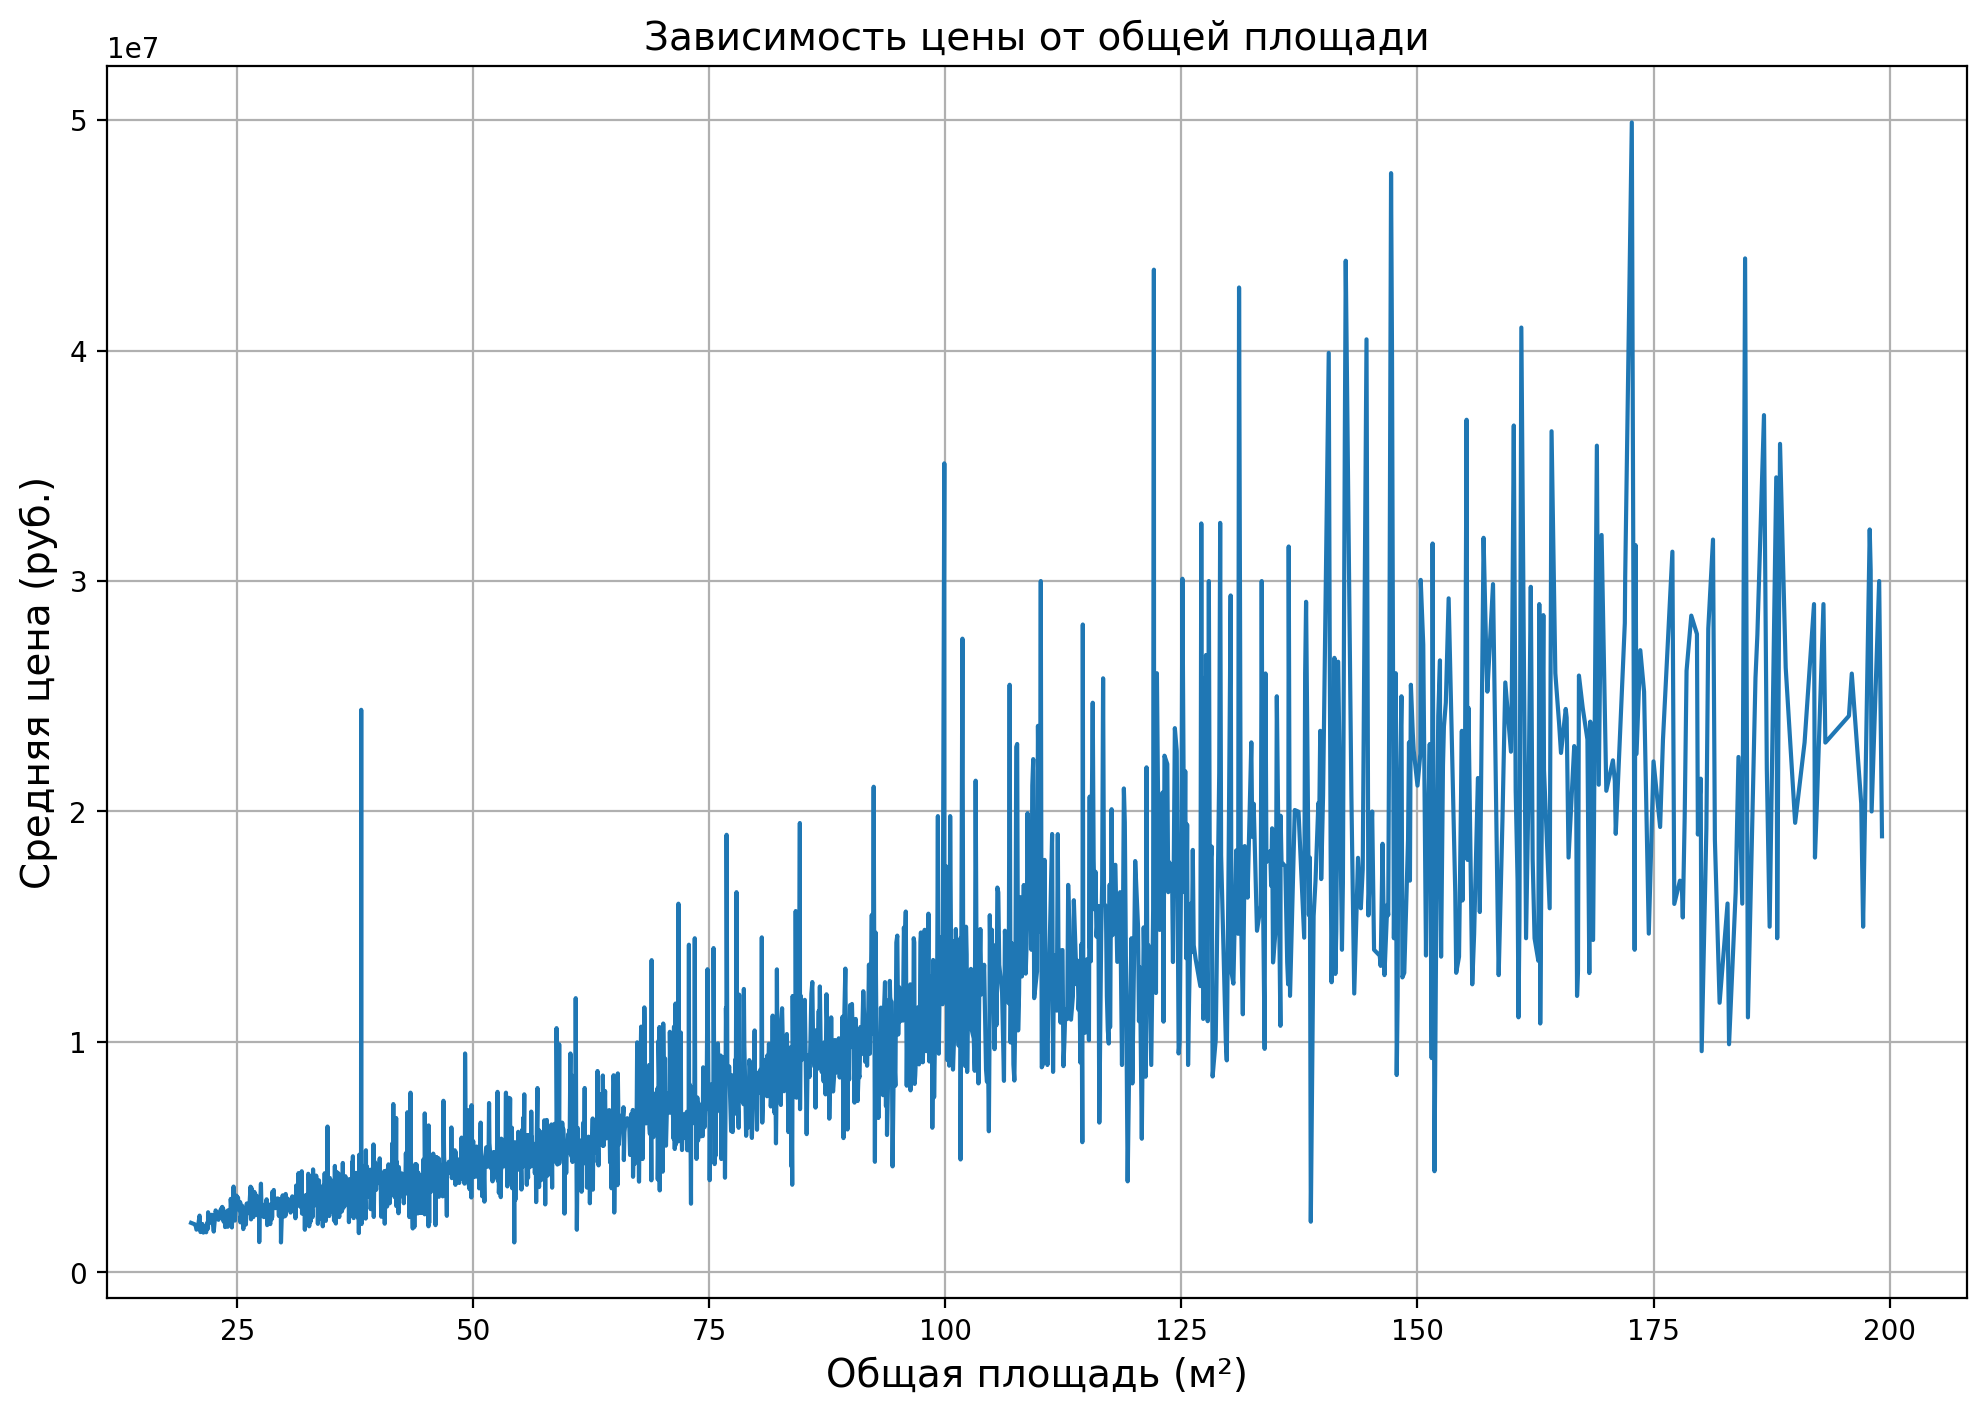

In [81]:
# создадим сводную таблицу в которой индексами будут значения общей площади
total_area_pivot = pd.pivot_table(
    df,
    index=["total_area"],
    values="last_price",
    aggfunc=["mean", "median"],
)

# Извлечем из этой таблицы среднее значение для цены и по нему построим график
total_area_mean = total_area_pivot["mean"]

# Построение графика
plt.figure(figsize=(12, 8))
sns.lineplot(data=total_area_mean, x="total_area", y="last_price")
plt.title("Зависимость цены от общей площади", fontsize=14)
plt.ylabel("Средняя цена (руб.)", fontsize=14)
plt.xlabel("Общая площадь (м²)", fontsize=14)
plt.grid(True)
plt.show()

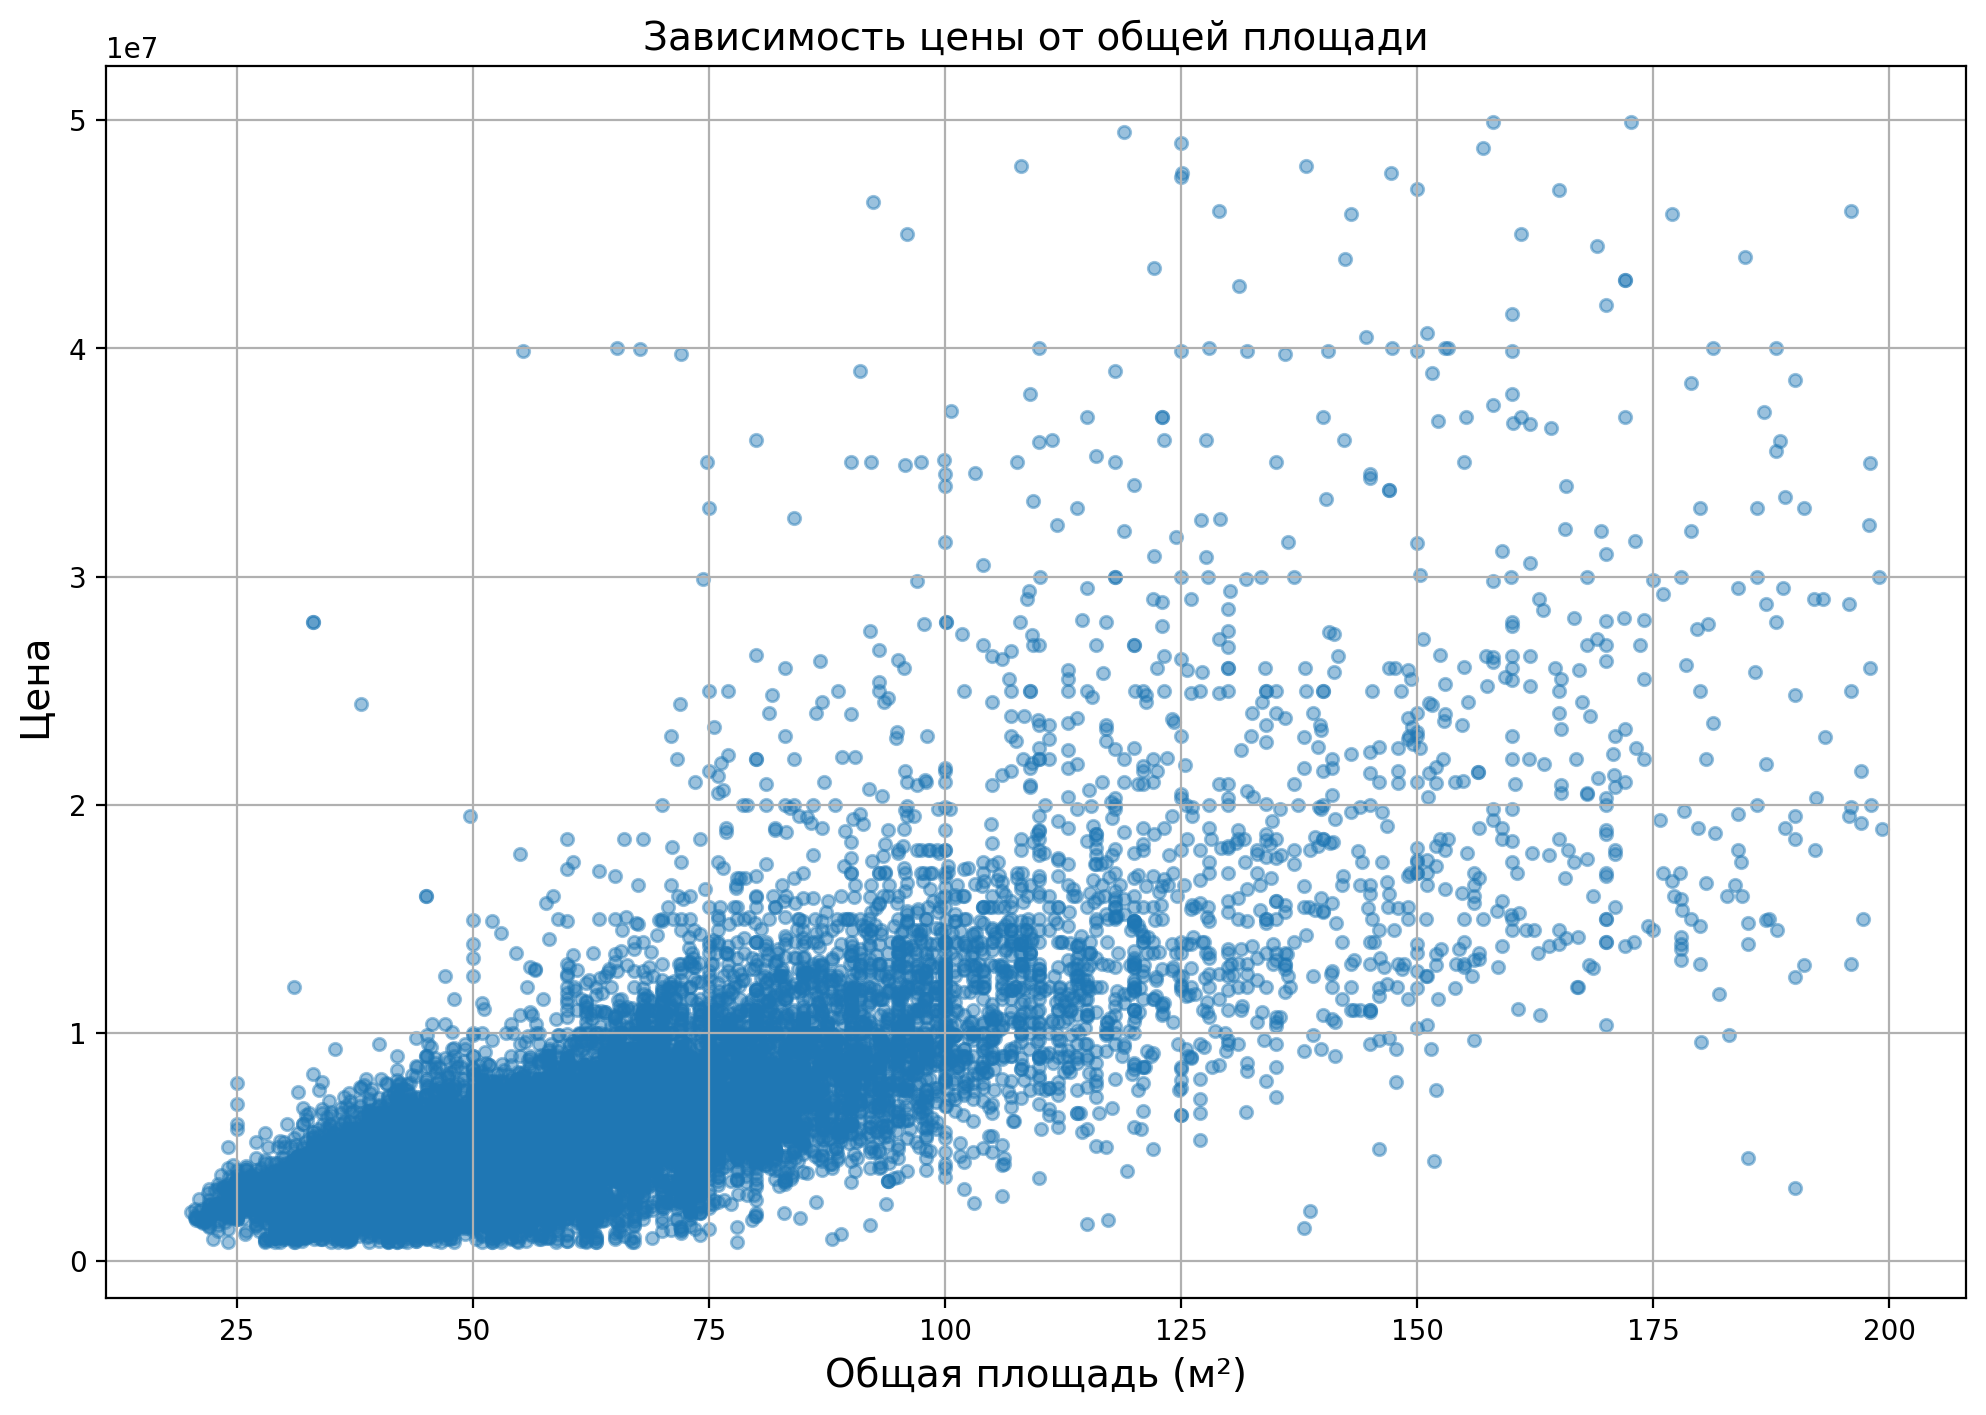

In [82]:
# выделим интересующие нас признаки в отдельный датафрейм, далее будем обращаться к нему в исследовании
price_to_attributes = df[
    ["total_area", "last_price", "living_area", "kitchen_area", "rooms", "floor_type"]
]
# построим диаграмму рассеивания которая покажет как друг относительно друга распределены пары показателей цены и общей площади
price_to_attributes.plot(
    x="total_area",
    y="last_price",
    kind="scatter",
    grid=True,
    alpha=0.45,
    figsize=(12, 8),
)
plt.title("Зависимость цены от общей площади", fontsize=14)
plt.xlabel("Общая площадь (м²)", fontsize=14)
plt.ylabel("Цена ", fontsize=14)
plt.show()

Из двух графиков мы видим как с увеличением площади растет общая цена объектов недвижимости. Рост в основном линейный и присуствует много выбросов во всех диапазонах площади. 

##### Зависимость цены от жилой площади объекта

Можно предположить что зависимость цены объекта от жилой площади будет очень похожа на зависимость от общей. В результате обработки  значений столбца ```living_area``` мы разделили значения на интервалы площадей и поместили их в  ```area_category```. Проведем исследование по этому столбцу

In [83]:
average_price_by_area = df.pivot_table(
    index="area_category", values="last_price", aggfunc="mean"
)
print(average_price_by_area.head(10))

                 last_price
area_category              
10-30          3,982,344.80
30-50          6,214,561.02
50-70         10,783,922.59
70-90         15,877,821.84
90-110        19,847,677.88
110-130       18,679,113.84
130-150       20,546,183.33
150-170       20,866,666.67


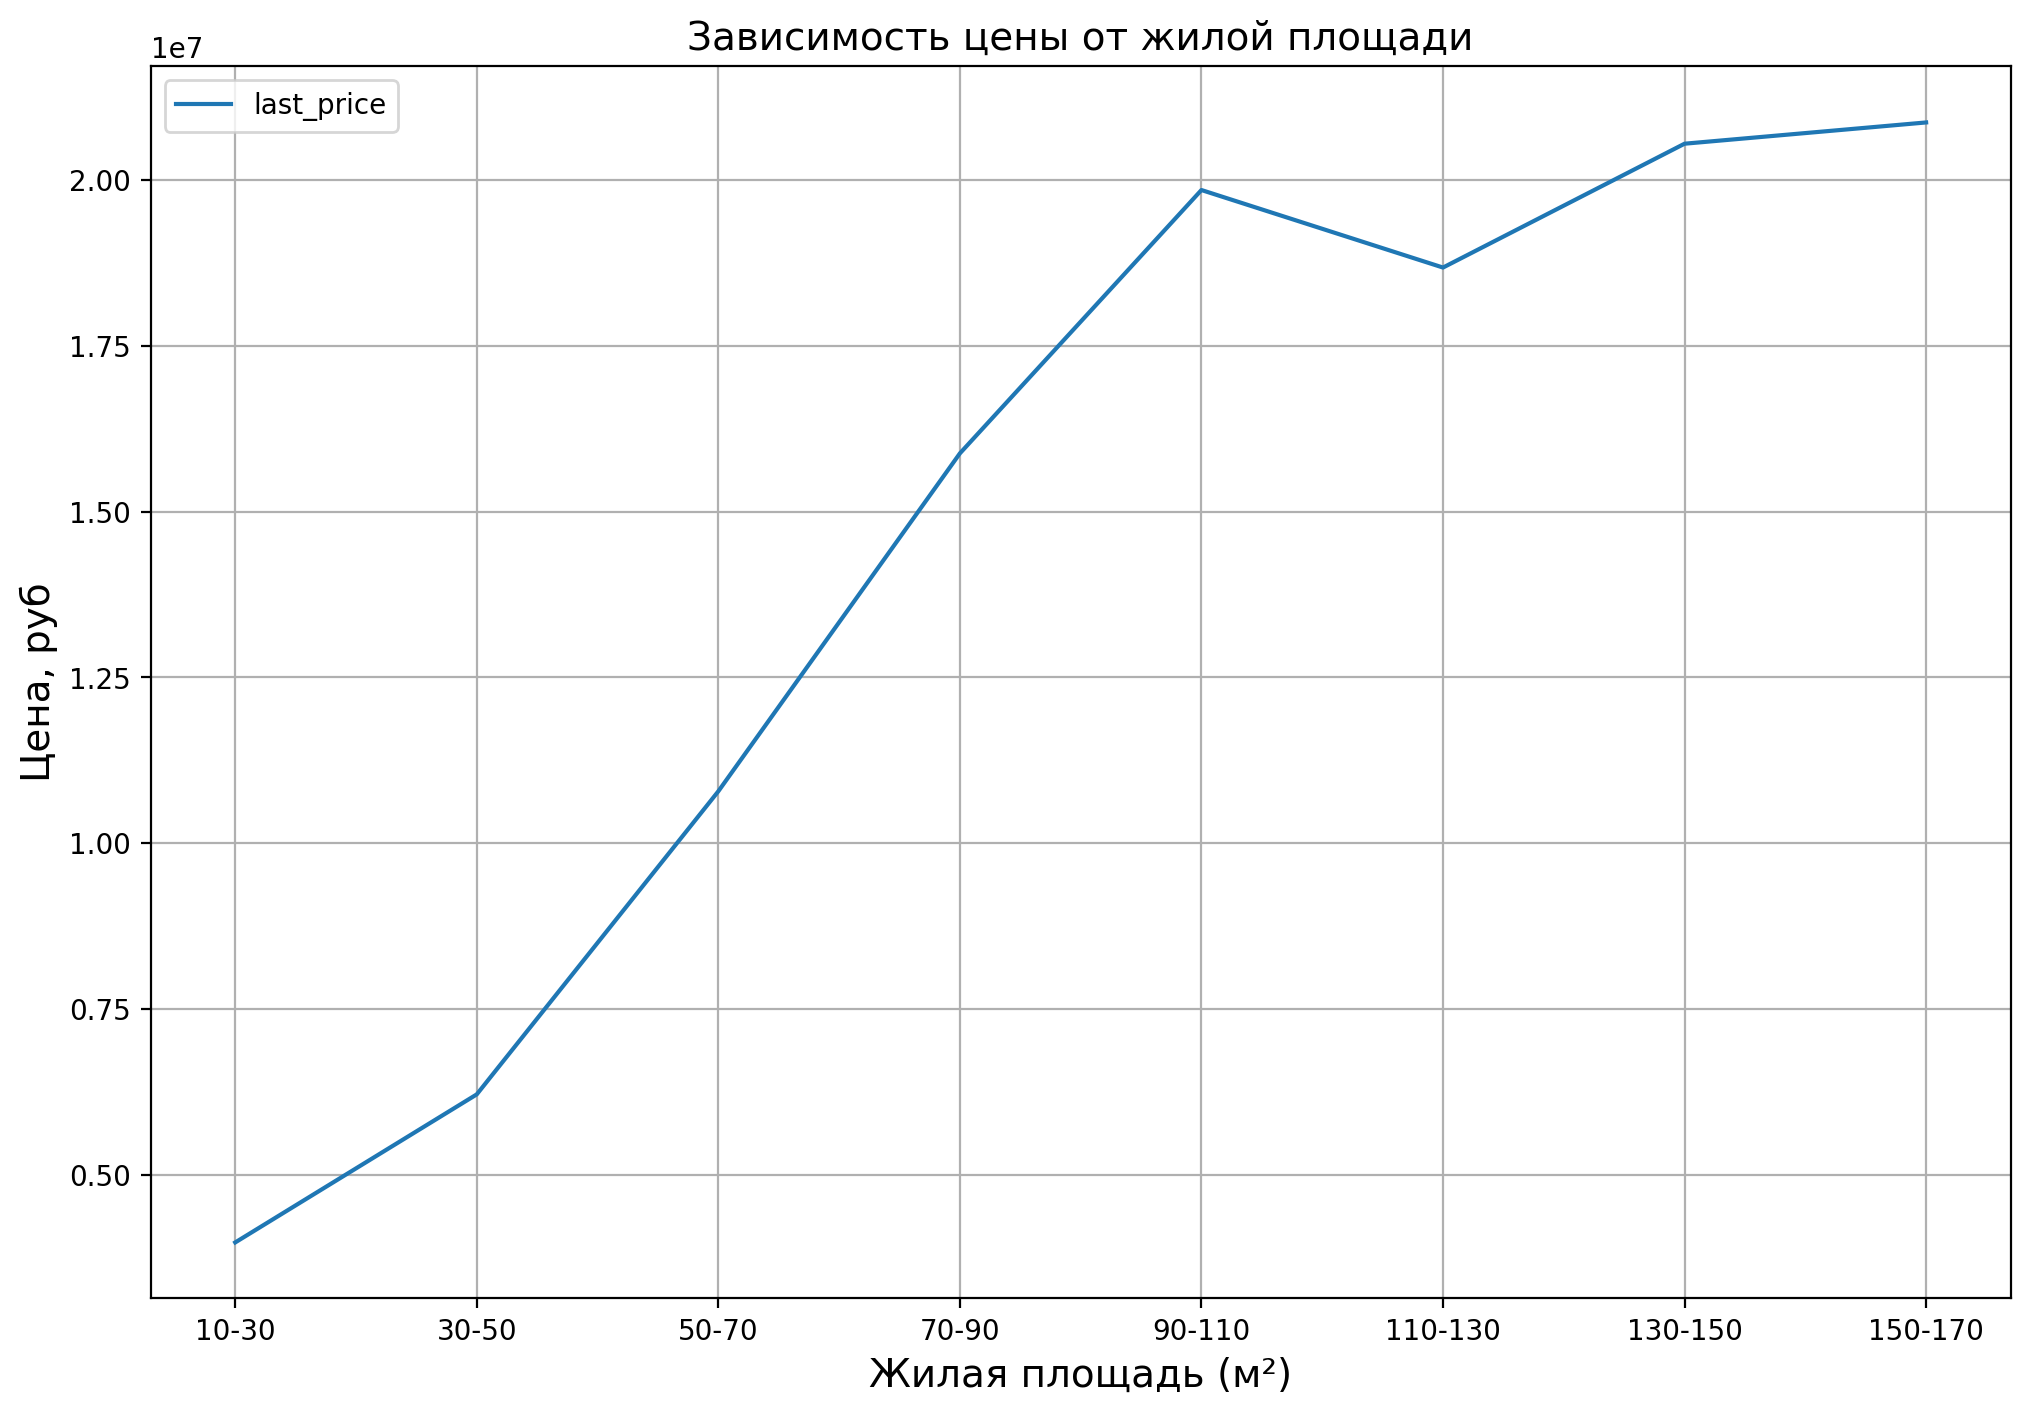

In [84]:
# Построение линейного графика
average_price_by_area.reset_index().plot(
    x="area_category",
    y="last_price",
    kind="line",
    grid=True,
    figsize=(12, 8),
)

plt.title("Зависимость цены от жилой площади", fontsize=14)
plt.xlabel("Жилая площадь (м²)", fontsize=14)
plt.ylabel("Цена, руб", fontsize=14)
plt.show()

Как мы и предполагали, зависимость носит линейный характер. Интересно что при достижении значений жилой площади 90-100 кв м. рост стоимости замедляется и цена почти перестает расти для больших объектов

##### Зависимость цены от  площади кухни

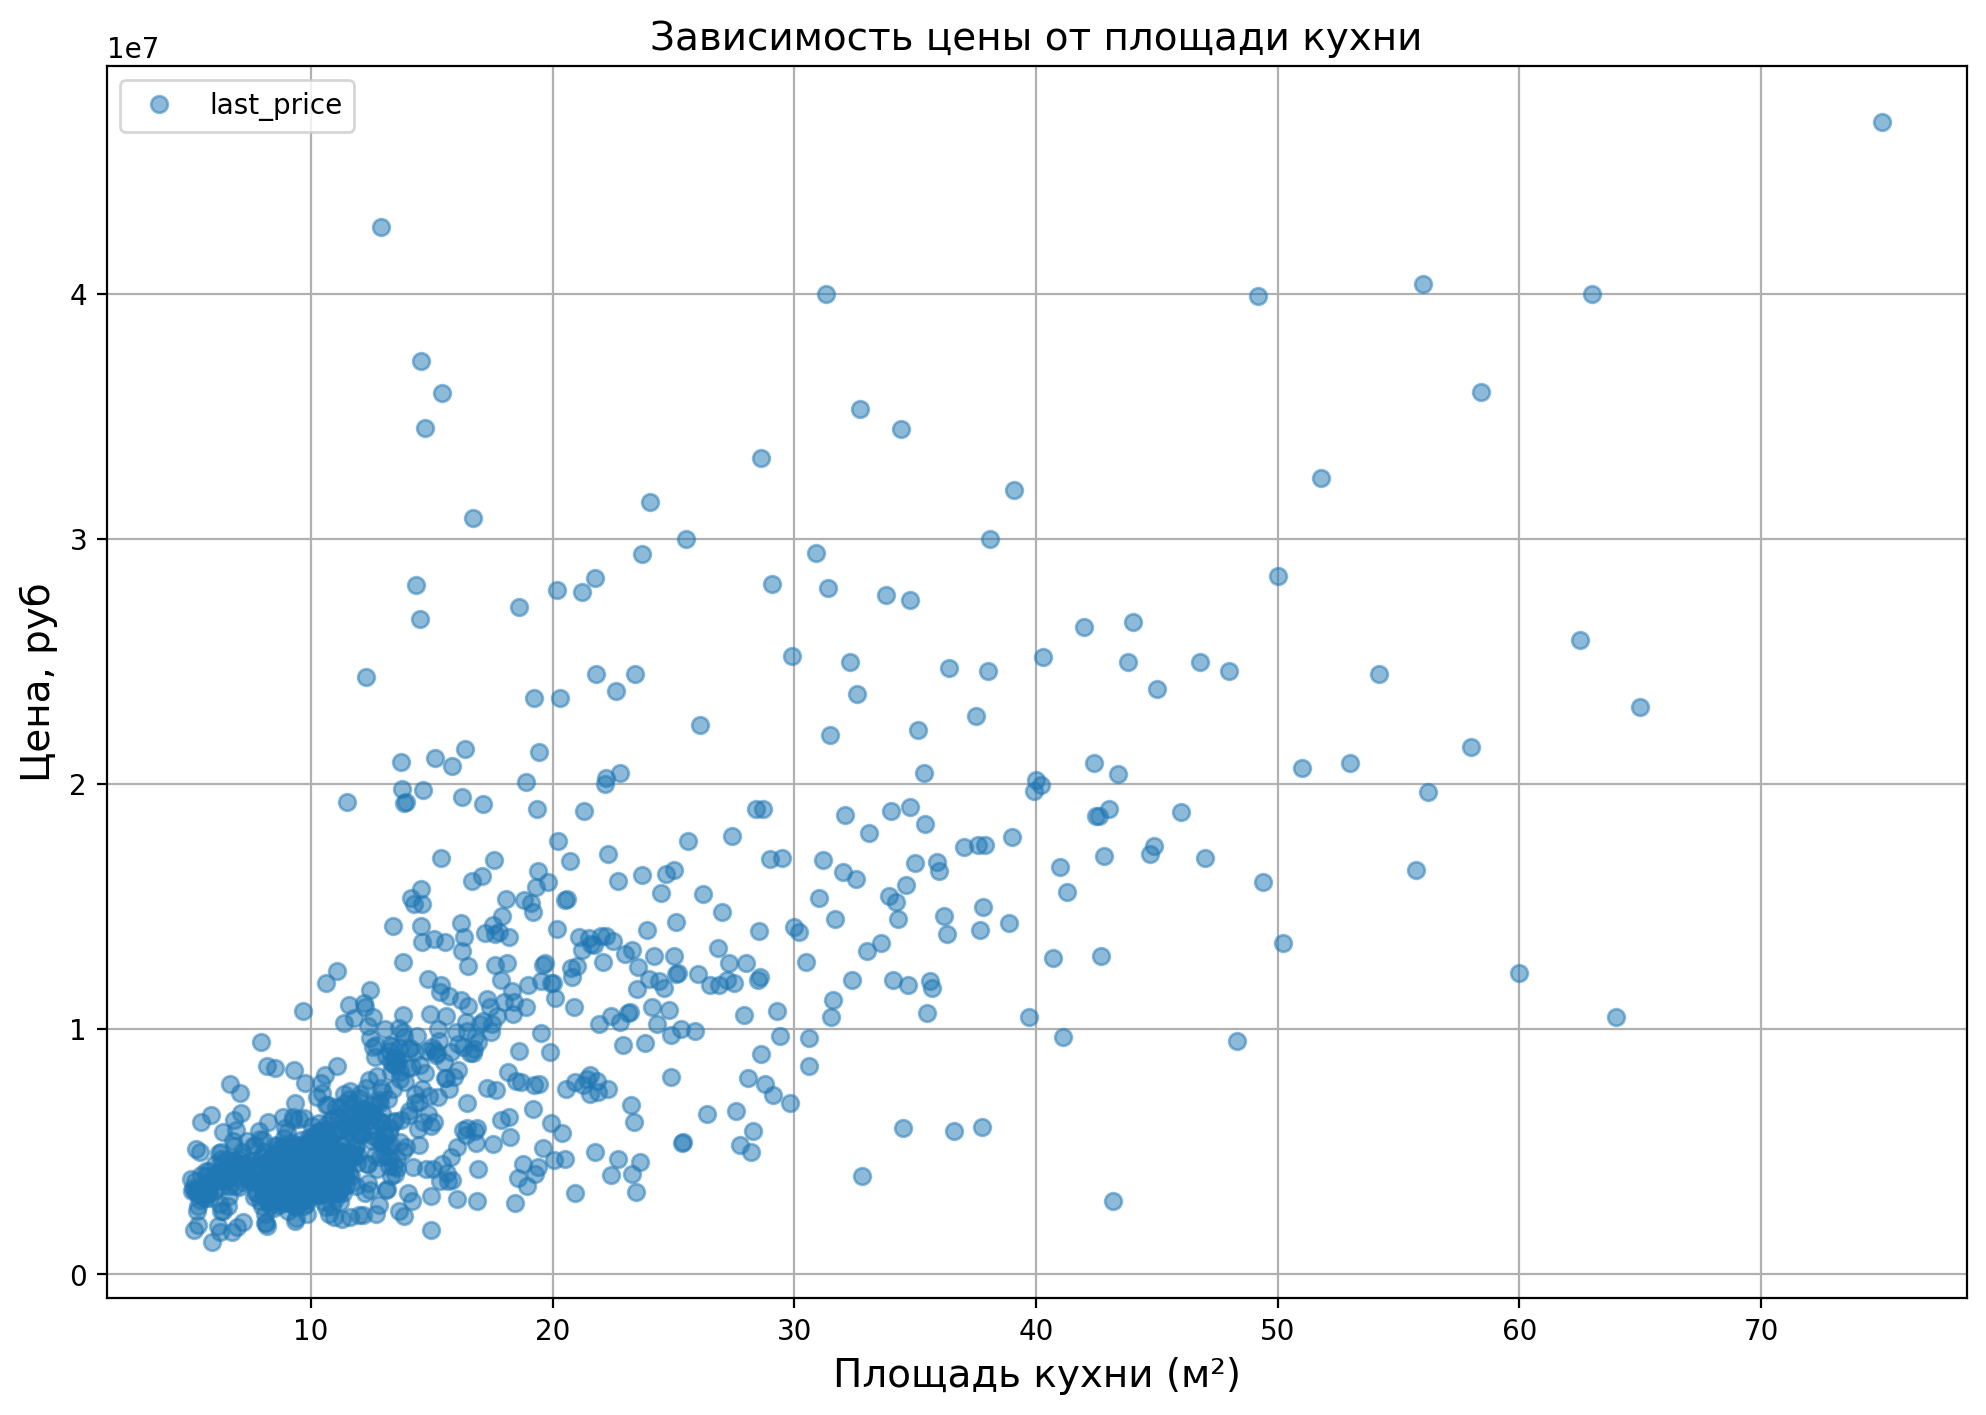

In [85]:
df.pivot_table(index="kitchen_area", values="last_price").plot(
    grid=True, style="o", figsize=(12, 8), alpha=0.5
)

plt.title("Зависимость цены от площади кухни", fontsize=14)
plt.xlabel("Площадь кухни (м²)", fontsize=14)
plt.ylabel("Цена, руб", fontsize=14)
plt.show()

Мы видим что четкая зависимость прослеживается для объектов с небольшими кухнями до 10 метров. Цена таких объектов находится в одном диапазоне.С увеличением площади кухни разброс цен на объект увеличивается.

##### Зависимость цены от  количества комнат

Предпологаем что цена будет линейно зависеть от количества комнат, так как возрастет и площадь, а эту зависимость мы уже отследили. Сделаем вывод по исследованям

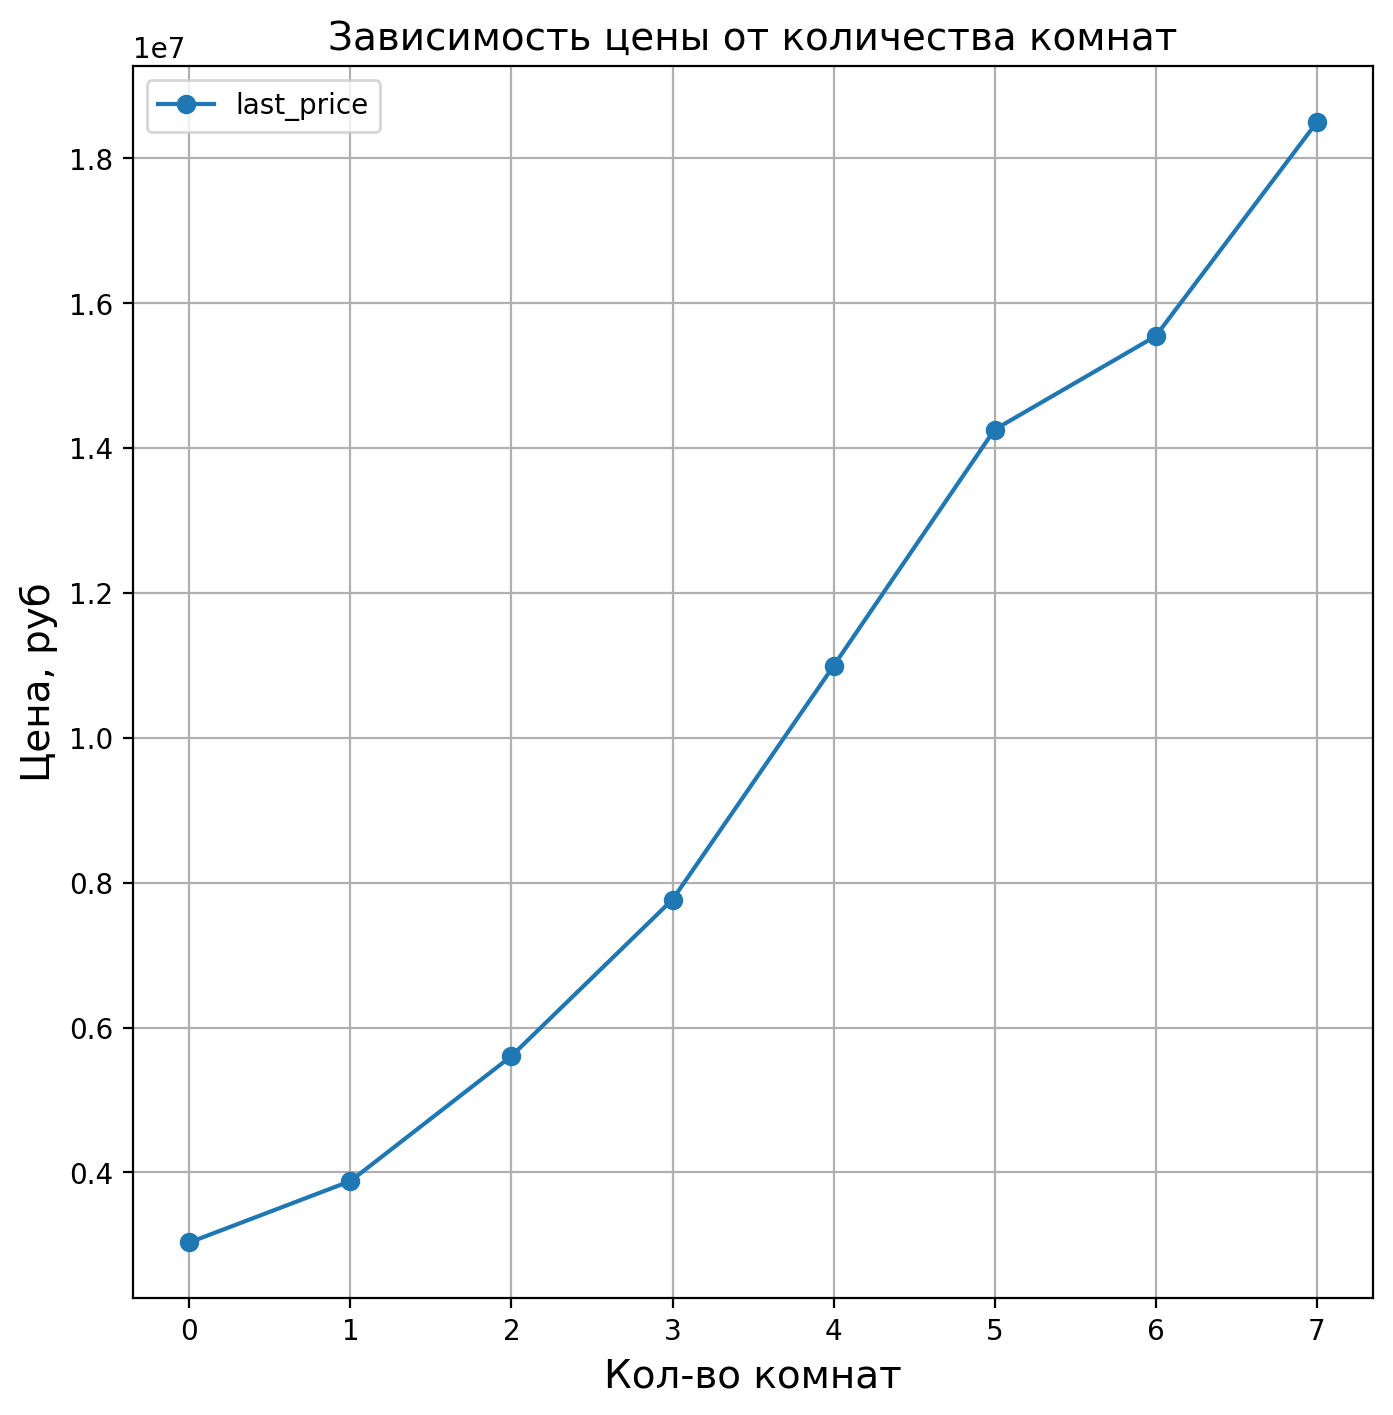

In [86]:
# Зависимость цены от числа комнат
df.pivot_table(index="rooms", values="last_price").plot(
    grid=True, style="o-", figsize=(8, 8)
)
plt.title("Зависимость цены от количества комнат", fontsize=14)
plt.xlabel("Кол-во комнат", fontsize=14)
plt.ylabel("Цена, руб", fontsize=14)
plt.show()

Рассмотрим корреляцию между исследоваными параметрами площади, количества комнат и ценой объекта

In [87]:
price_to_attributes.corr()

ValueError: could not convert string to float: 'другой'

**Промежуточный вывод:**  Мы видим наиболее сильную корреляцию между значениями общей и жилой площади объектов и их ценой. это подтверждается графиками. Таблица также показывает корреляцию между значениями площади кухни и количеством комнат **0.56** и **0.47** соответсвенно. Мы предположили что есть линейная засимость и это подтвердилось на графиках. Цена следует за площадью.

##### Зависимость цены от этажа, на котором расположена квартира

В больших городах квартиры на последних этажах продаются с премией к рынку, а на первых - с небольшим дисконтом. Проверим это предположение для нашей таблицы

In [ ]:
average_price_by_floor_type = df.pivot_table(
    index="floor_type", values="last_price", aggfunc="mean"
)
average_price_by_floor_type.reset_index().plot(
    kind="bar",
    x="floor_type",
    y="last_price",
    figsize=(10, 6),
    color="lightblue",
    title="Зависимость цены от типа этажа",
    edgecolor="black",
)
plt.grid(axis="y", alpha=0.65)
plt.xticks(rotation=0)
plt.ylabel("Цена (средняя, руб)", fontsize=14)
plt.title("Зависимость цены от типа этажа", fontsize=14)
plt.show()

Так как большинство наших квартир - данные из Санкт-Петербурга, наше предположение полностью подтвердлилось. Цены квартир на других этажах  вданном случае не показательны -их сильно больше. Нас интересует только первый и последний этаж. Посчитаем дисконт:

In [ ]:
average_price_by_floor_type

In [ ]:
average_price_by_floor_type = average_price_by_floor_type.reset_index()

floor_discount_ratio = (
    average_price_by_floor_type.loc[
        average_price_by_floor_type["floor_type"] == "первый", "last_price"
    ].values[0]
) / (
    average_price_by_floor_type.loc[
        average_price_by_floor_type["floor_type"] == "последний", "last_price"
    ].values[0]
)

display(
    f"В среднем квартира на первом этаже дешевле, чем на последнем в: {floor_discount_ratio:.2f} "
)

##### Зависимость цены от даты размещения (день недели, месяц, год).

In [ ]:
# сводная таблица для значений last price по дням недели, 0-понедельник
df.pivot_table(
    index=["day_of_public"], values="last_price", aggfunc=["mean", "median"]
).plot(
    grid=True,
    figsize=(12, 6),
)

plt.xlabel("День размещения объявления", fontsize=14)
plt.ylabel("Цена руб", fontsize=14)
plt.title("Зависимость цены от дня недели размещения объявления", fontsize=14)
plt.show()

Цена  имеет тенденцию незначительно снижаться к концу недели, с пятницы по воскресенье публикуются более дешевые квартиры.



In [ ]:
# сводная таблица для значений last price по дням недели, 0-понедельник
df.pivot_table(
    index=["month_of_public"], values="last_price", aggfunc=["mean", "median"]
).plot(
    grid=True,
    figsize=(12, 6),
)

plt.xlabel("Месяц размещения объявления", fontsize=14)
plt.ylabel("Цена, руб", fontsize=14)
plt.title("Зависимость цены от месяца размещения об]явления", fontsize=14)
plt.xticks(range(0, 13, 1))
plt.show()

Видим что медиана и среднее ведут себя по разному. В июне и октябре средняя цена опубликованных объявлений падает. Это график за все года публикаций, можно сказать что в эти месяцы на рынке происходит понижение спроса, отсюда наблюдается характерное снижение цен на новые объявления , и возможно люди понижают цену на уже существующие объявления ( например могут публиковать заново)


In [ ]:
# сводная таблица для значений last price по дням недели, 0-понедельник)", fontsize=14
df.pivot_table(
    index=["year_of_public"], values="last_price", aggfunc=["mean", "median"]
).plot(
    grid=True,
    figsize=(10, 6),
)

plt.xlabel("Год размещения объявления", fontsize=14)
plt.ylabel("Цена, руб", fontsize=14)
plt.title("Зависимость цены от года размещения объявления", fontsize=14)
plt.show()

In [ ]:
df[["day_of_public", "month_of_public", "year_of_public", "last_price"]].corr()

**Вывод:** между ценой объекта и датой размещения существуют интересные закономерности. Стоит обратить внимание на наличие сезонности: средняя цена по рынку снижается в июне - вероятно это связано со снижением спроса в это время года - хорошее время для покупки недвижимости, далее к ноябрю цены повышаются до макимальных значений - следует повременить с покупкой. с 2014 года средняя цена пукбликаций уменьшалась вплоть до рубежа 2017-2018 года, затем вновь начала повышаться. Можно было сделать предположение о снижении стоимости жилья, но скорее это следствие изменения рынка : в продаже появилось больше дешевых квартир с небольшой площадью. Так как на среднее значение на графике оказывают сильное влияние выбросы, можно предположить что происходило существенное понижение цены в сегменте дорогих квартир.

#### Подсчет средней цены  одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
# сгруппируем по населенным пунктам и выберем столбец  с ценой за метр. для него посчитаем среднее и кол-во значений
locality_stats = df.groupby("locality_name")["price_per_meter"].agg(["mean", "count"])
# отсортируем по количеству значений по убыванию
locality_stats.reset_index().sort_values(by="count", ascending=False).head(10)

Наибольшая средняя стоимость квадратного метра 112125 руб в Санкт-Петербурге. Из топ-10 наименьшая средняя цена квадратного метра - в Выборге (58 532.84 руб), который находится на расстоянии 140 км от Петербурга. Цена за метр дешевле почти в 2 раза

#### Вычисление средней цены каждого километра в Санкт-Петербурге

Для исследования возьмем столбец `locality_name` и оставим только записи о Санкт-Петербурге. Группировать и считать будем по столбцу `city_center_km`. В нем не должно быть пропусков для значений строк в новой таблице

In [ ]:
spb_estate = df.loc[df["locality_name"] == "санкт-петербург"]
spb_estate["city_center_km"].isna().sum()

In [ ]:
spb_estate = spb_estate.dropna(subset=["city_center_km"])

In [ ]:
spb_estate_price = (
    spb_estate.groupby("city_center_km")["last_price"].mean().reset_index()
)

In [ ]:
spb_estate_price

Мы видим как недвижимость непосредственно в центре в несколько раз дороже чем на расстоянии 20-30 км от него. Построим визуализацию.

In [ ]:
spb_estate_price.plot(
    x="city_center_km",
    y="last_price",
    kind="line",
    grid=True,
    figsize=(10, 6),
)

plt.title(
    "Зависимость средней цены от расстояния до центра Санкт-Петербурга", fontsize=12
)
plt.xlabel("Расстояние до центра (км)", fontsize=12)
plt.ylabel("Средняя цена (руб.", fontsize=12)
plt.xticks(range(0, 31, 2))
plt.show()

Видим линейную зависимость. С удалением от центра цена каждого километра жилья понижается и сильно. за 29 км падает более чем в 4 раза

### Общий вывод

Целью моего исследования было на основе предоставленных табличных данных произвести анализ  и получить ответы на перечень поставленных задач. 
Перед этим были осуществлены шаги по предобработке и исследованию данных, а именно:

1. **Обработка данных**:

   - Были обработаны пропущенные значения в данных, где это было необходимо - а именно тех что касаются площадей и высоты потолков
   - Выявлена проблема в некорректном поступлении картографических данных - они теряются.
   - Типы данных были заменены на те, которые обеспечивают удобную работу с ними.

2. **Выявление аномалий**:

   - Проведен анализ параметров жилья на наличие выбивающихся значений, таких как:
   - Площадь
   - Цена
   - Число комнат
   - Высота потолков
   
Выявлены аномалии и ошибки ввода - о них следует сообщить ответственным за сбор данных.

3. **Анализ стоимости**:

   - Рассчитана и добавлена в таблицу цена квадратного метра жилья.
   - Извлечены дни недели, месяцы и года размещения объявлений из дат.
   - Добавлены категории по этажам квартир, в результате их исследования выяснили что квартиры на первом этаже в среднем дешевле квартир на послденем в 0.81 раз

4. **Основные характеристики квартир**:

   - Площадь квартир в продаже преимущественно составляет от 30 до 50 м², что связано с ростом цен на жильё и предложением от застройщиков.
   - Жилая площадь большинства квартир соответствует параметрам 1- или 2-комнатной квартиры, в зависимости от планировки.

5. **Кухни и высота потолков**:

   - Площадь кухни в большинстве квартир стремится к среднему значению 10 м², которое совпадает с медианным.
   - Высота потолков в основном составляет 2,65 м, при этом среднее значение выше из-за наличия дорогих квартир с нестандартными планировками.

6. **Ценовые категории**:

   - Основной рынок составляют квартиры стоимостью от 3 до 6 млн рублей, с заметной долей предложений до 2 млн рублей и небольшой частью дорогой недвижимости в разных ценовых диапазонах.

7. **Количество комнат и типы жилья**:

   - Распределение по количеству комнат соответствует распределению по общей площади. 
 
8. **Структура жилья по этажам**:

    - Большинство квартир расположено в 5- и 9-этажных домах. На первом этаже меньшее количество квартир из-за наличия коммерческой недвижимости.


9. **Расположение относительно центра города и аэропортов**:

   - Расстояние до центра города варьируется от 6000 м до 22000 м, с медианным значением 13000 м.
   - Большинство объектов находятся на расстоянии 15-40 км от ближайшего аэропорта, с медианой около 30 км.

10. **Доступность парков**:

    - Среднее расстояние до парков составляет 500 м, однако встречаются объекты, удаленные более чем на 3 км.

11. **Временные аспекты публикаций**:

    - Объявления о продаже чаще публикуются в будние дни (вторник-пятница) и достигают пика в феврале, марте и ноябре. В праздничные месяцы (декабрь, январь, май) наблюдается снижение активности.
    - Количество объявлений о продаже снижается, если от публикации до снятия прошло более 3 месяцев, при этом нормальное время  пртодажи находится в диапазоне от 5 до 90 дней с момента публикации.
    - Не проданные в первые месяцы от публикации квартиры могут оставаться на рынке длительное время. Необходимо провести анализ среднего и медианного значений для столбца "days_exposition" для объектов, выставленных на продажу вплоть до 2 лет.



После исследования табличных данных и добавления метрик вычислил и изучил зависимости на рынке жилья в Петербурге и области:

1. Установлена линейная зависимость между ценой объектов недвижимости и их площадью (жилой и общей), с замедлением роста цен для жилой площади в диапазоне 90-100 кв. м.

3. Наблюдаются сезонные колебания цен: средняя цена снижается в июне и повышается к ноябрю, что может указывать на изменение спроса на рынке.

4. Наивысшая средняя стоимость квадратного метра зарегистрирована в Санкт-Петербурге (112,125 руб.), в то время как в более удаленных городах, таких как Выборг, цена составляет 58,532.84 руб. за квадратный метр, что почти в два раза ниже.

5. Изменение стоимости квартир: с 2014 года средняя цена пукбликаций уменьшалась вплоть до рубежа 2017-2018 года, затем вновь начала повышаться. Структура рынка изменилась и требует внимательного изучения. Каждый из этих годов следует рассмотреть в отдельности, чтобы делать вывод о движении цены в ту или иную сторону. 
